In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import encoder

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, roc_auc_score

import seaborn as sns; sns.set()

NomeBase = "Apogee"

Loaded  10 encoders.


In [2]:
from keras.layers import Input, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras import regularizers

import math
import keras
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from keras.models import Model

from pympler import muppy, summary

In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelos para treinamento

In [4]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [5]:
AouG = "Dwarfs"
NomeBase = "Apogee"

In [6]:
AnasCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [7]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                          
iDR4_3_HYDRA-0049_0003935  0.2854  0.7352  1.4842  1.7726  2.4143  2.5523   
iDR4_3_HYDRA-0049_0003916  0.3882  0.6905  1.4540  1.8137  2.7131  2.8054   
iDR4_3_HYDRA-0049_0004258  0.1823  0.4418  1.2621  1.4165  1.9139  2.0655   
iDR4_3_HYDRA-0049_0007713  0.2288  0.4418  1.2336  1.3618  1.8175  1.9990   
iDR4_3_HYDRA-0049_0008903  0.2604  0.5691  1.5292  1.8297  2.6663  2.7352   
...                           ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0203963      0.4538  0.5172  0.9286  0.9842  1.1367  1.2642   
iDR4_3_MC0017_0263305      0.4283  0.7234  1.5534  1.8035  2.8356  2.9089   
iDR4_3_MC0017_0263778      0.2347  0.4942  1.2425  1.4152  1.9621  2.0975   
iDR4_3_MC0017_0264138      0.2337  0.5420  1.1654  1.3200  1.8489  1.9831   
iDR4_3_MC0017_0264150      0.3489  0.4864  1.0233  1.1161  1.4744  1.6220   

                              u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                         ...              
iDR4_3_HYDRA-0049_0003935  3.1579  3.3802  3.3934  3.6082  ...  4716.2810   
iDR4_3_HYDRA-0049_0003916  3.9867  4.1887  4.5568  4.7589  ...  4014.9653   
iDR4_3_HYDRA-0049_0004258  2.5955  2.6521  2.8005  2.9115  ...  4764.7397   
iDR4_3_HYDRA-0049_0007713  2.4419  2.4822  2.6474  2.7053  ...  5057.2030   
iDR4_3_HYDRA-0049_0008903  3.7682  3.9535  4.2469  4.4284  ...  4196.9160   
...                           ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0203963      1.4073  1.3796  1.4520  1.4067  ...  5972.7114   
iDR4_3_MC0017_0263305      4.0816  4.3461  4.8460  5.0884  ...  4076.0190   
iDR4_3_MC0017_0263778      2.6698  2.7581  2.8856  2.9430  ...  4950.6167   
iDR4_3_MC0017_0264138      2.5176  2.5878  2.7390  2.7764  ...  4860.2000   
iDR4_3_MC0017_0264150      1.9625  1.9809  2.0912  2.0971  ...  5500.7817   

                               LOGG      FE_H   ALPHA_M        C_FE     CA_FE  \
ID                                                                              
iDR4_3_HYDRA-0049_0003935  5.078055 -0.982990 -0.255125 -999.000000  0.689696   
iDR4_3_HYDRA-0049_0003916  4.696823 -0.537400  0.006897   -0.003562 -0.029642   
iDR4_3_HYDRA-0049_0004258  4.522403 -0.355880  0.018650   -0.029828  0.028639   
iDR4_3_HYDRA-0049_0007713  4.524182 -0.054570  0.016021   -0.012690  0.054443   
iDR4_3_HYDRA-0049_0008903  4.598855 -0.218130 -0.079150    0.005286 -0.052468   
...                             ...       ...       ...         ...       ...   
iDR4_3_MC0017_0203963      4.099565 -0.211460 -0.012282    0.022280  0.204346   
iDR4_3_MC0017_0263305      4.751893  0.246280 -0.063022   -0.139595 -0.189309   
iDR4_3_MC0017_0263778      4.578544  0.024604 -0.003296   -0.067984  0.008222   
iDR4_3_MC0017_0264138      4.512252 -0.023074  0.028167    0.007533  0.048831   
iDR4_3_MC0017_0264150      4.084642  0.139680 -0.008439   -0.004583  0.043626   

                                 N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                   
iDR4_3_HYDRA-0049_0003935    0.482210  0.469040 -0.295521 -0.235247  
iDR4_3_HYDRA-0049_0003916 -999.000000 -0.030970  0.017738 -0.073097  
iDR4_3_HYDRA-0049_0004258   -0.185960  0.039090 -0.004667 -0.005049  
iDR4_3_HYDRA-0049_0007713   -0.218793 -0.025646  0.055766 -0.042090  
iDR4_3_HYDRA-0049_0008903 -999.000000  0.152509 -0.198241 -0.027598  
...                               ...       ...       ...       ...  
iDR4_3_MC0017_0203963        0.567390 -0.187460  0.059804 -0.018248  
iDR4_3_MC0017_0263305     -999.000000 -0.156578 -0.359108 -0.251984  
iDR4_3_MC0017_0263778       -0.176052 -0.018743  0.026603 -0.008903  
iDR4_3_MC0017_0264138        0.125365  0.050654  0.060078  0.115396  
iDR4_3_MC0017_0264150        0.067933 -0.015650 -0.004144  0.089251  

[10067 rows x 76 columns]

In [8]:
print('TEFF =', AnasCores['TEFF'].min())
print('LOGG = ', AnasCores['LOGG'].min())
print('Feh = ', AnasCores['FE_H'].min())
print('Alpha = ', AnasCores['ALPHA_M'].min())

print('cfe =', AnasCores['C_FE'].min())
print('cafe = ', AnasCores['CA_FE'].min())
print('nfe = ', AnasCores['N_FE'].min())
print('mgfe = ', AnasCores['MG_FE'].min())
print('sife = ', AnasCores['SI_FE'].min())
print('nife = ', AnasCores['NI_FE'].min())

TEFF = 4000.0242
LOGG =  0.5269148
Feh =  -999.0
Alpha =  -999.0
cfe = -999.0
cafe =  -999.0
nfe =  -999.0
mgfe =  -999.0
sife =  -999.0
nife =  -999.0


In [9]:
AnasCores = AnasCores.loc[AnasCores['FE_H'] != -999]

In [10]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                          
iDR4_3_HYDRA-0049_0003935  0.2854  0.7352  1.4842  1.7726  2.4143  2.5523   
iDR4_3_HYDRA-0049_0003916  0.3882  0.6905  1.4540  1.8137  2.7131  2.8054   
iDR4_3_HYDRA-0049_0004258  0.1823  0.4418  1.2621  1.4165  1.9139  2.0655   
iDR4_3_HYDRA-0049_0007713  0.2288  0.4418  1.2336  1.3618  1.8175  1.9990   
iDR4_3_HYDRA-0049_0008903  0.2604  0.5691  1.5292  1.8297  2.6663  2.7352   
...                           ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0203963      0.4538  0.5172  0.9286  0.9842  1.1367  1.2642   
iDR4_3_MC0017_0263305      0.4283  0.7234  1.5534  1.8035  2.8356  2.9089   
iDR4_3_MC0017_0263778      0.2347  0.4942  1.2425  1.4152  1.9621  2.0975   
iDR4_3_MC0017_0264138      0.2337  0.5420  1.1654  1.3200  1.8489  1.9831   
iDR4_3_MC0017_0264150      0.3489  0.4864  1.0233  1.1161  1.4744  1.6220   

                              u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                         ...              
iDR4_3_HYDRA-0049_0003935  3.1579  3.3802  3.3934  3.6082  ...  4716.2810   
iDR4_3_HYDRA-0049_0003916  3.9867  4.1887  4.5568  4.7589  ...  4014.9653   
iDR4_3_HYDRA-0049_0004258  2.5955  2.6521  2.8005  2.9115  ...  4764.7397   
iDR4_3_HYDRA-0049_0007713  2.4419  2.4822  2.6474  2.7053  ...  5057.2030   
iDR4_3_HYDRA-0049_0008903  3.7682  3.9535  4.2469  4.4284  ...  4196.9160   
...                           ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0203963      1.4073  1.3796  1.4520  1.4067  ...  5972.7114   
iDR4_3_MC0017_0263305      4.0816  4.3461  4.8460  5.0884  ...  4076.0190   
iDR4_3_MC0017_0263778      2.6698  2.7581  2.8856  2.9430  ...  4950.6167   
iDR4_3_MC0017_0264138      2.5176  2.5878  2.7390  2.7764  ...  4860.2000   
iDR4_3_MC0017_0264150      1.9625  1.9809  2.0912  2.0971  ...  5500.7817   

                               LOGG      FE_H   ALPHA_M        C_FE     CA_FE  \
ID                                                                              
iDR4_3_HYDRA-0049_0003935  5.078055 -0.982990 -0.255125 -999.000000  0.689696   
iDR4_3_HYDRA-0049_0003916  4.696823 -0.537400  0.006897   -0.003562 -0.029642   
iDR4_3_HYDRA-0049_0004258  4.522403 -0.355880  0.018650   -0.029828  0.028639   
iDR4_3_HYDRA-0049_0007713  4.524182 -0.054570  0.016021   -0.012690  0.054443   
iDR4_3_HYDRA-0049_0008903  4.598855 -0.218130 -0.079150    0.005286 -0.052468   
...                             ...       ...       ...         ...       ...   
iDR4_3_MC0017_0203963      4.099565 -0.211460 -0.012282    0.022280  0.204346   
iDR4_3_MC0017_0263305      4.751893  0.246280 -0.063022   -0.139595 -0.189309   
iDR4_3_MC0017_0263778      4.578544  0.024604 -0.003296   -0.067984  0.008222   
iDR4_3_MC0017_0264138      4.512252 -0.023074  0.028167    0.007533  0.048831   
iDR4_3_MC0017_0264150      4.084642  0.139680 -0.008439   -0.004583  0.043626   

                                 N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                   
iDR4_3_HYDRA-0049_0003935    0.482210  0.469040 -0.295521 -0.235247  
iDR4_3_HYDRA-0049_0003916 -999.000000 -0.030970  0.017738 -0.073097  
iDR4_3_HYDRA-0049_0004258   -0.185960  0.039090 -0.004667 -0.005049  
iDR4_3_HYDRA-0049_0007713   -0.218793 -0.025646  0.055766 -0.042090  
iDR4_3_HYDRA-0049_0008903 -999.000000  0.152509 -0.198241 -0.027598  
...                               ...       ...       ...       ...  
iDR4_3_MC0017_0203963        0.567390 -0.187460  0.059804 -0.018248  
iDR4_3_MC0017_0263305     -999.000000 -0.156578 -0.359108 -0.251984  
iDR4_3_MC0017_0263778       -0.176052 -0.018743  0.026603 -0.008903  
iDR4_3_MC0017_0264138        0.125365  0.050654  0.060078  0.115396  
iDR4_3_MC0017_0264150        0.067933 -0.015650 -0.004144  0.089251  

[10061 rows x 76 columns]

In [11]:
xtrain = AnasCores.iloc[:, :66]

In [12]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [13]:
ytrain = AnasCores[columnYtrain]

In [14]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['TEFF']), 'teffApogee')

In [15]:
#encoder.save_encoders()

In [16]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

##### Separando base para Treinamento da temperatura, logg e feh

In [17]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [18]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [19]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_STRIPE82-0022_0022438  4692.7817  4.505200 -0.549660  0.040490   
iDR4_3_SPLUS-n09s40_0009016   4994.9033  4.560923 -0.110630  0.043474   
iDR4_3_SPLUS-s45s29_0024264   5646.2060  3.970317  0.071952 -0.003920   
iDR4_3_MC0024_0521428         4011.5928  4.650590 -0.194470 -0.015237   
iDR4_3_STRIPE82-0019_0006104  5026.3400  4.564298  0.012153  0.019011   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s27_0039859   4149.6265  4.612883  0.039361 -0.049706   
iDR4_3_SPLUS-n05s43_0028814   5803.1300  4.404859 -0.377650  0.171415   
iDR4_3_SPLUS-n01s19_0027269   5030.8360  4.548754 -0.442040  0.190405   
iDR4_3_MC0036_0119805         5959.3906  4.008648  0.100510  0.100112   
iDR4_3_SPLUS-n02n21_0003417   5759.2820  4.327886 -0.172530  0.002055   

                                  C_FE     CA_FE        N_FE     NI_FE  \
ID                                                                       
iDR4_3_STRIPE82-0022_0022438 -0.299820 -0.074817   -0.061538  0.350740   
iDR4_3_SPLUS-n09s40_0009016   0.019893 -0.004660   -0.057230 -0.024790   
iDR4_3_SPLUS-s45s29_0024264   0.007085 -0.088132    0.109313  0.014332   
iDR4_3_MC0024_0521428        -0.046411 -0.026336 -999.000000 -0.044160   
iDR4_3_STRIPE82-0019_0006104 -0.017938  0.000441    0.005346 -0.002644   
...                                ...       ...         ...       ...   
iDR4_3_SPLUS-n01s27_0039859  -0.003478 -0.057084 -999.000000  0.002332   
iDR4_3_SPLUS-n05s43_0028814   0.088161  0.160566   -0.495470  0.124720   
iDR4_3_SPLUS-n01s19_0027269   0.103566  0.135256   -0.384240  0.081370   
iDR4_3_MC0036_0119805        -0.067075 -0.036295    0.341800  0.023840   
iDR4_3_SPLUS-n02n21_0003417  -0.027787 -0.000587    0.097260  0.004170   

                                 MG_FE     SI_FE  teffEncoded  
ID                                                             
iDR4_3_STRIPE82-0022_0022438  0.019531  0.021428    -0.444768  
iDR4_3_SPLUS-n09s40_0009016   0.073645 -0.041337    -0.202623  
iDR4_3_SPLUS-s45s29_0024264   0.015521  0.103094     0.319384  
iDR4_3_MC0024_0521428        -0.056501 -0.011954    -0.990728  
iDR4_3_STRIPE82-0019_0006104  0.037912  0.042743    -0.177427  
...                                ...       ...          ...  
iDR4_3_SPLUS-n01s27_0039859  -0.068243 -0.086909    -0.880097  
iDR4_3_SPLUS-n05s43_0028814   0.274869  0.216673     0.445156  
iDR4_3_SPLUS-n01s19_0027269   0.320699  0.213403    -0.173823  
iDR4_3_MC0036_0119805        -0.000672  0.669523     0.570396  
iDR4_3_SPLUS-n02n21_0003417  -0.132732  0.074408     0.410012  

[7243 rows x 11 columns]

### Teff

In [20]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [21]:
modelTEFF = training_model()

In [22]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 3s - loss: 0.4067 - val_loss: 0.3192 - 3s/epoch - 991ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.2985 - val_loss: 0.2550 - 59ms/epoch - 20ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.2588 - val_loss: 0.2208 - 51ms/epoch - 17ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.2177 - val_loss: 0.2146 - 53ms/epoch - 18ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.2134 - val_loss: 0.1968 - 53ms/epoch - 18ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.2016 - val_loss: 0.2028 - 69ms/epoch - 23ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1987 - val_loss: 0.1964 - 60ms/epoch - 20ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1994 - val_loss: 0.1920 - 69ms/epoch - 23ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.1934 - val_loss: 0.1956 - 71ms/epoch - 24ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.1932 - val_loss: 0.1891 - 65ms/epoch - 22ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.1906 - val_loss: 0.1884 - 52ms/epoch - 17ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.1883 - val_loss: 0.1895 - 58ms/epoch - 19ms/step
Epoch 13/2000
3/3 - 0s - l

Text(0, 0.5, 'Loss')

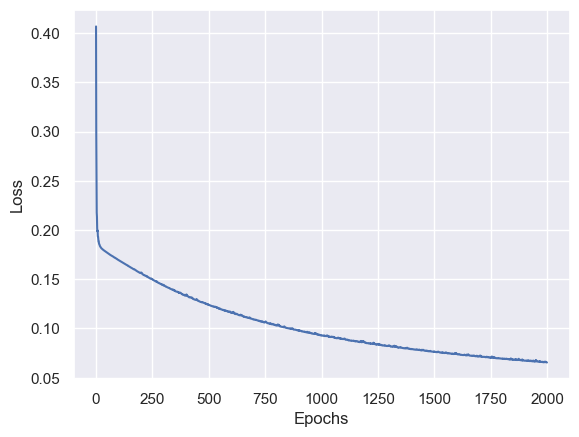

In [23]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

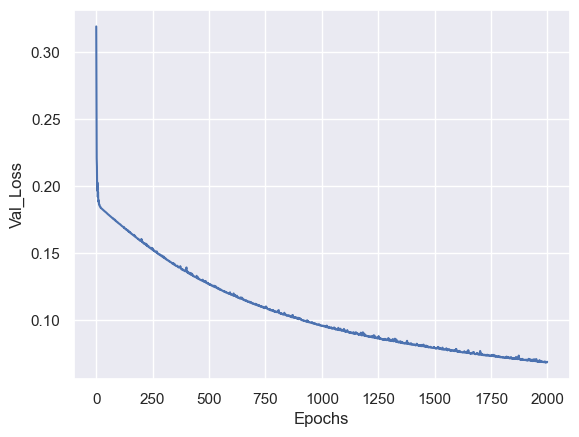

In [24]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [25]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\TEFF-Dwarfs.h5


In [26]:
predTeff = modelTEFF.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [27]:
predaux = encoder.decode_DataFrame(predTeff, 'teffApogee')
Y_test['TEFF_PredictDecoded'] = predaux

In [28]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n13s41_0023995   5793.9644  3.852551 -0.909930  0.108635   
iDR4_3_SPLUS-n10s40_0006029   5718.2646  4.352073  0.092854 -0.004926   
iDR4_3_STRIPE82-0160_0034169  5738.9414  4.158161 -0.300000  0.149035   
iDR4_3_SPLUS-n11s40_0030707   5486.7270  3.943334 -0.058575 -0.009395   
iDR4_3_SPLUS-n07s42_0003033   5891.5957  4.216322 -0.145900  0.004970   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s20_0014028   4364.4460  4.614923 -0.199290  0.108525   
iDR4_3_STRIPE82-0104_0057949  4503.2310  4.607270  0.040675 -0.028040   
iDR4_3_SPLUS-n02s25_0025260   5069.1016  3.716198 -0.169840  0.084229   
iDR4_3_STRIPE82-0081_0013306  5609.0450  4.394825  0.130580 -0.003109   
iDR4_3_SPLUS-n01s24_0045416   5624.1980  4.375693 -0.098223  0.113815   

                                  C_FE     CA_FE        N_FE     NI_FE  \
ID                                                                       
iDR4_3_SPLUS-n13s41_0023995   0.390010  0.156906   -0.373810 -0.014350   
iDR4_3_SPLUS-n10s40_0006029  -0.036259 -0.016661    0.008789  0.021396   
iDR4_3_STRIPE82-0160_0034169  0.062815  0.114986   -0.048379  0.076590   
iDR4_3_SPLUS-n11s40_0030707  -0.020367 -0.088625   -0.143578 -0.062425   
iDR4_3_SPLUS-n07s42_0003033  -0.009880 -0.034839   -0.086686  0.022310   
...                                ...       ...         ...       ...   
iDR4_3_SPLUS-n01s20_0014028  -0.006723  0.037666 -999.000000  0.004050   
iDR4_3_STRIPE82-0104_0057949 -0.015988  0.005436 -999.000000 -0.013571   
iDR4_3_SPLUS-n02s25_0025260  -0.074839  0.071748   -0.044073  0.037282   
iDR4_3_STRIPE82-0081_0013306 -0.063929  0.003179    0.344300  0.069700   
iDR4_3_SPLUS-n01s24_0045416   0.118653  0.088119    0.139923  0.071786   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n13s41_0023995   0.308598  0.223550     0.437810   
iDR4_3_SPLUS-n10s40_0006029  -0.002302  0.079907     0.377138   
iDR4_3_STRIPE82-0160_0034169  0.218179  0.189753     0.393710   
iDR4_3_SPLUS-n11s40_0030707   0.008666  0.093852     0.191565   
iDR4_3_SPLUS-n07s42_0003033   0.004064  0.094954     0.516059   
...                                ...       ...          ...   
iDR4_3_SPLUS-n01s20_0014028   0.285759  0.044240    -0.707923   
iDR4_3_STRIPE82-0104_0057949 -0.120329 -0.093504    -0.596689   
iDR4_3_SPLUS-n02s25_0025260   0.104254  0.070729    -0.143154   
iDR4_3_STRIPE82-0081_0013306 -0.007311  0.058975     0.289600   
iDR4_3_SPLUS-n01s24_0045416   0.188742  0.145923     0.301745   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n13s41_0023995           5900.900391  
iDR4_3_SPLUS-n10s40_0006029           5713.551758  
iDR4_3_STRIPE82-0160_0034169          5650.210938  
iDR4_3_SPLUS-n11s40_0030707           5605.347656  
iDR4_3_SPLUS-n07s42_0003033           5945.659180  
...                                           ...  
iDR4_3_SPLUS-n01s20_0014028           4481.802246  
iDR4_3_STRIPE82-0104_0057949          4567.574707  
iDR4_3_SPLUS-n02s25_0025260           5081.518066  
iDR4_3_STRIPE82-0081_0013306          5583.601562  
iDR4_3_SPLUS-n01s24_0045416           5632.392578  

[2013 rows x 12 columns]

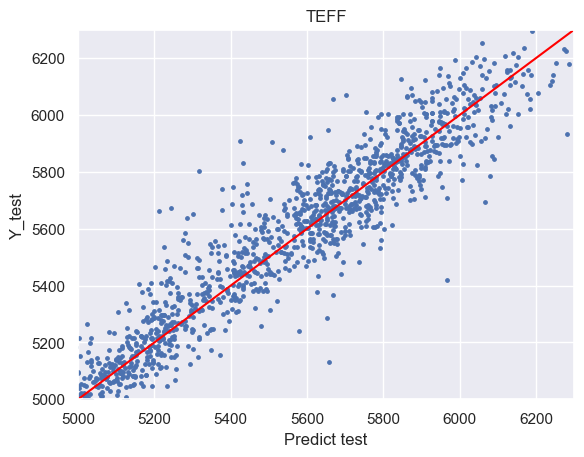

In [29]:
plt.scatter(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
plt.xlim(5000, 6300)
plt.ylim(5000, 6300)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([5000, 7000], [5000, 7000], c='red')

In [30]:
score = r2_score(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 95.0%


In [31]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n13s41_0023995   5793.9644  3.852551 -0.909930  0.108635   
iDR4_3_SPLUS-n10s40_0006029   5718.2646  4.352073  0.092854 -0.004926   
iDR4_3_STRIPE82-0160_0034169  5738.9414  4.158161 -0.300000  0.149035   
iDR4_3_SPLUS-n11s40_0030707   5486.7270  3.943334 -0.058575 -0.009395   
iDR4_3_SPLUS-n07s42_0003033   5891.5957  4.216322 -0.145900  0.004970   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s20_0014028   4364.4460  4.614923 -0.199290  0.108525   
iDR4_3_STRIPE82-0104_0057949  4503.2310  4.607270  0.040675 -0.028040   
iDR4_3_SPLUS-n02s25_0025260   5069.1016  3.716198 -0.169840  0.084229   
iDR4_3_STRIPE82-0081_0013306  5609.0450  4.394825  0.130580 -0.003109   
iDR4_3_SPLUS-n01s24_0045416   5624.1980  4.375693 -0.098223  0.113815   

                                  C_FE     CA_FE        N_FE     NI_FE  \
ID                                                                       
iDR4_3_SPLUS-n13s41_0023995   0.390010  0.156906   -0.373810 -0.014350   
iDR4_3_SPLUS-n10s40_0006029  -0.036259 -0.016661    0.008789  0.021396   
iDR4_3_STRIPE82-0160_0034169  0.062815  0.114986   -0.048379  0.076590   
iDR4_3_SPLUS-n11s40_0030707  -0.020367 -0.088625   -0.143578 -0.062425   
iDR4_3_SPLUS-n07s42_0003033  -0.009880 -0.034839   -0.086686  0.022310   
...                                ...       ...         ...       ...   
iDR4_3_SPLUS-n01s20_0014028  -0.006723  0.037666 -999.000000  0.004050   
iDR4_3_STRIPE82-0104_0057949 -0.015988  0.005436 -999.000000 -0.013571   
iDR4_3_SPLUS-n02s25_0025260  -0.074839  0.071748   -0.044073  0.037282   
iDR4_3_STRIPE82-0081_0013306 -0.063929  0.003179    0.344300  0.069700   
iDR4_3_SPLUS-n01s24_0045416   0.118653  0.088119    0.139923  0.071786   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n13s41_0023995   0.308598  0.223550     0.437810   
iDR4_3_SPLUS-n10s40_0006029  -0.002302  0.079907     0.377138   
iDR4_3_STRIPE82-0160_0034169  0.218179  0.189753     0.393710   
iDR4_3_SPLUS-n11s40_0030707   0.008666  0.093852     0.191565   
iDR4_3_SPLUS-n07s42_0003033   0.004064  0.094954     0.516059   
...                                ...       ...          ...   
iDR4_3_SPLUS-n01s20_0014028   0.285759  0.044240    -0.707923   
iDR4_3_STRIPE82-0104_0057949 -0.120329 -0.093504    -0.596689   
iDR4_3_SPLUS-n02s25_0025260   0.104254  0.070729    -0.143154   
iDR4_3_STRIPE82-0081_0013306 -0.007311  0.058975     0.289600   
iDR4_3_SPLUS-n01s24_0045416   0.188742  0.145923     0.301745   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n13s41_0023995           5900.900391  
iDR4_3_SPLUS-n10s40_0006029           5713.551758  
iDR4_3_STRIPE82-0160_0034169          5650.210938  
iDR4_3_SPLUS-n11s40_0030707           5605.347656  
iDR4_3_SPLUS-n07s42_0003033           5945.659180  
...                                           ...  
iDR4_3_SPLUS-n01s20_0014028           4481.802246  
iDR4_3_STRIPE82-0104_0057949          4567.574707  
iDR4_3_SPLUS-n02s25_0025260           5081.518066  
iDR4_3_STRIPE82-0081_0013306          5583.601562  
iDR4_3_SPLUS-n01s24_0045416           5632.392578  

[2013 rows x 12 columns]

In [32]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [33]:
Parametro = "LOGG"
columnTrain = 'LOGG'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [34]:
modelLOGG = training_model()

In [35]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 18.5719 - val_loss: 13.3724 - 628ms/epoch - 209ms/step
Epoch 2/2000
3/3 - 0s - loss: 12.0780 - val_loss: 8.2895 - 112ms/epoch - 37ms/step
Epoch 3/2000
3/3 - 0s - loss: 7.3802 - val_loss: 4.5233 - 94ms/epoch - 31ms/step
Epoch 4/2000
3/3 - 0s - loss: 3.8659 - val_loss: 1.9531 - 76ms/epoch - 25ms/step
Epoch 5/2000
3/3 - 0s - loss: 1.6103 - val_loss: 0.6658 - 72ms/epoch - 24ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.6135 - val_loss: 0.5060 - 72ms/epoch - 24ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.6435 - val_loss: 0.9172 - 65ms/epoch - 22ms/step
Epoch 8/2000
3/3 - 0s - loss: 1.0254 - val_loss: 1.1149 - 65ms/epoch - 22ms/step
Epoch 9/2000
3/3 - 0s - loss: 1.1112 - val_loss: 0.9123 - 63ms/epoch - 21ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.8562 - val_loss: 0.6023 - 62ms/epoch - 21ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.5770 - val_loss: 0.4355 - 60ms/epoch - 20ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.4560 - val_loss: 0.4209 - 65ms/epoch - 22ms/step
Epoch 13/2000
3/3 - 0s - loss: 0

Text(0, 0.5, 'Loss')

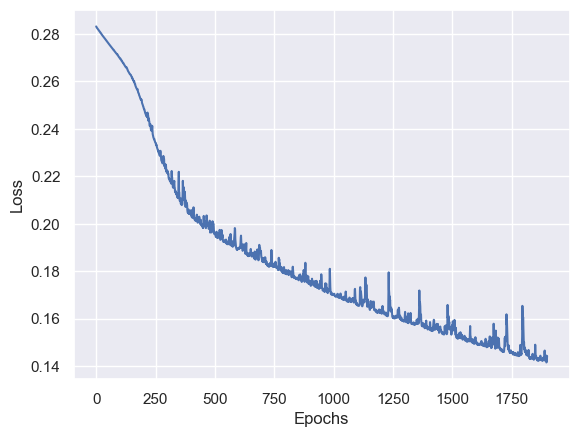

In [36]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

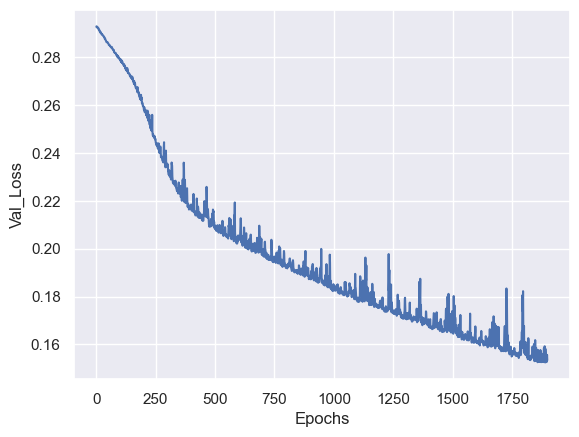

In [37]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [38]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\LOGG-Dwarfs.h5


In [39]:
predlogg = modelLOGG.predict(X_test)

 1/63 [..............................] - ETA: 4s

63/63 [==============================] - 0s 2ms/step


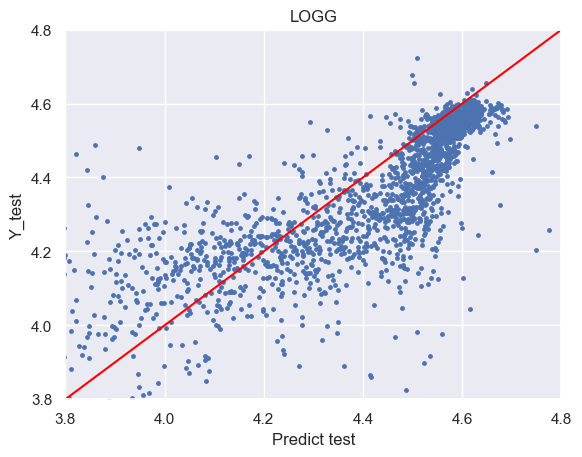

In [40]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
plt.xlim(3.8, 4.8)
plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [41]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 78.0%


In [42]:
Y_test['LOGG_Predict'] = predlogg

In [43]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n13s41_0023995   5793.9644  3.852551 -0.909930  0.108635   
iDR4_3_SPLUS-n10s40_0006029   5718.2646  4.352073  0.092854 -0.004926   
iDR4_3_STRIPE82-0160_0034169  5738.9414  4.158161 -0.300000  0.149035   
iDR4_3_SPLUS-n11s40_0030707   5486.7270  3.943334 -0.058575 -0.009395   
iDR4_3_SPLUS-n07s42_0003033   5891.5957  4.216322 -0.145900  0.004970   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s20_0014028   4364.4460  4.614923 -0.199290  0.108525   
iDR4_3_STRIPE82-0104_0057949  4503.2310  4.607270  0.040675 -0.028040   
iDR4_3_SPLUS-n02s25_0025260   5069.1016  3.716198 -0.169840  0.084229   
iDR4_3_STRIPE82-0081_0013306  5609.0450  4.394825  0.130580 -0.003109   
iDR4_3_SPLUS-n01s24_0045416   5624.1980  4.375693 -0.098223  0.113815   

                                  C_FE     CA_FE        N_FE     NI_FE  \
ID                                                                       
iDR4_3_SPLUS-n13s41_0023995   0.390010  0.156906   -0.373810 -0.014350   
iDR4_3_SPLUS-n10s40_0006029  -0.036259 -0.016661    0.008789  0.021396   
iDR4_3_STRIPE82-0160_0034169  0.062815  0.114986   -0.048379  0.076590   
iDR4_3_SPLUS-n11s40_0030707  -0.020367 -0.088625   -0.143578 -0.062425   
iDR4_3_SPLUS-n07s42_0003033  -0.009880 -0.034839   -0.086686  0.022310   
...                                ...       ...         ...       ...   
iDR4_3_SPLUS-n01s20_0014028  -0.006723  0.037666 -999.000000  0.004050   
iDR4_3_STRIPE82-0104_0057949 -0.015988  0.005436 -999.000000 -0.013571   
iDR4_3_SPLUS-n02s25_0025260  -0.074839  0.071748   -0.044073  0.037282   
iDR4_3_STRIPE82-0081_0013306 -0.063929  0.003179    0.344300  0.069700   
iDR4_3_SPLUS-n01s24_0045416   0.118653  0.088119    0.139923  0.071786   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n13s41_0023995   0.308598  0.223550     0.437810   
iDR4_3_SPLUS-n10s40_0006029  -0.002302  0.079907     0.377138   
iDR4_3_STRIPE82-0160_0034169  0.218179  0.189753     0.393710   
iDR4_3_SPLUS-n11s40_0030707   0.008666  0.093852     0.191565   
iDR4_3_SPLUS-n07s42_0003033   0.004064  0.094954     0.516059   
...                                ...       ...          ...   
iDR4_3_SPLUS-n01s20_0014028   0.285759  0.044240    -0.707923   
iDR4_3_STRIPE82-0104_0057949 -0.120329 -0.093504    -0.596689   
iDR4_3_SPLUS-n02s25_0025260   0.104254  0.070729    -0.143154   
iDR4_3_STRIPE82-0081_0013306 -0.007311  0.058975     0.289600   
iDR4_3_SPLUS-n01s24_0045416   0.188742  0.145923     0.301745   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n13s41_0023995           5900.900391      4.102471  
iDR4_3_SPLUS-n10s40_0006029           5713.551758      4.367929  
iDR4_3_STRIPE82-0160_0034169          5650.210938      4.196746  
iDR4_3_SPLUS-n11s40_0030707           5605.347656      4.068099  
iDR4_3_SPLUS-n07s42_0003033           5945.659180      4.287555  
...                                           ...           ...  
iDR4_3_SPLUS-n01s20_0014028           4481.802246      4.554936  
iDR4_3_STRIPE82-0104_0057949          4567.574707      4.535807  
iDR4_3_SPLUS-n02s25_0025260           5081.518066      3.650606  
iDR4_3_STRIPE82-0081_0013306          5583.601562      4.386200  
iDR4_3_SPLUS-n01s24_0045416           5632.392578      4.227044  

[2013 rows x 13 columns]

In [44]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [85]:
Parametro = "FEH"
columnTrain = 'FE_H'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [86]:
modelFEH = training_model()

In [87]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 0.2609 - val_loss: 0.2273 - 625ms/epoch - 208ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.2447 - val_loss: 0.2273 - 98ms/epoch - 33ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.2361 - val_loss: 0.2301 - 103ms/epoch - 34ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.2388 - val_loss: 0.2240 - 99ms/epoch - 33ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.2353 - val_loss: 0.2255 - 74ms/epoch - 25ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.2323 - val_loss: 0.2225 - 70ms/epoch - 23ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.2333 - val_loss: 0.2201 - 68ms/epoch - 23ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.2305 - val_loss: 0.2234 - 63ms/epoch - 21ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.2304 - val_loss: 0.2195 - 62ms/epoch - 21ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.2301 - val_loss: 0.2186 - 60ms/epoch - 20ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.2285 - val_loss: 0.2202 - 59ms/epoch - 20ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.2280 - val_loss: 0.2178 - 62ms/epoch - 21ms/step
Epoch 13/2000
3/3 - 0s - loss: 0.22

Text(0, 0.5, 'Loss')

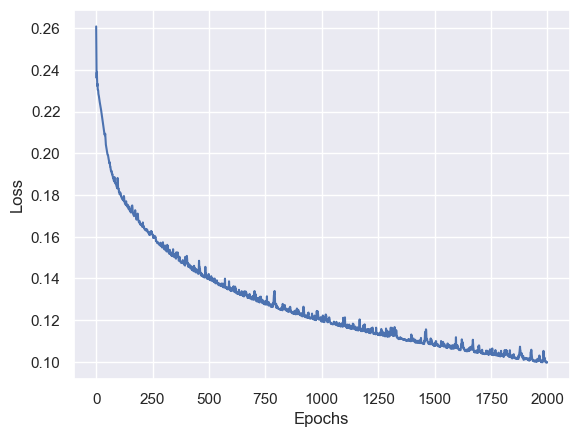

In [88]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

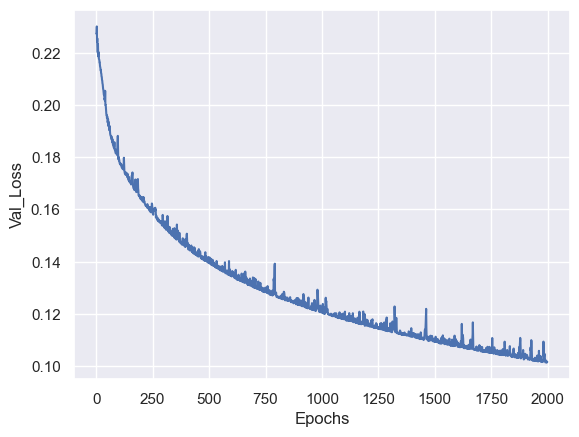

In [89]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [90]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\FEH-Dwarfs.h5


In [91]:
predfeh = modelFEH.predict(X_test)

 1/63 [..............................] - ETA: 4s

63/63 [==============================] - 0s 2ms/step


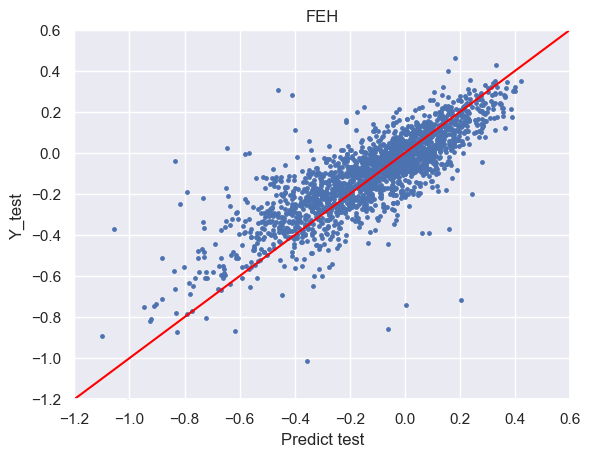

In [92]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.6)
plt.ylim(-1.2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [93]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%


In [94]:
Y_test['FEH_Predict'] = predfeh

In [95]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n13s41_0023995   5793.9644  3.852551 -0.909930  0.108635   
iDR4_3_SPLUS-n10s40_0006029   5718.2646  4.352073  0.092854 -0.004926   
iDR4_3_STRIPE82-0160_0034169  5738.9414  4.158161 -0.300000  0.149035   
iDR4_3_SPLUS-n11s40_0030707   5486.7270  3.943334 -0.058575 -0.009395   
iDR4_3_SPLUS-n07s42_0003033   5891.5957  4.216322 -0.145900  0.004970   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n01s20_0014028   4364.4460  4.614923 -0.199290  0.108525   
iDR4_3_STRIPE82-0104_0057949  4503.2310  4.607270  0.040675 -0.028040   
iDR4_3_SPLUS-n02s25_0025260   5069.1016  3.716198 -0.169840  0.084229   
iDR4_3_STRIPE82-0081_0013306  5609.0450  4.394825  0.130580 -0.003109   
iDR4_3_SPLUS-n01s24_0045416   5624.1980  4.375693 -0.098223  0.113815   

                                  C_FE     CA_FE        N_FE     NI_FE  \
ID                                                                       
iDR4_3_SPLUS-n13s41_0023995   0.390010  0.156906   -0.373810 -0.014350   
iDR4_3_SPLUS-n10s40_0006029  -0.036259 -0.016661    0.008789  0.021396   
iDR4_3_STRIPE82-0160_0034169  0.062815  0.114986   -0.048379  0.076590   
iDR4_3_SPLUS-n11s40_0030707  -0.020367 -0.088625   -0.143578 -0.062425   
iDR4_3_SPLUS-n07s42_0003033  -0.009880 -0.034839   -0.086686  0.022310   
...                                ...       ...         ...       ...   
iDR4_3_SPLUS-n01s20_0014028  -0.006723  0.037666 -999.000000  0.004050   
iDR4_3_STRIPE82-0104_0057949 -0.015988  0.005436 -999.000000 -0.013571   
iDR4_3_SPLUS-n02s25_0025260  -0.074839  0.071748   -0.044073  0.037282   
iDR4_3_STRIPE82-0081_0013306 -0.063929  0.003179    0.344300  0.069700   
iDR4_3_SPLUS-n01s24_0045416   0.118653  0.088119    0.139923  0.071786   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n13s41_0023995   0.308598  0.223550     0.437810   
iDR4_3_SPLUS-n10s40_0006029  -0.002302  0.079907     0.377138   
iDR4_3_STRIPE82-0160_0034169  0.218179  0.189753     0.393710   
iDR4_3_SPLUS-n11s40_0030707   0.008666  0.093852     0.191565   
iDR4_3_SPLUS-n07s42_0003033   0.004064  0.094954     0.516059   
...                                ...       ...          ...   
iDR4_3_SPLUS-n01s20_0014028   0.285759  0.044240    -0.707923   
iDR4_3_STRIPE82-0104_0057949 -0.120329 -0.093504    -0.596689   
iDR4_3_SPLUS-n02s25_0025260   0.104254  0.070729    -0.143154   
iDR4_3_STRIPE82-0081_0013306 -0.007311  0.058975     0.289600   
iDR4_3_SPLUS-n01s24_0045416   0.188742  0.145923     0.301745   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n13s41_0023995           5900.900391      4.102471    -0.745041  
iDR4_3_SPLUS-n10s40_0006029           5713.551758      4.367929     0.028742  
iDR4_3_STRIPE82-0160_0034169          5650.210938      4.196746    -0.318419  
iDR4_3_SPLUS-n11s40_0030707           5605.347656      4.068099    -0.024552  
iDR4_3_SPLUS-n07s42_0003033           5945.659180      4.287555    -0.020572  
...                                           ...           ...          ...  
iDR4_3_SPLUS-n01s20_0014028           4481.802246      4.554936    -0.138268  
iDR4_3_STRIPE82-0104_0057949          4567.574707      4.535807     0.078846  
iDR4_3_SPLUS-n02s25_0025260           5081.518066      3.650606    -0.211696  
iDR4_3_STRIPE82-0081_0013306          5583.601562      4.386200     0.194286  
iDR4_3_SPLUS-n01s24_0045416           5632.392578      4.227044    -0.025271  

[2013 rows x 14 columns]

In [96]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros parametros

In [97]:
AnasCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [98]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                          
iDR4_3_HYDRA-0049_0003935  0.2854  0.7352  1.4842  1.7726  2.4143  2.5523   
iDR4_3_HYDRA-0049_0003916  0.3882  0.6905  1.4540  1.8137  2.7131  2.8054   
iDR4_3_HYDRA-0049_0004258  0.1823  0.4418  1.2621  1.4165  1.9139  2.0655   
iDR4_3_HYDRA-0049_0007713  0.2288  0.4418  1.2336  1.3618  1.8175  1.9990   
iDR4_3_HYDRA-0049_0008903  0.2604  0.5691  1.5292  1.8297  2.6663  2.7352   
...                           ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0203963      0.4538  0.5172  0.9286  0.9842  1.1367  1.2642   
iDR4_3_MC0017_0263305      0.4283  0.7234  1.5534  1.8035  2.8356  2.9089   
iDR4_3_MC0017_0263778      0.2347  0.4942  1.2425  1.4152  1.9621  2.0975   
iDR4_3_MC0017_0264138      0.2337  0.5420  1.1654  1.3200  1.8489  1.9831   
iDR4_3_MC0017_0264150      0.3489  0.4864  1.0233  1.1161  1.4744  1.6220   

                              u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                         ...              
iDR4_3_HYDRA-0049_0003935  3.1579  3.3802  3.3934  3.6082  ...  4716.2810   
iDR4_3_HYDRA-0049_0003916  3.9867  4.1887  4.5568  4.7589  ...  4014.9653   
iDR4_3_HYDRA-0049_0004258  2.5955  2.6521  2.8005  2.9115  ...  4764.7397   
iDR4_3_HYDRA-0049_0007713  2.4419  2.4822  2.6474  2.7053  ...  5057.2030   
iDR4_3_HYDRA-0049_0008903  3.7682  3.9535  4.2469  4.4284  ...  4196.9160   
...                           ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0203963      1.4073  1.3796  1.4520  1.4067  ...  5972.7114   
iDR4_3_MC0017_0263305      4.0816  4.3461  4.8460  5.0884  ...  4076.0190   
iDR4_3_MC0017_0263778      2.6698  2.7581  2.8856  2.9430  ...  4950.6167   
iDR4_3_MC0017_0264138      2.5176  2.5878  2.7390  2.7764  ...  4860.2000   
iDR4_3_MC0017_0264150      1.9625  1.9809  2.0912  2.0971  ...  5500.7817   

                               LOGG      FE_H   ALPHA_M        C_FE     CA_FE  \
ID                                                                              
iDR4_3_HYDRA-0049_0003935  5.078055 -0.982990 -0.255125 -999.000000  0.689696   
iDR4_3_HYDRA-0049_0003916  4.696823 -0.537400  0.006897   -0.003562 -0.029642   
iDR4_3_HYDRA-0049_0004258  4.522403 -0.355880  0.018650   -0.029828  0.028639   
iDR4_3_HYDRA-0049_0007713  4.524182 -0.054570  0.016021   -0.012690  0.054443   
iDR4_3_HYDRA-0049_0008903  4.598855 -0.218130 -0.079150    0.005286 -0.052468   
...                             ...       ...       ...         ...       ...   
iDR4_3_MC0017_0203963      4.099565 -0.211460 -0.012282    0.022280  0.204346   
iDR4_3_MC0017_0263305      4.751893  0.246280 -0.063022   -0.139595 -0.189309   
iDR4_3_MC0017_0263778      4.578544  0.024604 -0.003296   -0.067984  0.008222   
iDR4_3_MC0017_0264138      4.512252 -0.023074  0.028167    0.007533  0.048831   
iDR4_3_MC0017_0264150      4.084642  0.139680 -0.008439   -0.004583  0.043626   

                                 N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                   
iDR4_3_HYDRA-0049_0003935    0.482210  0.469040 -0.295521 -0.235247  
iDR4_3_HYDRA-0049_0003916 -999.000000 -0.030970  0.017738 -0.073097  
iDR4_3_HYDRA-0049_0004258   -0.185960  0.039090 -0.004667 -0.005049  
iDR4_3_HYDRA-0049_0007713   -0.218793 -0.025646  0.055766 -0.042090  
iDR4_3_HYDRA-0049_0008903 -999.000000  0.152509 -0.198241 -0.027598  
...                               ...       ...       ...       ...  
iDR4_3_MC0017_0203963        0.567390 -0.187460  0.059804 -0.018248  
iDR4_3_MC0017_0263305     -999.000000 -0.156578 -0.359108 -0.251984  
iDR4_3_MC0017_0263778       -0.176052 -0.018743  0.026603 -0.008903  
iDR4_3_MC0017_0264138        0.125365  0.050654  0.060078  0.115396  
iDR4_3_MC0017_0264150        0.067933 -0.015650 -0.004144  0.089251  

[10067 rows x 76 columns]

In [99]:
AnasCoresParams = AnasCores.loc[(AnasCores['ALPHA_M'] != -999) & (AnasCores['C_FE'] != -999) &
                                (AnasCores['CA_FE'] != -999) & (AnasCores['N_FE'] != -999) &
                                (AnasCores['SI_FE'] != -999) & (AnasCores['NI_FE'] != -999)]

In [100]:
print('alpha =', AnasCoresParams['ALPHA_M'].min())
print('cfe =', AnasCoresParams['C_FE'].min())
print('cafe = ', AnasCoresParams['CA_FE'].min())
print('nfe = ', AnasCoresParams['N_FE'].min())
print('mgfe = ', AnasCoresParams['MG_FE'].min())
print('sife = ', AnasCoresParams['SI_FE'].min())
print('nife = ', AnasCoresParams['NI_FE'].min())

alpha = -0.3357847
cfe = -1.1415501
cafe =  -0.777174
nfe =  -0.62289006
mgfe =  -0.525967
sife =  -0.5054194
nife =  -0.8830001


In [101]:
AnasCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                          
iDR4_3_HYDRA-0049_0004258  0.1823  0.4418  1.2621  1.4165  1.9139  2.0655   
iDR4_3_HYDRA-0049_0007713  0.2288  0.4418  1.2336  1.3618  1.8175  1.9990   
iDR4_3_HYDRA-0049_0011298  0.2059  0.4865  1.2537  1.4135  1.9628  2.1111   
iDR4_3_HYDRA-0049_0013778  0.2532  0.5305  1.1981  1.3450  1.7932  1.9787   
iDR4_3_HYDRA-0049_0015210  0.2183  0.5656  1.3414  1.5532  2.1194  2.2357   
...                           ...     ...     ...     ...     ...     ...   
iDR4_3_MC0017_0185961      0.3401  0.3748  0.8844  0.9293  1.2556  1.4015   
iDR4_3_MC0017_0203963      0.4538  0.5172  0.9286  0.9842  1.1367  1.2642   
iDR4_3_MC0017_0263778      0.2347  0.4942  1.2425  1.4152  1.9621  2.0975   
iDR4_3_MC0017_0264138      0.2337  0.5420  1.1654  1.3200  1.8489  1.9831   
iDR4_3_MC0017_0264150      0.3489  0.4864  1.0233  1.1161  1.4744  1.6220   

                              u-r  u-J660     u-i  u-J861  ...       TEFF  \
ID                                                         ...              
iDR4_3_HYDRA-0049_0004258  2.5955  2.6521  2.8005  2.9115  ...  4764.7397   
iDR4_3_HYDRA-0049_0007713  2.4419  2.4822  2.6474  2.7053  ...  5057.2030   
iDR4_3_HYDRA-0049_0011298  2.5797  2.7863  2.6289  3.0241  ...  4745.6094   
iDR4_3_HYDRA-0049_0013778  2.4033  2.4731  2.5754  2.6268  ...  5191.7170   
iDR4_3_HYDRA-0049_0015210  2.8278  2.9488  3.0494  3.1318  ...  4929.0580   
...                           ...     ...     ...     ...  ...        ...   
iDR4_3_MC0017_0185961      1.6863  1.7029  1.8248  1.8411  ...  5863.3240   
iDR4_3_MC0017_0203963      1.4073  1.3796  1.4520  1.4067  ...  5972.7114   
iDR4_3_MC0017_0263778      2.6698  2.7581  2.8856  2.9430  ...  4950.6167   
iDR4_3_MC0017_0264138      2.5176  2.5878  2.7390  2.7764  ...  4860.2000   
iDR4_3_MC0017_0264150      1.9625  1.9809  2.0912  2.0971  ...  5500.7817   

                               LOGG      FE_H   ALPHA_M      C_FE     CA_FE  \
ID                                                                            
iDR4_3_HYDRA-0049_0004258  4.522403 -0.355880  0.018650 -0.029828  0.028639   
iDR4_3_HYDRA-0049_0007713  4.524182 -0.054570  0.016021 -0.012690  0.054443   
iDR4_3_HYDRA-0049_0011298  4.554355 -0.063366  0.000340 -0.022581  0.032461   
iDR4_3_HYDRA-0049_0013778  4.492399  0.160150  0.008293 -0.081207 -0.027178   
iDR4_3_HYDRA-0049_0015210  4.521135  0.136490 -0.012291 -0.022411 -0.113555   
...                             ...       ...       ...       ...       ...   
iDR4_3_MC0017_0185961      4.411817 -0.272750  0.128755 -0.148010  0.142876   
iDR4_3_MC0017_0203963      4.099565 -0.211460 -0.012282  0.022280  0.204346   
iDR4_3_MC0017_0263778      4.578544  0.024604 -0.003296 -0.067984  0.008222   
iDR4_3_MC0017_0264138      4.512252 -0.023074  0.028167  0.007533  0.048831   
iDR4_3_MC0017_0264150      4.084642  0.139680 -0.008439 -0.004583  0.043626   

                               N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                 
iDR4_3_HYDRA-0049_0004258 -0.185960  0.039090 -0.004667 -0.005049  
iDR4_3_HYDRA-0049_0007713 -0.218793 -0.025646  0.055766 -0.042090  
iDR4_3_HYDRA-0049_0011298 -0.120615  0.015246 -0.039746  0.051619  
iDR4_3_HYDRA-0049_0013778  0.009128  0.033760  0.029537  0.143014  
iDR4_3_HYDRA-0049_0015210 -0.227000 -0.046980  0.032365  0.012924  
...                             ...       ...       ...       ...  
iDR4_3_MC0017_0185961      0.502880  0.005610  0.199459  0.080455  
iDR4_3_MC0017_0203963      0.567390 -0.187460  0.059804 -0.018248  
iDR4_3_MC0017_0263778     -0.176052 -0.018743  0.026603 -0.008903  
iDR4_3_MC0017_0264138      0.125365  0.050654  0.060078  0.115396  
iDR4_3_MC0017_0264150      0.067933 -0.015650 -0.004144  0.089251  

[8206 rows x 76 columns]

In [102]:
xtrain = AnasCoresParams.iloc[:, :66]

In [103]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [104]:
ytrain = AnasCoresParams[columnYtrain]

In [105]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [106]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [107]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [108]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n12s38_0011323   5044.0176  3.803557 -0.304270  0.213575   
iDR4_3_SPLUS-n13s40_0043440   5021.9185  4.515523 -0.149280  0.110855   
iDR4_3_STRIPE82-0057_0002611  5242.5703  3.688048 -0.267080  0.058717   
iDR4_3_STRIPE82-0068_0024385  5845.6064  4.111219  0.013605 -0.008392   
iDR4_3_SPLUS-n02s21_0000716   5489.9004  4.493428 -0.244860  0.199935   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   5228.2944  3.843256  0.205060  0.031281   
iDR4_3_SPLUS-n01s28_0024246   5622.5050  4.352720  0.100910  0.005477   
iDR4_3_SPLUS-s21s10_0017166   5838.3364  4.345857 -0.032488  0.009575   
iDR4_3_STRIPE82-0105_0078578  5238.7300  4.500705 -0.039062  0.050012   
iDR4_3_STRIPE82-0019_0032078  5766.9650  4.399403  0.062936 -0.045140   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n12s38_0011323   0.117850  0.146535 -0.080637  0.109123   
iDR4_3_SPLUS-n13s40_0043440   0.020936  0.076856  0.108240  0.039290   
iDR4_3_STRIPE82-0057_0002611  0.045627  0.098225  0.017821  0.045023   
iDR4_3_STRIPE82-0068_0024385 -0.094493 -0.040798  0.032949  0.066961   
iDR4_3_SPLUS-n02s21_0000716   0.004963  0.171066  0.013075  0.044320   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   0.029564  0.024332  0.169480  0.091833   
iDR4_3_SPLUS-n01s28_0024246  -0.072932  0.036473  0.048428  0.052060   
iDR4_3_SPLUS-s21s10_0017166  -0.042209 -0.017597  0.066795  0.082377   
iDR4_3_STRIPE82-0105_0078578 -0.029282  0.025886 -0.058891  0.003011   
iDR4_3_STRIPE82-0019_0032078 -0.145171 -0.015530 -0.146801 -0.010013   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_SPLUS-n12s38_0011323   0.305723  0.127291  
iDR4_3_SPLUS-n13s40_0043440   0.148676  0.012389  
iDR4_3_STRIPE82-0057_0002611  0.062371 -0.000868  
iDR4_3_STRIPE82-0068_0024385  0.007667  0.031751  
iDR4_3_SPLUS-n02s21_0000716   0.292359  0.185593  
...                                ...       ...  
iDR4_3_SPLUS-s02s04_0040117   0.056680  0.024656  
iDR4_3_SPLUS-n01s28_0024246   0.034755  0.074954  
iDR4_3_SPLUS-s21s10_0017166   0.058901  0.061670  
iDR4_3_STRIPE82-0105_0078578  0.107997  0.095846  
iDR4_3_STRIPE82-0019_0032078 -0.068943  0.049284  

[5907 rows x 10 columns]

### Alpha

In [270]:
Parametro = "Alpha"
columnTrain = 'ALPHA_M'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [271]:
modelAlpha = training_model()

In [272]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 5000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/5000


3/3 - 1s - loss: 0.2433 - val_loss: 0.2400 - 700ms/epoch - 233ms/step
Epoch 2/5000
3/3 - 0s - loss: 0.2147 - val_loss: 0.1737 - 83ms/epoch - 28ms/step
Epoch 3/5000
3/3 - 0s - loss: 0.1823 - val_loss: 0.1957 - 84ms/epoch - 28ms/step
Epoch 4/5000
3/3 - 0s - loss: 0.1885 - val_loss: 0.1728 - 78ms/epoch - 26ms/step
Epoch 5/5000
3/3 - 0s - loss: 0.1755 - val_loss: 0.1832 - 76ms/epoch - 25ms/step
Epoch 6/5000
3/3 - 0s - loss: 0.1807 - val_loss: 0.1745 - 76ms/epoch - 25ms/step
Epoch 7/5000
3/3 - 0s - loss: 0.1733 - val_loss: 0.1753 - 75ms/epoch - 25ms/step
Epoch 8/5000
3/3 - 0s - loss: 0.1762 - val_loss: 0.1746 - 74ms/epoch - 25ms/step
Epoch 9/5000
3/3 - 0s - loss: 0.1732 - val_loss: 0.1725 - 70ms/epoch - 23ms/step
Epoch 10/5000
3/3 - 0s - loss: 0.1732 - val_loss: 0.1741 - 71ms/epoch - 24ms/step
Epoch 11/5000
3/3 - 0s - loss: 0.1729 - val_loss: 0.1716 - 69ms/epoch - 23ms/step
Epoch 12/5000
3/3 - 0s - loss: 0.1718 - val_loss: 0.1724 - 71ms/epoch - 24ms/step
Epoch 13/5000
3/3 - 0s - loss: 0.172

Text(0, 0.5, 'Loss')

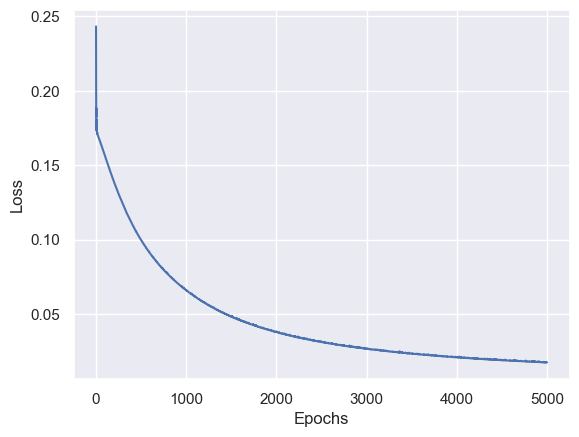

In [273]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

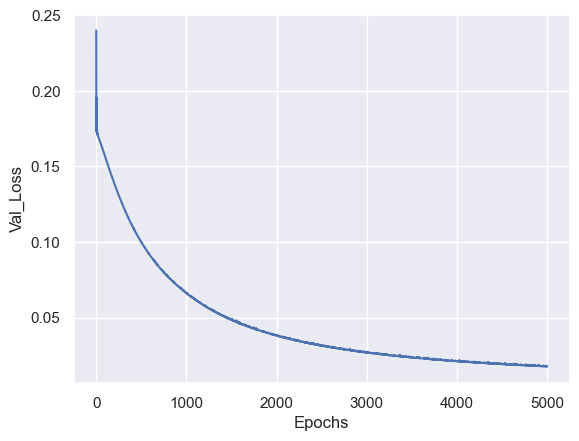

In [274]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [275]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\Alpha-Dwarfs.h5


In [276]:
predalpha = modelAlpha.predict(X_test)

 1/52 [..............................] - ETA: 4s

52/52 [==============================] - 0s 2ms/step


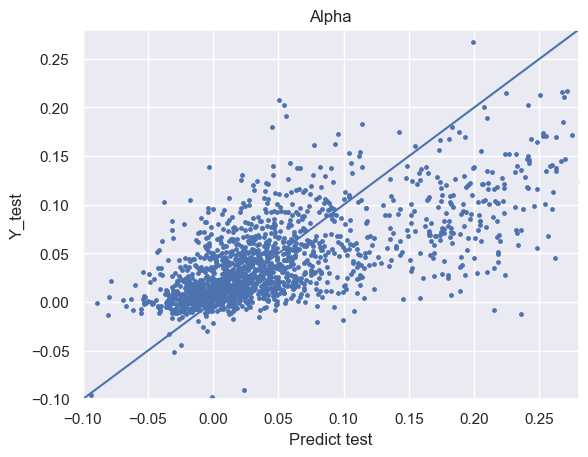

In [277]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [278]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 44.0%


In [279]:
Y_test['alpha_predict'] = predalpha

In [280]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-s24s56_0018245   4980.4740  4.530492  0.251780 -0.006163   
iDR4_3_STRIPE82-0062_0029486  6004.6694  4.271275 -0.134030  0.003117   
iDR4_3_SPLUS-n02s23_0016665   4625.6675  4.588470  0.016982  0.010345   
iDR4_3_MC0007_0170355         5263.0440  4.539022 -0.095235 -0.018563   
iDR4_3_STRIPE82-0069_0040230  5568.1885  4.432549  0.161560 -0.004485   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133   5863.7676  4.238569 -0.040888  0.009044   
iDR4_3_SPLUS-s02s12_0018608   5829.5420  4.448620 -0.260380  0.027761   
iDR4_3_MC0023_0006367         5202.6094  4.502508  0.139140  0.015770   
iDR4_3_STRIPE82-0004_0035258  4751.0854  4.601410 -0.527340  0.269325   
iDR4_3_SPLUS-n02s24_0034796   5195.7160  4.503645  0.224590 -0.016354   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245   0.008195 -0.081793  0.227130  0.078970   
iDR4_3_STRIPE82-0062_0029486 -0.080919  0.017574  0.359490  0.038363   
iDR4_3_SPLUS-n02s23_0016665   0.004263 -0.032570  0.086852  0.050571   
iDR4_3_MC0007_0170355        -0.110443 -0.012167 -0.219973 -0.005095   
iDR4_3_STRIPE82-0069_0040230  0.030763 -0.041434  0.143860  0.040400   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133  -0.019940 -0.095936 -0.186643  0.042435   
iDR4_3_SPLUS-s02s12_0018608  -0.081187 -0.027008  0.333480  0.002580   
iDR4_3_MC0023_0006367        -0.005522 -0.051787  0.124270  0.008400   
iDR4_3_STRIPE82-0004_0035258 -0.281340  0.159986 -0.503040 -0.100790   
iDR4_3_SPLUS-n02s24_0034796  -0.010340 -0.038755  0.138340  0.075040   

                                 MG_FE     SI_FE  alpha_predict  MGFE_predict  \
ID                                                                              
iDR4_3_SPLUS-s24s56_0018245   0.071862  0.051422       0.007039      0.036906   
iDR4_3_STRIPE82-0062_0029486  0.025431  0.078439       0.064970      0.101170   
iDR4_3_SPLUS-n02s23_0016665  -0.018067 -0.010329       0.026054      0.034790   
iDR4_3_MC0007_0170355         0.006520  0.018605       0.035470      0.085424   
iDR4_3_STRIPE82-0069_0040230  0.035464  0.053255      -0.009872      0.006397   
...                                ...       ...            ...           ...   
iDR4_3_SPLUS-n09s40_0048133   0.022663  0.067912       0.001613      0.024937   
iDR4_3_SPLUS-s02s12_0018608   0.029521  0.090173       0.104902      0.191748   
iDR4_3_MC0023_0006367         0.065302  0.092573      -0.006266      0.042057   
iDR4_3_STRIPE82-0004_0035258  0.322439  0.243093       0.146901      0.192172   
iDR4_3_SPLUS-n02s24_0034796   0.015924 -0.012777       0.015991      0.051204   

                              CFE_predict  CAFE_predict  NFE_predict  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245      0.016389     -0.009201     0.147500   
iDR4_3_STRIPE82-0062_0029486     0.022258      0.062398     0.136079   
iDR4_3_SPLUS-n02s23_0016665     -0.024604      0.002666     0.049242   
iDR4_3_MC0007_0170355           -0.025094      0.027536    -0.027458   
iDR4_3_STRIPE82-0069_0040230    -0.078321     -0.023851     0.148834   
...                                   ...           ...          ...   
iDR4_3_SPLUS-n09s40_0048133     -0.062593     -0.007828     0.084540   
iDR4_3_SPLUS-s02s12_0018608      0.051692      0.089785    -0.036926   
iDR4_3_MC0023_0006367           -0.019490     -0.026609     0.183169   
iDR4_3_STRIPE82-0004_0035258    -0.082251      0.073357    -0.049983   
iDR4_3_SPLUS-n02s24_0034796     -0.009530      0.006594     0.061123   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-s24s56_0018245       0.033

In [281]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [282]:
Parametro = "MGFE"
columnTrain = 'MG_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [283]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n12s38_0011323   5044.0176  3.803557 -0.304270  0.213575   
iDR4_3_SPLUS-n13s40_0043440   5021.9185  4.515523 -0.149280  0.110855   
iDR4_3_STRIPE82-0057_0002611  5242.5703  3.688048 -0.267080  0.058717   
iDR4_3_STRIPE82-0068_0024385  5845.6064  4.111219  0.013605 -0.008392   
iDR4_3_SPLUS-n02s21_0000716   5489.9004  4.493428 -0.244860  0.199935   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   5228.2944  3.843256  0.205060  0.031281   
iDR4_3_SPLUS-n01s28_0024246   5622.5050  4.352720  0.100910  0.005477   
iDR4_3_SPLUS-s21s10_0017166   5838.3364  4.345857 -0.032488  0.009575   
iDR4_3_STRIPE82-0105_0078578  5238.7300  4.500705 -0.039062  0.050012   
iDR4_3_STRIPE82-0019_0032078  5766.9650  4.399403  0.062936 -0.045140   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n12s38_0011323   0.117850  0.146535 -0.080637  0.109123   
iDR4_3_SPLUS-n13s40_0043440   0.020936  0.076856  0.108240  0.039290   
iDR4_3_STRIPE82-0057_0002611  0.045627  0.098225  0.017821  0.045023   
iDR4_3_STRIPE82-0068_0024385 -0.094493 -0.040798  0.032949  0.066961   
iDR4_3_SPLUS-n02s21_0000716   0.004963  0.171066  0.013075  0.044320   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   0.029564  0.024332  0.169480  0.091833   
iDR4_3_SPLUS-n01s28_0024246  -0.072932  0.036473  0.048428  0.052060   
iDR4_3_SPLUS-s21s10_0017166  -0.042209 -0.017597  0.066795  0.082377   
iDR4_3_STRIPE82-0105_0078578 -0.029282  0.025886 -0.058891  0.003011   
iDR4_3_STRIPE82-0019_0032078 -0.145171 -0.015530 -0.146801 -0.010013   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_SPLUS-n12s38_0011323   0.305723  0.127291  
iDR4_3_SPLUS-n13s40_0043440   0.148676  0.012389  
iDR4_3_STRIPE82-0057_0002611  0.062371 -0.000868  
iDR4_3_STRIPE82-0068_0024385  0.007667  0.031751  
iDR4_3_SPLUS-n02s21_0000716   0.292359  0.185593  
...                                ...       ...  
iDR4_3_SPLUS-s02s04_0040117   0.056680  0.024656  
iDR4_3_SPLUS-n01s28_0024246   0.034755  0.074954  
iDR4_3_SPLUS-s21s10_0017166   0.058901  0.061670  
iDR4_3_STRIPE82-0105_0078578  0.107997  0.095846  
iDR4_3_STRIPE82-0019_0032078 -0.068943  0.049284  

[5907 rows x 10 columns]

In [284]:
modelMGFE = training_model()

In [285]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 4000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000


3/3 - 1s - loss: 0.2437 - val_loss: 0.2054 - 657ms/epoch - 219ms/step
Epoch 2/4000
3/3 - 0s - loss: 0.2045 - val_loss: 0.1912 - 58ms/epoch - 19ms/step
Epoch 3/4000
3/3 - 0s - loss: 0.1833 - val_loss: 0.1821 - 102ms/epoch - 34ms/step
Epoch 4/4000
3/3 - 0s - loss: 0.1830 - val_loss: 0.1864 - 54ms/epoch - 18ms/step
Epoch 5/4000
3/3 - 0s - loss: 0.1827 - val_loss: 0.1800 - 75ms/epoch - 25ms/step
Epoch 6/4000
3/3 - 0s - loss: 0.1792 - val_loss: 0.1820 - 54ms/epoch - 18ms/step
Epoch 7/4000
3/3 - 0s - loss: 0.1801 - val_loss: 0.1796 - 68ms/epoch - 23ms/step
Epoch 8/4000
3/3 - 0s - loss: 0.1785 - val_loss: 0.1800 - 52ms/epoch - 17ms/step
Epoch 9/4000
3/3 - 0s - loss: 0.1789 - val_loss: 0.1790 - 69ms/epoch - 23ms/step
Epoch 10/4000
3/3 - 0s - loss: 0.1778 - val_loss: 0.1787 - 47ms/epoch - 16ms/step
Epoch 11/4000
3/3 - 0s - loss: 0.1778 - val_loss: 0.1786 - 69ms/epoch - 23ms/step
Epoch 12/4000
3/3 - 0s - loss: 0.1774 - val_loss: 0.1779 - 53ms/epoch - 18ms/step
Epoch 13/4000
3/3 - 0s - loss: 0.17

Text(0, 0.5, 'Loss')

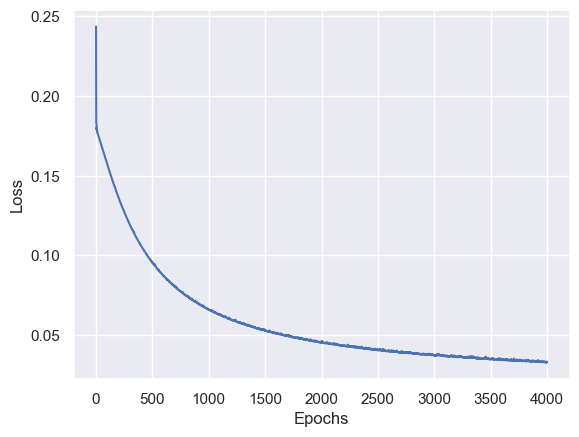

In [286]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

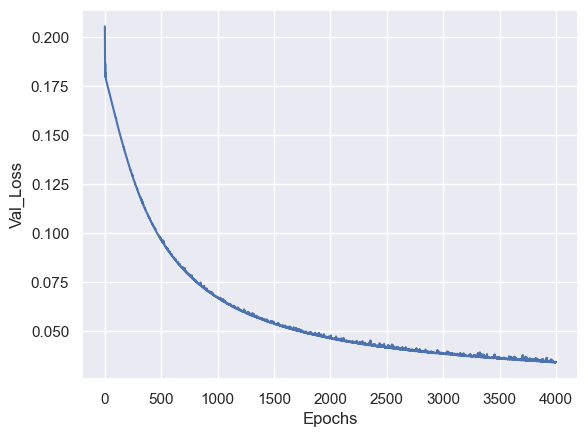

In [287]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [288]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\MGFE-Dwarfs.h5


In [289]:
predMGFE = modelMGFE.predict(X_test)

 1/52 [..............................] - ETA: 3s

52/52 [==============================] - 0s 2ms/step


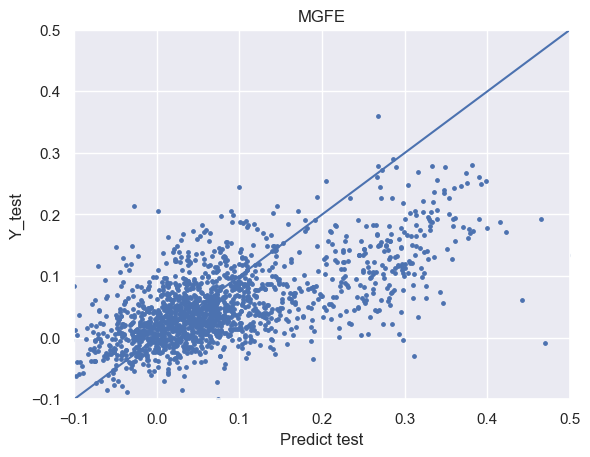

In [290]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.5)
plt.ylim(-0.1, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [291]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 40.0%


In [292]:
Y_test['MGFE_predict'] = predMGFE

In [293]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-s24s56_0018245   4980.4740  4.530492  0.251780 -0.006163   
iDR4_3_STRIPE82-0062_0029486  6004.6694  4.271275 -0.134030  0.003117   
iDR4_3_SPLUS-n02s23_0016665   4625.6675  4.588470  0.016982  0.010345   
iDR4_3_MC0007_0170355         5263.0440  4.539022 -0.095235 -0.018563   
iDR4_3_STRIPE82-0069_0040230  5568.1885  4.432549  0.161560 -0.004485   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133   5863.7676  4.238569 -0.040888  0.009044   
iDR4_3_SPLUS-s02s12_0018608   5829.5420  4.448620 -0.260380  0.027761   
iDR4_3_MC0023_0006367         5202.6094  4.502508  0.139140  0.015770   
iDR4_3_STRIPE82-0004_0035258  4751.0854  4.601410 -0.527340  0.269325   
iDR4_3_SPLUS-n02s24_0034796   5195.7160  4.503645  0.224590 -0.016354   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245   0.008195 -0.081793  0.227130  0.078970   
iDR4_3_STRIPE82-0062_0029486 -0.080919  0.017574  0.359490  0.038363   
iDR4_3_SPLUS-n02s23_0016665   0.004263 -0.032570  0.086852  0.050571   
iDR4_3_MC0007_0170355        -0.110443 -0.012167 -0.219973 -0.005095   
iDR4_3_STRIPE82-0069_0040230  0.030763 -0.041434  0.143860  0.040400   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133  -0.019940 -0.095936 -0.186643  0.042435   
iDR4_3_SPLUS-s02s12_0018608  -0.081187 -0.027008  0.333480  0.002580   
iDR4_3_MC0023_0006367        -0.005522 -0.051787  0.124270  0.008400   
iDR4_3_STRIPE82-0004_0035258 -0.281340  0.159986 -0.503040 -0.100790   
iDR4_3_SPLUS-n02s24_0034796  -0.010340 -0.038755  0.138340  0.075040   

                                 MG_FE     SI_FE  alpha_predict  MGFE_predict  \
ID                                                                              
iDR4_3_SPLUS-s24s56_0018245   0.071862  0.051422       0.007039      0.028251   
iDR4_3_STRIPE82-0062_0029486  0.025431  0.078439       0.064970      0.077175   
iDR4_3_SPLUS-n02s23_0016665  -0.018067 -0.010329       0.026054      0.001342   
iDR4_3_MC0007_0170355         0.006520  0.018605       0.035470      0.049780   
iDR4_3_STRIPE82-0069_0040230  0.035464  0.053255      -0.009872     -0.015059   
...                                ...       ...            ...           ...   
iDR4_3_SPLUS-n09s40_0048133   0.022663  0.067912       0.001613     -0.013759   
iDR4_3_SPLUS-s02s12_0018608   0.029521  0.090173       0.104902      0.159239   
iDR4_3_MC0023_0006367         0.065302  0.092573      -0.006266      0.020797   
iDR4_3_STRIPE82-0004_0035258  0.322439  0.243093       0.146901      0.222300   
iDR4_3_SPLUS-n02s24_0034796   0.015924 -0.012777       0.015991      0.036786   

                              CFE_predict  CAFE_predict  NFE_predict  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245      0.016389     -0.009201     0.147500   
iDR4_3_STRIPE82-0062_0029486     0.022258      0.062398     0.136079   
iDR4_3_SPLUS-n02s23_0016665     -0.024604      0.002666     0.049242   
iDR4_3_MC0007_0170355           -0.025094      0.027536    -0.027458   
iDR4_3_STRIPE82-0069_0040230    -0.078321     -0.023851     0.148834   
...                                   ...           ...          ...   
iDR4_3_SPLUS-n09s40_0048133     -0.062593     -0.007828     0.084540   
iDR4_3_SPLUS-s02s12_0018608      0.051692      0.089785    -0.036926   
iDR4_3_MC0023_0006367           -0.019490     -0.026609     0.183169   
iDR4_3_STRIPE82-0004_0035258    -0.082251      0.073357    -0.049983   
iDR4_3_SPLUS-n02s24_0034796     -0.009530      0.006594     0.061123   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-s24s56_0018245       0.033

In [294]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [135]:
Parametro = "CFE"
columnTrain = 'C_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [136]:
modelCFE = training_model()

In [137]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 0.2205 - val_loss: 0.2118 - 688ms/epoch - 229ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.1963 - val_loss: 0.1816 - 88ms/epoch - 29ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.1850 - val_loss: 0.1896 - 84ms/epoch - 28ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.1836 - val_loss: 0.1801 - 75ms/epoch - 25ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.1802 - val_loss: 0.1843 - 78ms/epoch - 26ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.1806 - val_loss: 0.1789 - 60ms/epoch - 20ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1784 - val_loss: 0.1809 - 59ms/epoch - 20ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1789 - val_loss: 0.1784 - 59ms/epoch - 20ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.1775 - val_loss: 0.1798 - 60ms/epoch - 20ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.1779 - val_loss: 0.1781 - 57ms/epoch - 19ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.1769 - val_loss: 0.1783 - 56ms/epoch - 19ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.1770 - val_loss: 0.1776 - 53ms/epoch - 18ms/step
Epoch 13/2000
3/3 - 0s - loss: 0.176

Text(0, 0.5, 'Loss')

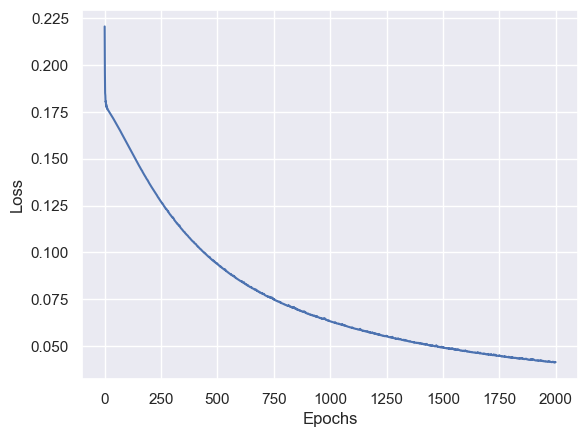

In [138]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

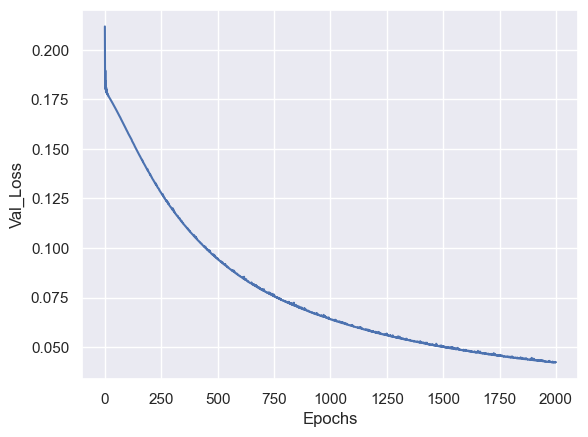

In [139]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [140]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CFE-Dwarfs.h5


In [141]:
predCFE = modelCFE.predict(X_test)

 1/52 [..............................] - ETA: 3s

52/52 [==============================] - 0s 2ms/step


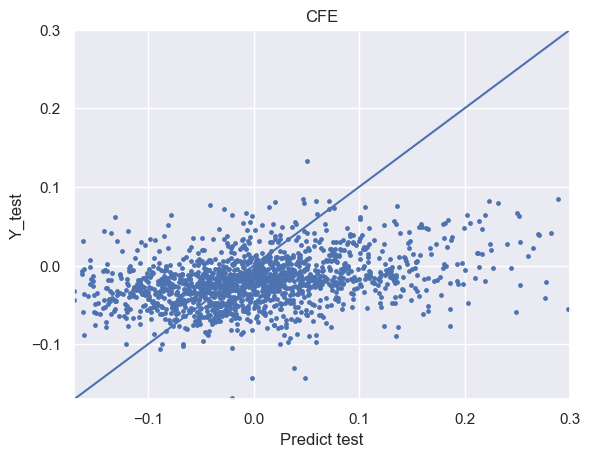

In [142]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.17, 0.3)
plt.ylim(-0.17, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [143]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 11.0%


In [144]:
Y_test['CFE_predict'] = predCFE

In [145]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-s24s56_0018245   4980.4740  4.530492  0.251780 -0.006163   
iDR4_3_STRIPE82-0062_0029486  6004.6694  4.271275 -0.134030  0.003117   
iDR4_3_SPLUS-n02s23_0016665   4625.6675  4.588470  0.016982  0.010345   
iDR4_3_MC0007_0170355         5263.0440  4.539022 -0.095235 -0.018563   
iDR4_3_STRIPE82-0069_0040230  5568.1885  4.432549  0.161560 -0.004485   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133   5863.7676  4.238569 -0.040888  0.009044   
iDR4_3_SPLUS-s02s12_0018608   5829.5420  4.448620 -0.260380  0.027761   
iDR4_3_MC0023_0006367         5202.6094  4.502508  0.139140  0.015770   
iDR4_3_STRIPE82-0004_0035258  4751.0854  4.601410 -0.527340  0.269325   
iDR4_3_SPLUS-n02s24_0034796   5195.7160  4.503645  0.224590 -0.016354   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245   0.008195 -0.081793  0.227130  0.078970   
iDR4_3_STRIPE82-0062_0029486 -0.080919  0.017574  0.359490  0.038363   
iDR4_3_SPLUS-n02s23_0016665   0.004263 -0.032570  0.086852  0.050571   
iDR4_3_MC0007_0170355        -0.110443 -0.012167 -0.219973 -0.005095   
iDR4_3_STRIPE82-0069_0040230  0.030763 -0.041434  0.143860  0.040400   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133  -0.019940 -0.095936 -0.186643  0.042435   
iDR4_3_SPLUS-s02s12_0018608  -0.081187 -0.027008  0.333480  0.002580   
iDR4_3_MC0023_0006367        -0.005522 -0.051787  0.124270  0.008400   
iDR4_3_STRIPE82-0004_0035258 -0.281340  0.159986 -0.503040 -0.100790   
iDR4_3_SPLUS-n02s24_0034796  -0.010340 -0.038755  0.138340  0.075040   

                                 MG_FE     SI_FE  alpha_predict  MGFE_predict  \
ID                                                                              
iDR4_3_SPLUS-s24s56_0018245   0.071862  0.051422       0.004460      0.036906   
iDR4_3_STRIPE82-0062_0029486  0.025431  0.078439       0.067877      0.101170   
iDR4_3_SPLUS-n02s23_0016665  -0.018067 -0.010329       0.022909      0.034790   
iDR4_3_MC0007_0170355         0.006520  0.018605       0.052512      0.085424   
iDR4_3_STRIPE82-0069_0040230  0.035464  0.053255      -0.007523      0.006397   
...                                ...       ...            ...           ...   
iDR4_3_SPLUS-n09s40_0048133   0.022663  0.067912      -0.002347      0.024937   
iDR4_3_SPLUS-s02s12_0018608   0.029521  0.090173       0.109095      0.191748   
iDR4_3_MC0023_0006367         0.065302  0.092573      -0.005210      0.042057   
iDR4_3_STRIPE82-0004_0035258  0.322439  0.243093       0.153330      0.192172   
iDR4_3_SPLUS-n02s24_0034796   0.015924 -0.012777       0.020791      0.051204   

                              CFE_predict  
ID                                         
iDR4_3_SPLUS-s24s56_0018245      0.016389  
iDR4_3_STRIPE82-0062_0029486     0.022258  
iDR4_3_SPLUS-n02s23_0016665     -0.024604  
iDR4_3_MC0007_0170355           -0.025094  
iDR4_3_STRIPE82-0069_0040230    -0.078321  
...                                   ...  
iDR4_3_SPLUS-n09s40_0048133     -0.062593  
iDR4_3_SPLUS-s02s12_0018608      0.051692  
iDR4_3_MC0023_0006367           -0.019490  
iDR4_3_STRIPE82-0004_0035258    -0.082251  
iDR4_3_SPLUS-n02s24_0034796     -0.009530  

[1642 rows x 13 columns]

In [146]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [147]:
Parametro = "CAFE"
columnTrain = 'CA_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [148]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n12s38_0011323   5044.0176  3.803557 -0.304270  0.213575   
iDR4_3_SPLUS-n13s40_0043440   5021.9185  4.515523 -0.149280  0.110855   
iDR4_3_STRIPE82-0057_0002611  5242.5703  3.688048 -0.267080  0.058717   
iDR4_3_STRIPE82-0068_0024385  5845.6064  4.111219  0.013605 -0.008392   
iDR4_3_SPLUS-n02s21_0000716   5489.9004  4.493428 -0.244860  0.199935   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   5228.2944  3.843256  0.205060  0.031281   
iDR4_3_SPLUS-n01s28_0024246   5622.5050  4.352720  0.100910  0.005477   
iDR4_3_SPLUS-s21s10_0017166   5838.3364  4.345857 -0.032488  0.009575   
iDR4_3_STRIPE82-0105_0078578  5238.7300  4.500705 -0.039062  0.050012   
iDR4_3_STRIPE82-0019_0032078  5766.9650  4.399403  0.062936 -0.045140   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n12s38_0011323   0.117850  0.146535 -0.080637  0.109123   
iDR4_3_SPLUS-n13s40_0043440   0.020936  0.076856  0.108240  0.039290   
iDR4_3_STRIPE82-0057_0002611  0.045627  0.098225  0.017821  0.045023   
iDR4_3_STRIPE82-0068_0024385 -0.094493 -0.040798  0.032949  0.066961   
iDR4_3_SPLUS-n02s21_0000716   0.004963  0.171066  0.013075  0.044320   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   0.029564  0.024332  0.169480  0.091833   
iDR4_3_SPLUS-n01s28_0024246  -0.072932  0.036473  0.048428  0.052060   
iDR4_3_SPLUS-s21s10_0017166  -0.042209 -0.017597  0.066795  0.082377   
iDR4_3_STRIPE82-0105_0078578 -0.029282  0.025886 -0.058891  0.003011   
iDR4_3_STRIPE82-0019_0032078 -0.145171 -0.015530 -0.146801 -0.010013   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_SPLUS-n12s38_0011323   0.305723  0.127291  
iDR4_3_SPLUS-n13s40_0043440   0.148676  0.012389  
iDR4_3_STRIPE82-0057_0002611  0.062371 -0.000868  
iDR4_3_STRIPE82-0068_0024385  0.007667  0.031751  
iDR4_3_SPLUS-n02s21_0000716   0.292359  0.185593  
...                                ...       ...  
iDR4_3_SPLUS-s02s04_0040117   0.056680  0.024656  
iDR4_3_SPLUS-n01s28_0024246   0.034755  0.074954  
iDR4_3_SPLUS-s21s10_0017166   0.058901  0.061670  
iDR4_3_STRIPE82-0105_0078578  0.107997  0.095846  
iDR4_3_STRIPE82-0019_0032078 -0.068943  0.049284  

[5907 rows x 10 columns]

In [150]:
modelCAFE = training_model()

In [151]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 0.1929 - val_loss: 0.1783 - 759ms/epoch - 253ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.1791 - val_loss: 0.1821 - 64ms/epoch - 21ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.1791 - val_loss: 0.1740 - 67ms/epoch - 22ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.1774 - val_loss: 0.1745 - 68ms/epoch - 23ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.1755 - val_loss: 0.1754 - 57ms/epoch - 19ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.1761 - val_loss: 0.1734 - 60ms/epoch - 20ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1747 - val_loss: 0.1735 - 59ms/epoch - 20ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1747 - val_loss: 0.1728 - 58ms/epoch - 19ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.1742 - val_loss: 0.1731 - 61ms/epoch - 20ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.1737 - val_loss: 0.1722 - 55ms/epoch - 18ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.1736 - val_loss: 0.1719 - 59ms/epoch - 20ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.1731 - val_loss: 0.1721 - 66ms/epoch - 22ms/step
Epoch 13/2000
3/3 - 0s - loss: 0.172

Text(0, 0.5, 'Loss')

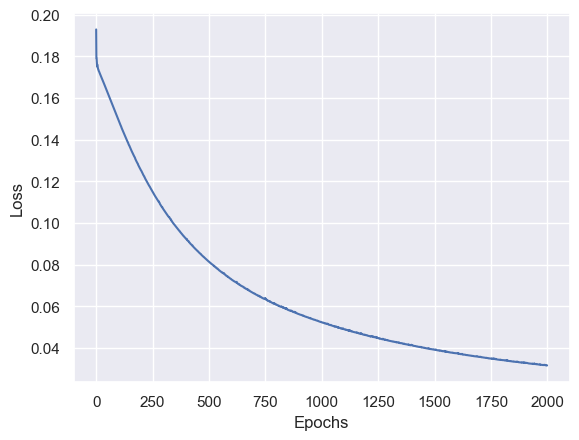

In [152]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

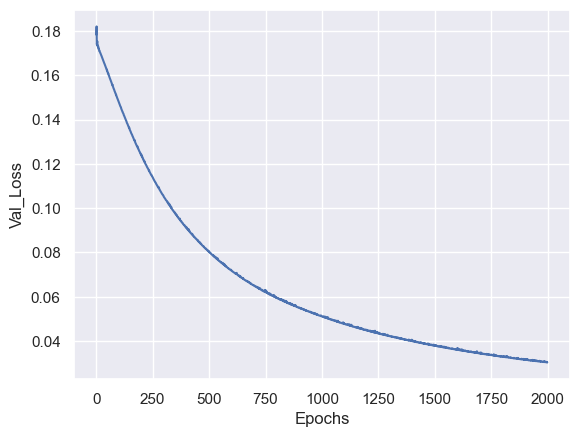

In [153]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [154]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CAFE-Dwarfs.h5


In [155]:
predCAFE = modelCAFE.predict(X_test)

52/52 [==============================] - 0s 3ms/step


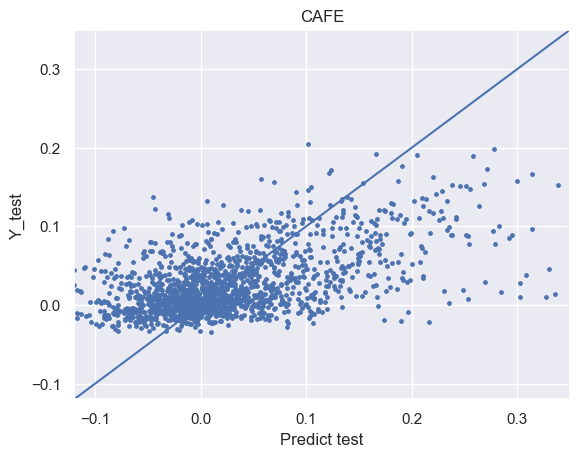

In [156]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [157]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 19.0%


In [158]:
Y_test['CAFE_predict'] = predCAFE

In [159]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-s24s56_0018245   4980.4740  4.530492  0.251780 -0.006163   
iDR4_3_STRIPE82-0062_0029486  6004.6694  4.271275 -0.134030  0.003117   
iDR4_3_SPLUS-n02s23_0016665   4625.6675  4.588470  0.016982  0.010345   
iDR4_3_MC0007_0170355         5263.0440  4.539022 -0.095235 -0.018563   
iDR4_3_STRIPE82-0069_0040230  5568.1885  4.432549  0.161560 -0.004485   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133   5863.7676  4.238569 -0.040888  0.009044   
iDR4_3_SPLUS-s02s12_0018608   5829.5420  4.448620 -0.260380  0.027761   
iDR4_3_MC0023_0006367         5202.6094  4.502508  0.139140  0.015770   
iDR4_3_STRIPE82-0004_0035258  4751.0854  4.601410 -0.527340  0.269325   
iDR4_3_SPLUS-n02s24_0034796   5195.7160  4.503645  0.224590 -0.016354   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245   0.008195 -0.081793  0.227130  0.078970   
iDR4_3_STRIPE82-0062_0029486 -0.080919  0.017574  0.359490  0.038363   
iDR4_3_SPLUS-n02s23_0016665   0.004263 -0.032570  0.086852  0.050571   
iDR4_3_MC0007_0170355        -0.110443 -0.012167 -0.219973 -0.005095   
iDR4_3_STRIPE82-0069_0040230  0.030763 -0.041434  0.143860  0.040400   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133  -0.019940 -0.095936 -0.186643  0.042435   
iDR4_3_SPLUS-s02s12_0018608  -0.081187 -0.027008  0.333480  0.002580   
iDR4_3_MC0023_0006367        -0.005522 -0.051787  0.124270  0.008400   
iDR4_3_STRIPE82-0004_0035258 -0.281340  0.159986 -0.503040 -0.100790   
iDR4_3_SPLUS-n02s24_0034796  -0.010340 -0.038755  0.138340  0.075040   

                                 MG_FE     SI_FE  alpha_predict  MGFE_predict  \
ID                                                                              
iDR4_3_SPLUS-s24s56_0018245   0.071862  0.051422       0.004460      0.036906   
iDR4_3_STRIPE82-0062_0029486  0.025431  0.078439       0.067877      0.101170   
iDR4_3_SPLUS-n02s23_0016665  -0.018067 -0.010329       0.022909      0.034790   
iDR4_3_MC0007_0170355         0.006520  0.018605       0.052512      0.085424   
iDR4_3_STRIPE82-0069_0040230  0.035464  0.053255      -0.007523      0.006397   
...                                ...       ...            ...           ...   
iDR4_3_SPLUS-n09s40_0048133   0.022663  0.067912      -0.002347      0.024937   
iDR4_3_SPLUS-s02s12_0018608   0.029521  0.090173       0.109095      0.191748   
iDR4_3_MC0023_0006367         0.065302  0.092573      -0.005210      0.042057   
iDR4_3_STRIPE82-0004_0035258  0.322439  0.243093       0.153330      0.192172   
iDR4_3_SPLUS-n02s24_0034796   0.015924 -0.012777       0.020791      0.051204   

                              CFE_predict  CAFE_predict  
ID                                                       
iDR4_3_SPLUS-s24s56_0018245      0.016389     -0.009201  
iDR4_3_STRIPE82-0062_0029486     0.022258      0.062398  
iDR4_3_SPLUS-n02s23_0016665     -0.024604      0.002666  
iDR4_3_MC0007_0170355           -0.025094      0.027536  
iDR4_3_STRIPE82-0069_0040230    -0.078321     -0.023851  
...                                   ...           ...  
iDR4_3_SPLUS-n09s40_0048133     -0.062593     -0.007828  
iDR4_3_SPLUS-s02s12_0018608      0.051692      0.089785  
iDR4_3_MC0023_0006367           -0.019490     -0.026609  
iDR4_3_STRIPE82-0004_0035258    -0.082251      0.073357  
iDR4_3_SPLUS-n02s24_0034796     -0.009530      0.006594  

[1642 rows x 14 columns]

In [160]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [308]:
Parametro = "NFE"
columnTrain = 'N_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [309]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n12s38_0011323   5044.0176  3.803557 -0.304270  0.213575   
iDR4_3_SPLUS-n13s40_0043440   5021.9185  4.515523 -0.149280  0.110855   
iDR4_3_STRIPE82-0057_0002611  5242.5703  3.688048 -0.267080  0.058717   
iDR4_3_STRIPE82-0068_0024385  5845.6064  4.111219  0.013605 -0.008392   
iDR4_3_SPLUS-n02s21_0000716   5489.9004  4.493428 -0.244860  0.199935   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   5228.2944  3.843256  0.205060  0.031281   
iDR4_3_SPLUS-n01s28_0024246   5622.5050  4.352720  0.100910  0.005477   
iDR4_3_SPLUS-s21s10_0017166   5838.3364  4.345857 -0.032488  0.009575   
iDR4_3_STRIPE82-0105_0078578  5238.7300  4.500705 -0.039062  0.050012   
iDR4_3_STRIPE82-0019_0032078  5766.9650  4.399403  0.062936 -0.045140   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n12s38_0011323   0.117850  0.146535 -0.080637  0.109123   
iDR4_3_SPLUS-n13s40_0043440   0.020936  0.076856  0.108240  0.039290   
iDR4_3_STRIPE82-0057_0002611  0.045627  0.098225  0.017821  0.045023   
iDR4_3_STRIPE82-0068_0024385 -0.094493 -0.040798  0.032949  0.066961   
iDR4_3_SPLUS-n02s21_0000716   0.004963  0.171066  0.013075  0.044320   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   0.029564  0.024332  0.169480  0.091833   
iDR4_3_SPLUS-n01s28_0024246  -0.072932  0.036473  0.048428  0.052060   
iDR4_3_SPLUS-s21s10_0017166  -0.042209 -0.017597  0.066795  0.082377   
iDR4_3_STRIPE82-0105_0078578 -0.029282  0.025886 -0.058891  0.003011   
iDR4_3_STRIPE82-0019_0032078 -0.145171 -0.015530 -0.146801 -0.010013   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_SPLUS-n12s38_0011323   0.305723  0.127291  
iDR4_3_SPLUS-n13s40_0043440   0.148676  0.012389  
iDR4_3_STRIPE82-0057_0002611  0.062371 -0.000868  
iDR4_3_STRIPE82-0068_0024385  0.007667  0.031751  
iDR4_3_SPLUS-n02s21_0000716   0.292359  0.185593  
...                                ...       ...  
iDR4_3_SPLUS-s02s04_0040117   0.056680  0.024656  
iDR4_3_SPLUS-n01s28_0024246   0.034755  0.074954  
iDR4_3_SPLUS-s21s10_0017166   0.058901  0.061670  
iDR4_3_STRIPE82-0105_0078578  0.107997  0.095846  
iDR4_3_STRIPE82-0019_0032078 -0.068943  0.049284  

[5907 rows x 10 columns]

In [310]:
modelNFE = training_model()

In [311]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 0.2667 - val_loss: 0.2442 - 933ms/epoch - 311ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.2591 - val_loss: 0.2306 - 54ms/epoch - 18ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.2366 - val_loss: 0.2475 - 76ms/epoch - 25ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.2405 - val_loss: 0.2255 - 55ms/epoch - 18ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.2322 - val_loss: 0.2296 - 56ms/epoch - 19ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.2305 - val_loss: 0.2261 - 50ms/epoch - 17ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.2302 - val_loss: 0.2269 - 48ms/epoch - 16ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.2268 - val_loss: 0.2243 - 55ms/epoch - 18ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.2278 - val_loss: 0.2224 - 48ms/epoch - 16ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.2256 - val_loss: 0.2254 - 102ms/epoch - 34ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.2254 - val_loss: 0.2216 - 48ms/epoch - 16ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.2248 - val_loss: 0.2211 - 79ms/epoch - 26ms/step
Epoch 13/2000
3/3 - 0s - loss: 0.22

Text(0, 0.5, 'Loss')

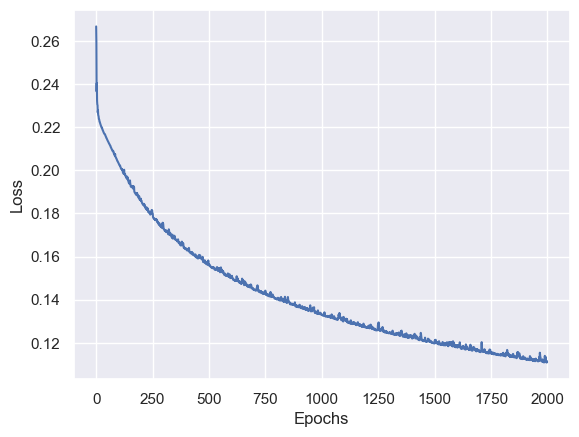

In [312]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

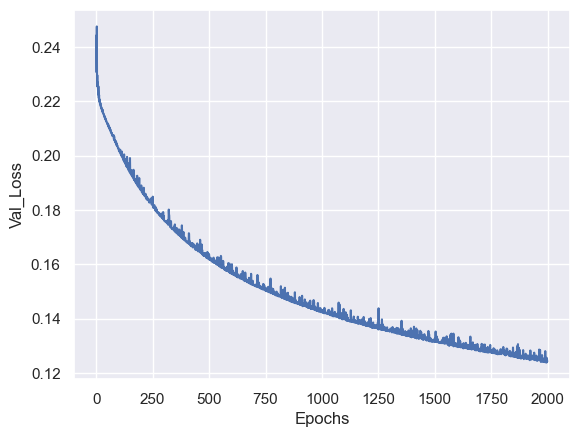

In [313]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [314]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NFE-Dwarfs.h5


In [315]:
predNFE = modelNFE.predict(X_test)

 1/52 [..............................] - ETA: 3s

52/52 [==============================] - 0s 2ms/step


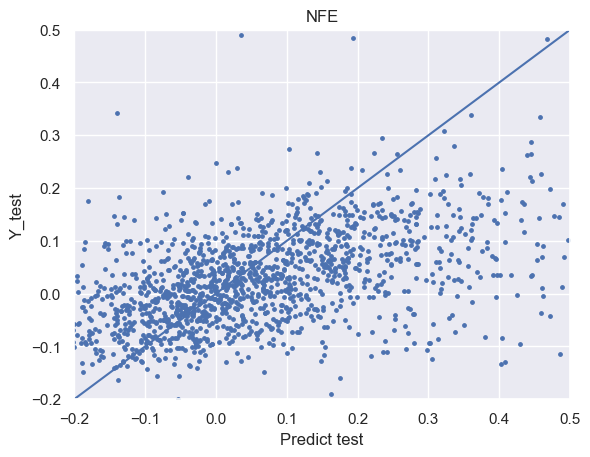

In [316]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [317]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 17.0%


In [318]:
Y_test['NFE_predict'] = predNFE

In [319]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-s24s56_0018245   4980.4740  4.530492  0.251780 -0.006163   
iDR4_3_STRIPE82-0062_0029486  6004.6694  4.271275 -0.134030  0.003117   
iDR4_3_SPLUS-n02s23_0016665   4625.6675  4.588470  0.016982  0.010345   
iDR4_3_MC0007_0170355         5263.0440  4.539022 -0.095235 -0.018563   
iDR4_3_STRIPE82-0069_0040230  5568.1885  4.432549  0.161560 -0.004485   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133   5863.7676  4.238569 -0.040888  0.009044   
iDR4_3_SPLUS-s02s12_0018608   5829.5420  4.448620 -0.260380  0.027761   
iDR4_3_MC0023_0006367         5202.6094  4.502508  0.139140  0.015770   
iDR4_3_STRIPE82-0004_0035258  4751.0854  4.601410 -0.527340  0.269325   
iDR4_3_SPLUS-n02s24_0034796   5195.7160  4.503645  0.224590 -0.016354   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245   0.008195 -0.081793  0.227130  0.078970   
iDR4_3_STRIPE82-0062_0029486 -0.080919  0.017574  0.359490  0.038363   
iDR4_3_SPLUS-n02s23_0016665   0.004263 -0.032570  0.086852  0.050571   
iDR4_3_MC0007_0170355        -0.110443 -0.012167 -0.219973 -0.005095   
iDR4_3_STRIPE82-0069_0040230  0.030763 -0.041434  0.143860  0.040400   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133  -0.019940 -0.095936 -0.186643  0.042435   
iDR4_3_SPLUS-s02s12_0018608  -0.081187 -0.027008  0.333480  0.002580   
iDR4_3_MC0023_0006367        -0.005522 -0.051787  0.124270  0.008400   
iDR4_3_STRIPE82-0004_0035258 -0.281340  0.159986 -0.503040 -0.100790   
iDR4_3_SPLUS-n02s24_0034796  -0.010340 -0.038755  0.138340  0.075040   

                                 MG_FE     SI_FE  alpha_predict  MGFE_predict  \
ID                                                                              
iDR4_3_SPLUS-s24s56_0018245   0.071862  0.051422       0.007039      0.028251   
iDR4_3_STRIPE82-0062_0029486  0.025431  0.078439       0.064970      0.077175   
iDR4_3_SPLUS-n02s23_0016665  -0.018067 -0.010329       0.026054      0.001342   
iDR4_3_MC0007_0170355         0.006520  0.018605       0.035470      0.049780   
iDR4_3_STRIPE82-0069_0040230  0.035464  0.053255      -0.009872     -0.015059   
...                                ...       ...            ...           ...   
iDR4_3_SPLUS-n09s40_0048133   0.022663  0.067912       0.001613     -0.013759   
iDR4_3_SPLUS-s02s12_0018608   0.029521  0.090173       0.104902      0.159239   
iDR4_3_MC0023_0006367         0.065302  0.092573      -0.006266      0.020797   
iDR4_3_STRIPE82-0004_0035258  0.322439  0.243093       0.146901      0.222300   
iDR4_3_SPLUS-n02s24_0034796   0.015924 -0.012777       0.015991      0.036786   

                              CFE_predict  CAFE_predict  NFE_predict  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245      0.016389     -0.009201     0.154247   
iDR4_3_STRIPE82-0062_0029486     0.022258      0.062398     0.119858   
iDR4_3_SPLUS-n02s23_0016665     -0.024604      0.002666     0.050786   
iDR4_3_MC0007_0170355           -0.025094      0.027536    -0.024720   
iDR4_3_STRIPE82-0069_0040230    -0.078321     -0.023851     0.147411   
...                                   ...           ...          ...   
iDR4_3_SPLUS-n09s40_0048133     -0.062593     -0.007828     0.084462   
iDR4_3_SPLUS-s02s12_0018608      0.051692      0.089785    -0.040339   
iDR4_3_MC0023_0006367           -0.019490     -0.026609     0.180398   
iDR4_3_STRIPE82-0004_0035258    -0.082251      0.073357    -0.056218   
iDR4_3_SPLUS-n02s24_0034796     -0.009530      0.006594     0.080663   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-s24s56_0018245       0.033

In [320]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [174]:
Parametro = "SIFE"
columnTrain = 'SI_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [175]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n12s38_0011323   5044.0176  3.803557 -0.304270  0.213575   
iDR4_3_SPLUS-n13s40_0043440   5021.9185  4.515523 -0.149280  0.110855   
iDR4_3_STRIPE82-0057_0002611  5242.5703  3.688048 -0.267080  0.058717   
iDR4_3_STRIPE82-0068_0024385  5845.6064  4.111219  0.013605 -0.008392   
iDR4_3_SPLUS-n02s21_0000716   5489.9004  4.493428 -0.244860  0.199935   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   5228.2944  3.843256  0.205060  0.031281   
iDR4_3_SPLUS-n01s28_0024246   5622.5050  4.352720  0.100910  0.005477   
iDR4_3_SPLUS-s21s10_0017166   5838.3364  4.345857 -0.032488  0.009575   
iDR4_3_STRIPE82-0105_0078578  5238.7300  4.500705 -0.039062  0.050012   
iDR4_3_STRIPE82-0019_0032078  5766.9650  4.399403  0.062936 -0.045140   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n12s38_0011323   0.117850  0.146535 -0.080637  0.109123   
iDR4_3_SPLUS-n13s40_0043440   0.020936  0.076856  0.108240  0.039290   
iDR4_3_STRIPE82-0057_0002611  0.045627  0.098225  0.017821  0.045023   
iDR4_3_STRIPE82-0068_0024385 -0.094493 -0.040798  0.032949  0.066961   
iDR4_3_SPLUS-n02s21_0000716   0.004963  0.171066  0.013075  0.044320   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   0.029564  0.024332  0.169480  0.091833   
iDR4_3_SPLUS-n01s28_0024246  -0.072932  0.036473  0.048428  0.052060   
iDR4_3_SPLUS-s21s10_0017166  -0.042209 -0.017597  0.066795  0.082377   
iDR4_3_STRIPE82-0105_0078578 -0.029282  0.025886 -0.058891  0.003011   
iDR4_3_STRIPE82-0019_0032078 -0.145171 -0.015530 -0.146801 -0.010013   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_SPLUS-n12s38_0011323   0.305723  0.127291  
iDR4_3_SPLUS-n13s40_0043440   0.148676  0.012389  
iDR4_3_STRIPE82-0057_0002611  0.062371 -0.000868  
iDR4_3_STRIPE82-0068_0024385  0.007667  0.031751  
iDR4_3_SPLUS-n02s21_0000716   0.292359  0.185593  
...                                ...       ...  
iDR4_3_SPLUS-s02s04_0040117   0.056680  0.024656  
iDR4_3_SPLUS-n01s28_0024246   0.034755  0.074954  
iDR4_3_SPLUS-s21s10_0017166   0.058901  0.061670  
iDR4_3_STRIPE82-0105_0078578  0.107997  0.095846  
iDR4_3_STRIPE82-0019_0032078 -0.068943  0.049284  

[5907 rows x 10 columns]

In [176]:
modelSIFE = training_model()

In [177]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 0.2173 - val_loss: 0.2012 - 696ms/epoch - 232ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.1863 - val_loss: 0.1917 - 99ms/epoch - 33ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.1880 - val_loss: 0.1726 - 107ms/epoch - 36ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.1760 - val_loss: 0.1805 - 97ms/epoch - 32ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.1773 - val_loss: 0.1717 - 70ms/epoch - 23ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.1742 - val_loss: 0.1749 - 72ms/epoch - 24ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1735 - val_loss: 0.1717 - 116ms/epoch - 39ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1732 - val_loss: 0.1727 - 66ms/epoch - 22ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.1720 - val_loss: 0.1715 - 75ms/epoch - 25ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.1722 - val_loss: 0.1711 - 67ms/epoch - 22ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.1711 - val_loss: 0.1714 - 65ms/epoch - 22ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.1714 - val_loss: 0.1705 - 99ms/epoch - 33ms/step
Epoch 13/2000
3/3 - 0s - loss: 0.1

Text(0, 0.5, 'Loss')

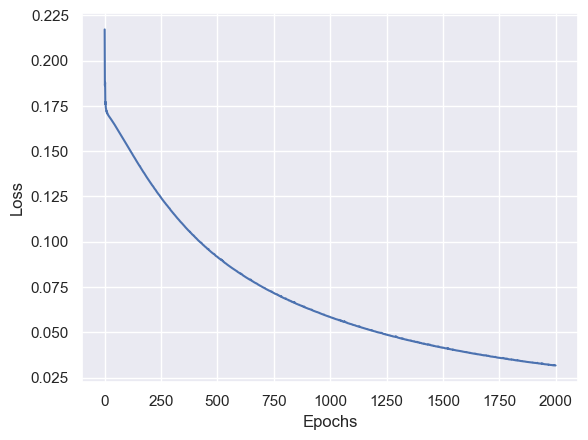

In [178]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

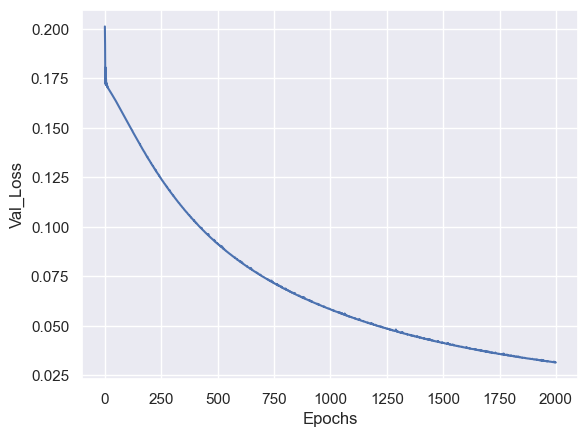

In [179]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [180]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\SIFE-Dwarfs.h5


In [181]:
predSIFE = modelSIFE.predict(X_test)

 1/52 [..............................] - ETA: 3s

52/52 [==============================] - 0s 2ms/step


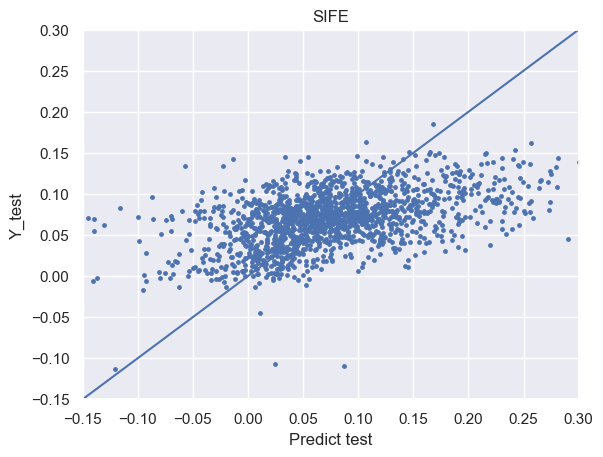

In [182]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [183]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 20.0%


In [184]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [185]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-s24s56_0018245   4980.4740  4.530492  0.251780 -0.006163   
iDR4_3_STRIPE82-0062_0029486  6004.6694  4.271275 -0.134030  0.003117   
iDR4_3_SPLUS-n02s23_0016665   4625.6675  4.588470  0.016982  0.010345   
iDR4_3_MC0007_0170355         5263.0440  4.539022 -0.095235 -0.018563   
iDR4_3_STRIPE82-0069_0040230  5568.1885  4.432549  0.161560 -0.004485   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133   5863.7676  4.238569 -0.040888  0.009044   
iDR4_3_SPLUS-s02s12_0018608   5829.5420  4.448620 -0.260380  0.027761   
iDR4_3_MC0023_0006367         5202.6094  4.502508  0.139140  0.015770   
iDR4_3_STRIPE82-0004_0035258  4751.0854  4.601410 -0.527340  0.269325   
iDR4_3_SPLUS-n02s24_0034796   5195.7160  4.503645  0.224590 -0.016354   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245   0.008195 -0.081793  0.227130  0.078970   
iDR4_3_STRIPE82-0062_0029486 -0.080919  0.017574  0.359490  0.038363   
iDR4_3_SPLUS-n02s23_0016665   0.004263 -0.032570  0.086852  0.050571   
iDR4_3_MC0007_0170355        -0.110443 -0.012167 -0.219973 -0.005095   
iDR4_3_STRIPE82-0069_0040230  0.030763 -0.041434  0.143860  0.040400   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133  -0.019940 -0.095936 -0.186643  0.042435   
iDR4_3_SPLUS-s02s12_0018608  -0.081187 -0.027008  0.333480  0.002580   
iDR4_3_MC0023_0006367        -0.005522 -0.051787  0.124270  0.008400   
iDR4_3_STRIPE82-0004_0035258 -0.281340  0.159986 -0.503040 -0.100790   
iDR4_3_SPLUS-n02s24_0034796  -0.010340 -0.038755  0.138340  0.075040   

                                 MG_FE     SI_FE  alpha_predict  MGFE_predict  \
ID                                                                              
iDR4_3_SPLUS-s24s56_0018245   0.071862  0.051422       0.004460      0.036906   
iDR4_3_STRIPE82-0062_0029486  0.025431  0.078439       0.067877      0.101170   
iDR4_3_SPLUS-n02s23_0016665  -0.018067 -0.010329       0.022909      0.034790   
iDR4_3_MC0007_0170355         0.006520  0.018605       0.052512      0.085424   
iDR4_3_STRIPE82-0069_0040230  0.035464  0.053255      -0.007523      0.006397   
...                                ...       ...            ...           ...   
iDR4_3_SPLUS-n09s40_0048133   0.022663  0.067912      -0.002347      0.024937   
iDR4_3_SPLUS-s02s12_0018608   0.029521  0.090173       0.109095      0.191748   
iDR4_3_MC0023_0006367         0.065302  0.092573      -0.005210      0.042057   
iDR4_3_STRIPE82-0004_0035258  0.322439  0.243093       0.153330      0.192172   
iDR4_3_SPLUS-n02s24_0034796   0.015924 -0.012777       0.020791      0.051204   

                              CFE_predict  CAFE_predict  NFE_predict  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245      0.016389     -0.009201     0.147500   
iDR4_3_STRIPE82-0062_0029486     0.022258      0.062398     0.136079   
iDR4_3_SPLUS-n02s23_0016665     -0.024604      0.002666     0.049242   
iDR4_3_MC0007_0170355           -0.025094      0.027536    -0.027458   
iDR4_3_STRIPE82-0069_0040230    -0.078321     -0.023851     0.148834   
...                                   ...           ...          ...   
iDR4_3_SPLUS-n09s40_0048133     -0.062593     -0.007828     0.084540   
iDR4_3_SPLUS-s02s12_0018608      0.051692      0.089785    -0.036926   
iDR4_3_MC0023_0006367           -0.019490     -0.026609     0.183169   
iDR4_3_STRIPE82-0004_0035258    -0.082251      0.073357    -0.049983   
iDR4_3_SPLUS-n02s24_0034796     -0.009530      0.006594     0.061123   

                              SIFE_predict  
ID                                          
iDR4_3_SPLUS-s24s56_0018245       0.033401  
iDR4_3_STRIPE82-0062_0

In [186]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [213]:
Parametro = "NIFE"
columnTrain = 'NI_FE'

AouG = "Dwarfs"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [214]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-n12s38_0011323   5044.0176  3.803557 -0.304270  0.213575   
iDR4_3_SPLUS-n13s40_0043440   5021.9185  4.515523 -0.149280  0.110855   
iDR4_3_STRIPE82-0057_0002611  5242.5703  3.688048 -0.267080  0.058717   
iDR4_3_STRIPE82-0068_0024385  5845.6064  4.111219  0.013605 -0.008392   
iDR4_3_SPLUS-n02s21_0000716   5489.9004  4.493428 -0.244860  0.199935   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   5228.2944  3.843256  0.205060  0.031281   
iDR4_3_SPLUS-n01s28_0024246   5622.5050  4.352720  0.100910  0.005477   
iDR4_3_SPLUS-s21s10_0017166   5838.3364  4.345857 -0.032488  0.009575   
iDR4_3_STRIPE82-0105_0078578  5238.7300  4.500705 -0.039062  0.050012   
iDR4_3_STRIPE82-0019_0032078  5766.9650  4.399403  0.062936 -0.045140   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n12s38_0011323   0.117850  0.146535 -0.080637  0.109123   
iDR4_3_SPLUS-n13s40_0043440   0.020936  0.076856  0.108240  0.039290   
iDR4_3_STRIPE82-0057_0002611  0.045627  0.098225  0.017821  0.045023   
iDR4_3_STRIPE82-0068_0024385 -0.094493 -0.040798  0.032949  0.066961   
iDR4_3_SPLUS-n02s21_0000716   0.004963  0.171066  0.013075  0.044320   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-s02s04_0040117   0.029564  0.024332  0.169480  0.091833   
iDR4_3_SPLUS-n01s28_0024246  -0.072932  0.036473  0.048428  0.052060   
iDR4_3_SPLUS-s21s10_0017166  -0.042209 -0.017597  0.066795  0.082377   
iDR4_3_STRIPE82-0105_0078578 -0.029282  0.025886 -0.058891  0.003011   
iDR4_3_STRIPE82-0019_0032078 -0.145171 -0.015530 -0.146801 -0.010013   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_SPLUS-n12s38_0011323   0.305723  0.127291  
iDR4_3_SPLUS-n13s40_0043440   0.148676  0.012389  
iDR4_3_STRIPE82-0057_0002611  0.062371 -0.000868  
iDR4_3_STRIPE82-0068_0024385  0.007667  0.031751  
iDR4_3_SPLUS-n02s21_0000716   0.292359  0.185593  
...                                ...       ...  
iDR4_3_SPLUS-s02s04_0040117   0.056680  0.024656  
iDR4_3_SPLUS-n01s28_0024246   0.034755  0.074954  
iDR4_3_SPLUS-s21s10_0017166   0.058901  0.061670  
iDR4_3_STRIPE82-0105_0078578  0.107997  0.095846  
iDR4_3_STRIPE82-0019_0032078 -0.068943  0.049284  

[5907 rows x 10 columns]

In [226]:
modelNIFE = training_model()

In [227]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000


3/3 - 1s - loss: 0.3022 - val_loss: 0.2403 - 695ms/epoch - 232ms/step
Epoch 2/3000
3/3 - 0s - loss: 0.2296 - val_loss: 0.1903 - 57ms/epoch - 19ms/step
Epoch 3/3000
3/3 - 0s - loss: 0.1778 - val_loss: 0.1844 - 56ms/epoch - 19ms/step
Epoch 4/3000
3/3 - 0s - loss: 0.1865 - val_loss: 0.1836 - 54ms/epoch - 18ms/step
Epoch 5/3000
3/3 - 0s - loss: 0.1766 - val_loss: 0.1744 - 57ms/epoch - 19ms/step
Epoch 6/3000
3/3 - 0s - loss: 0.1749 - val_loss: 0.1809 - 54ms/epoch - 18ms/step
Epoch 7/3000
3/3 - 0s - loss: 0.1751 - val_loss: 0.1731 - 54ms/epoch - 18ms/step
Epoch 8/3000
3/3 - 0s - loss: 0.1716 - val_loss: 0.1750 - 52ms/epoch - 17ms/step
Epoch 9/3000
3/3 - 0s - loss: 0.1730 - val_loss: 0.1730 - 53ms/epoch - 18ms/step
Epoch 10/3000
3/3 - 0s - loss: 0.1709 - val_loss: 0.1739 - 56ms/epoch - 19ms/step
Epoch 11/3000
3/3 - 0s - loss: 0.1716 - val_loss: 0.1736 - 59ms/epoch - 20ms/step
Epoch 12/3000
3/3 - 0s - loss: 0.1707 - val_loss: 0.1725 - 53ms/epoch - 18ms/step
Epoch 13/3000
3/3 - 0s - loss: 0.170

Text(0, 0.5, 'Loss')

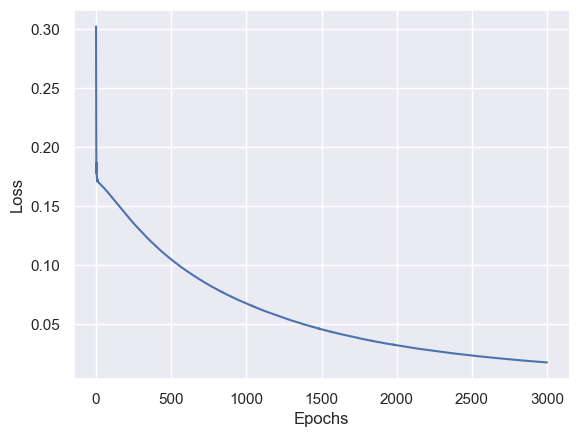

In [228]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

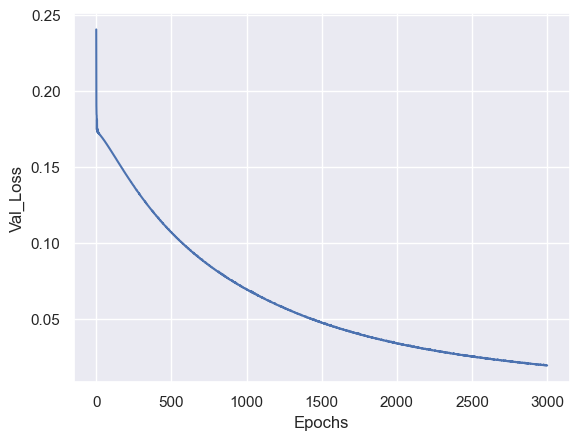

In [229]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [230]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NIFE-Dwarfs.h5


In [231]:
predNIFE = modelNIFE.predict(X_test)

 1/52 [..............................] - ETA: 3s

52/52 [==============================] - 0s 2ms/step


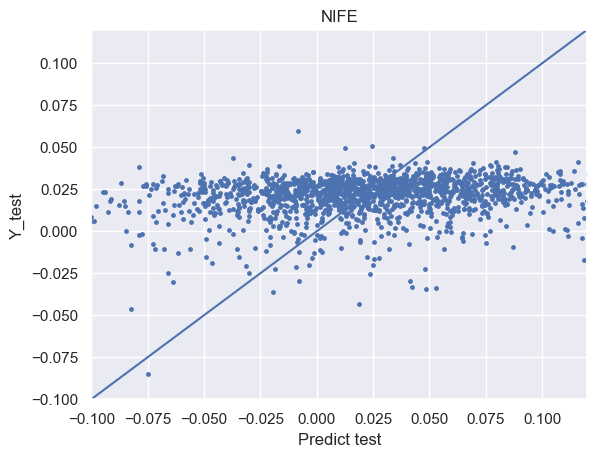

In [232]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [233]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 7.000000000000001%


In [234]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [235]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_SPLUS-s24s56_0018245   4980.4740  4.530492  0.251780 -0.006163   
iDR4_3_STRIPE82-0062_0029486  6004.6694  4.271275 -0.134030  0.003117   
iDR4_3_SPLUS-n02s23_0016665   4625.6675  4.588470  0.016982  0.010345   
iDR4_3_MC0007_0170355         5263.0440  4.539022 -0.095235 -0.018563   
iDR4_3_STRIPE82-0069_0040230  5568.1885  4.432549  0.161560 -0.004485   
...                                 ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133   5863.7676  4.238569 -0.040888  0.009044   
iDR4_3_SPLUS-s02s12_0018608   5829.5420  4.448620 -0.260380  0.027761   
iDR4_3_MC0023_0006367         5202.6094  4.502508  0.139140  0.015770   
iDR4_3_STRIPE82-0004_0035258  4751.0854  4.601410 -0.527340  0.269325   
iDR4_3_SPLUS-n02s24_0034796   5195.7160  4.503645  0.224590 -0.016354   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245   0.008195 -0.081793  0.227130  0.078970   
iDR4_3_STRIPE82-0062_0029486 -0.080919  0.017574  0.359490  0.038363   
iDR4_3_SPLUS-n02s23_0016665   0.004263 -0.032570  0.086852  0.050571   
iDR4_3_MC0007_0170355        -0.110443 -0.012167 -0.219973 -0.005095   
iDR4_3_STRIPE82-0069_0040230  0.030763 -0.041434  0.143860  0.040400   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n09s40_0048133  -0.019940 -0.095936 -0.186643  0.042435   
iDR4_3_SPLUS-s02s12_0018608  -0.081187 -0.027008  0.333480  0.002580   
iDR4_3_MC0023_0006367        -0.005522 -0.051787  0.124270  0.008400   
iDR4_3_STRIPE82-0004_0035258 -0.281340  0.159986 -0.503040 -0.100790   
iDR4_3_SPLUS-n02s24_0034796  -0.010340 -0.038755  0.138340  0.075040   

                                 MG_FE     SI_FE  alpha_predict  MGFE_predict  \
ID                                                                              
iDR4_3_SPLUS-s24s56_0018245   0.071862  0.051422       0.004460      0.036906   
iDR4_3_STRIPE82-0062_0029486  0.025431  0.078439       0.067877      0.101170   
iDR4_3_SPLUS-n02s23_0016665  -0.018067 -0.010329       0.022909      0.034790   
iDR4_3_MC0007_0170355         0.006520  0.018605       0.052512      0.085424   
iDR4_3_STRIPE82-0069_0040230  0.035464  0.053255      -0.007523      0.006397   
...                                ...       ...            ...           ...   
iDR4_3_SPLUS-n09s40_0048133   0.022663  0.067912      -0.002347      0.024937   
iDR4_3_SPLUS-s02s12_0018608   0.029521  0.090173       0.109095      0.191748   
iDR4_3_MC0023_0006367         0.065302  0.092573      -0.005210      0.042057   
iDR4_3_STRIPE82-0004_0035258  0.322439  0.243093       0.153330      0.192172   
iDR4_3_SPLUS-n02s24_0034796   0.015924 -0.012777       0.020791      0.051204   

                              CFE_predict  CAFE_predict  NFE_predict  \
ID                                                                     
iDR4_3_SPLUS-s24s56_0018245      0.016389     -0.009201     0.147500   
iDR4_3_STRIPE82-0062_0029486     0.022258      0.062398     0.136079   
iDR4_3_SPLUS-n02s23_0016665     -0.024604      0.002666     0.049242   
iDR4_3_MC0007_0170355           -0.025094      0.027536    -0.027458   
iDR4_3_STRIPE82-0069_0040230    -0.078321     -0.023851     0.148834   
...                                   ...           ...          ...   
iDR4_3_SPLUS-n09s40_0048133     -0.062593     -0.007828     0.084540   
iDR4_3_SPLUS-s02s12_0018608      0.051692      0.089785    -0.036926   
iDR4_3_MC0023_0006367           -0.019490     -0.026609     0.183169   
iDR4_3_STRIPE82-0004_0035258    -0.082251      0.073357    -0.049983   
iDR4_3_SPLUS-n02s24_0034796     -0.009530      0.006594     0.061123   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_SPLUS-s24s56_0018245       0.033

In [236]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "Apogee"
AouG = "Giants"

Loaded  10 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [5]:
GigCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [6]:
GigCores

u-J378   u-J395   u-J410   u-J430      u-g  \
ID                                                                       
iDR4_3_HYDRA-0049_0000596   0.3074   0.5498   1.1796   1.3742   1.8582   
iDR4_3_HYDRA-0049_0001461   0.3615   0.6254   1.4971   1.7942   2.4759   
iDR4_3_HYDRA-0049_0002887   0.3148   0.6724   1.5170   1.8351   2.4687   
iDR4_3_HYDRA-0049_0006001   0.3616   0.4980   1.2526   1.3976   1.8802   
iDR4_3_HYDRA-0049_0008584   0.2696   0.5493   1.2815   1.4698   1.9949   
...                            ...      ...      ...      ...      ...   
iDR4_3_MC0017_0187268       0.4798   0.4150   1.0088   1.0813   1.5206   
iDR4_3_MC0017_0200426       0.2841   0.5814   1.3231   1.5356   2.1056   
iDR4_3_MC0017_0263197       0.2840   0.5359   1.2381   1.4148   1.9726   
iDR4_3_MC0017_0265033     -14.7788 -14.4817 -13.7642 -13.5903 -13.0533   
iDR4_3_MC0017_0308393       0.0000   0.0000 -18.6954 -18.1728 -16.9877   

                            u-J515      u-r   u-J660      u-i   u-J861  ...  \
ID                                                                      ...   
iDR4_3_HYDRA-0049_0000596   2.0785   2.5476   2.5906   2.7361   2.8224  ...   
iDR4_3_HYDRA-0049_0001461   2.7429   3.3249   3.4138   3.6471   3.7707  ...   
iDR4_3_HYDRA-0049_0002887   2.7243   2.8747   3.0627   3.0795   3.5387  ...   
iDR4_3_HYDRA-0049_0006001   2.1089   2.5600   2.6364   2.7966   2.8818  ...   
iDR4_3_HYDRA-0049_0008584   2.2025   2.6581   2.7179   2.8463   2.9369  ...   
...                            ...      ...      ...      ...      ...  ...   
iDR4_3_MC0017_0187268       1.7033   2.1157   2.1589   2.3561   2.4120  ...   
iDR4_3_MC0017_0200426       2.3035   2.7982   2.8545   3.0315   3.0778  ...   
iDR4_3_MC0017_0263197       2.1656   2.6692   2.7254   2.9046   2.9658  ...   
iDR4_3_MC0017_0265033     -12.9039 -12.3645 -12.2941 -12.1378 -12.0722  ...   
iDR4_3_MC0017_0308393     -16.7200 -15.7949 -15.6278 -15.2594 -15.0870  ...   

                                TEFF      LOGG      FE_H   ALPHA_M      C_FE  \
ID                                                                             
iDR4_3_HYDRA-0049_0000596  4925.5347  3.227409 -0.043532  0.062435  0.014311   
iDR4_3_HYDRA-0049_0001461  4564.2080  1.942220 -0.483310  0.120426 -0.071637   
iDR4_3_HYDRA-0049_0002887  4713.7964  2.410644 -0.033595  0.033650 -0.058968   
iDR4_3_HYDRA-0049_0006001  4872.2485  3.212270 -0.516610  0.281585  0.015661   
iDR4_3_HYDRA-0049_0008584  4976.2046  3.379036 -0.073373  0.072283  0.074867   
...                              ...       ...       ...       ...       ...   
iDR4_3_MC0017_0187268      5002.5303  2.536209 -1.047500  0.262615 -0.182260   
iDR4_3_MC0017_0200426      4870.7485  3.039681 -0.165740  0.039751  0.003725   
iDR4_3_MC0017_0263197      4931.1860  3.321047 -0.163280  0.067895 -0.011979   
iDR4_3_MC0017_0265033      4819.9860  3.344231 -0.105790  0.208435  0.088405   
iDR4_3_MC0017_0308393      4023.3350  0.754406 -0.619210  0.068386 -0.400450   

                              CA_FE      N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                           
iDR4_3_HYDRA-0049_0000596  0.086964  0.104909  0.071667  0.105918  0.062324  
iDR4_3_HYDRA-0049_0001461  0.016022  0.169820  0.006463  0.202743  0.111271  
iDR4_3_HYDRA-0049_0002887  0.014698  0.229277  0.031642  0.067856  0.033970  
iDR4_3_HYDRA-0049_0006001  0.205025  0.041898  0.077583  0.320593  0.189011  
iDR4_3_HYDRA-0049_0008584  0.028343  0.083484  0.105160  0.098650  0.058443  
...                             ...       ...       ...       ...       ...  
iDR4_3_MC0017_0187268      0.075705 -0.062140 -0.079708  0.294043  0.291061  
iDR4_3_MC0017_0200426      0.049061  0.215540  0.087813  0.081824  0.045469  
iDR4_3_MC0017_0263197      0.034997  0.013747 -0.014568  0.126582  0.035904  
iDR4_3_MC0017_0265033      0.173675 -0.041852  0.117115  0.311423  0.179911  
iDR4_3_MC0017_0308393      0.086185  0.242330 -0.068228  0.0

In [ ]:
print('TEFF =', GigCores['TEFF'].min())
print('LOGG = ', GigCores['LOGG'].min())
print('Feh = ', GigCores['FE_H'].min())
print('Alpha = ', GigCores['ALPHA_M'].min())

print('cfe =', GigCores['C_FE'].min())
print('cafe = ', GigCores['CA_FE'].min())
print('nfe = ', GigCores['N_FE'].min())
print('mgfe = ', GigCores['MG_FE'].min())
print('sife = ', GigCores['SI_FE'].min())
print('nife = ', GigCores['NI_FE'].min())

TEFF = 4000.0217
LOGG =  -0.31097874
Feh =  -2.4683
Alpha =  -999.0
cfe = -999.0
cafe =  -999.0
nfe =  -999.0
mgfe =  -999.0
sife =  -999.0
nife =  -999.0


In [7]:
GigCores = GigCores.loc[GigCores['FE_H'] != -999]

In [33]:
GigCores

u-J378   u-J395   u-J410   u-J430      u-g  \
ID                                                                       
iDR4_3_HYDRA-0049_0000596   0.3074   0.5498   1.1796   1.3742   1.8582   
iDR4_3_HYDRA-0049_0001461   0.3615   0.6254   1.4971   1.7942   2.4759   
iDR4_3_HYDRA-0049_0002887   0.3148   0.6724   1.5170   1.8351   2.4687   
iDR4_3_HYDRA-0049_0006001   0.3616   0.4980   1.2526   1.3976   1.8802   
iDR4_3_HYDRA-0049_0008584   0.2696   0.5493   1.2815   1.4698   1.9949   
...                            ...      ...      ...      ...      ...   
iDR4_3_MC0017_0187268       0.4798   0.4150   1.0088   1.0813   1.5206   
iDR4_3_MC0017_0200426       0.2841   0.5814   1.3231   1.5356   2.1056   
iDR4_3_MC0017_0263197       0.2840   0.5359   1.2381   1.4148   1.9726   
iDR4_3_MC0017_0265033     -14.7788 -14.4817 -13.7642 -13.5903 -13.0533   
iDR4_3_MC0017_0308393       0.0000   0.0000 -18.6954 -18.1728 -16.9877   

                            u-J515      u-r   u-J660      u-i   u-J861  ...  \
ID                                                                      ...   
iDR4_3_HYDRA-0049_0000596   2.0785   2.5476   2.5906   2.7361   2.8224  ...   
iDR4_3_HYDRA-0049_0001461   2.7429   3.3249   3.4138   3.6471   3.7707  ...   
iDR4_3_HYDRA-0049_0002887   2.7243   2.8747   3.0627   3.0795   3.5387  ...   
iDR4_3_HYDRA-0049_0006001   2.1089   2.5600   2.6364   2.7966   2.8818  ...   
iDR4_3_HYDRA-0049_0008584   2.2025   2.6581   2.7179   2.8463   2.9369  ...   
...                            ...      ...      ...      ...      ...  ...   
iDR4_3_MC0017_0187268       1.7033   2.1157   2.1589   2.3561   2.4120  ...   
iDR4_3_MC0017_0200426       2.3035   2.7982   2.8545   3.0315   3.0778  ...   
iDR4_3_MC0017_0263197       2.1656   2.6692   2.7254   2.9046   2.9658  ...   
iDR4_3_MC0017_0265033     -12.9039 -12.3645 -12.2941 -12.1378 -12.0722  ...   
iDR4_3_MC0017_0308393     -16.7200 -15.7949 -15.6278 -15.2594 -15.0870  ...   

                                TEFF      LOGG      FE_H   ALPHA_M      C_FE  \
ID                                                                             
iDR4_3_HYDRA-0049_0000596  4925.5347  3.227409 -0.043532  0.062435  0.014311   
iDR4_3_HYDRA-0049_0001461  4564.2080  1.942220 -0.483310  0.120426 -0.071637   
iDR4_3_HYDRA-0049_0002887  4713.7964  2.410644 -0.033595  0.033650 -0.058968   
iDR4_3_HYDRA-0049_0006001  4872.2485  3.212270 -0.516610  0.281585  0.015661   
iDR4_3_HYDRA-0049_0008584  4976.2046  3.379036 -0.073373  0.072283  0.074867   
...                              ...       ...       ...       ...       ...   
iDR4_3_MC0017_0187268      5002.5303  2.536209 -1.047500  0.262615 -0.182260   
iDR4_3_MC0017_0200426      4870.7485  3.039681 -0.165740  0.039751  0.003725   
iDR4_3_MC0017_0263197      4931.1860  3.321047 -0.163280  0.067895 -0.011979   
iDR4_3_MC0017_0265033      4819.9860  3.344231 -0.105790  0.208435  0.088405   
iDR4_3_MC0017_0308393      4023.3350  0.754406 -0.619210  0.068386 -0.400450   

                              CA_FE      N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                           
iDR4_3_HYDRA-0049_0000596  0.086964  0.104909  0.071667  0.105918  0.062324  
iDR4_3_HYDRA-0049_0001461  0.016022  0.169820  0.006463  0.202743  0.111271  
iDR4_3_HYDRA-0049_0002887  0.014698  0.229277  0.031642  0.067856  0.033970  
iDR4_3_HYDRA-0049_0006001  0.205025  0.041898  0.077583  0.320593  0.189011  
iDR4_3_HYDRA-0049_0008584  0.028343  0.083484  0.105160  0.098650  0.058443  
...                             ...       ...       ...       ...       ...  
iDR4_3_MC0017_0187268      0.075705 -0.062140 -0.079708  0.294043  0.291061  
iDR4_3_MC0017_0200426      0.049061  0.215540  0.087813  0.081824  0.045469  
iDR4_3_MC0017_0263197      0.034997  0.013747 -0.014568  0.126582  0.035904  
iDR4_3_MC0017_0265033      0.173675 -0.041852  0.117115  0.311423  0.179911  
iDR4_3_MC0017_0308393      0.086185  0.242330 -0.068228  0.0

In [9]:
xtrain = GigCores.iloc[:, :66]

In [10]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [11]:
ytrain = GigCores[columnYtrain]

In [12]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['TEFF']), 'teffApogee')

In [13]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [14]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [15]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [16]:
Y_train

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0011_0001272         4319.5356  1.342392 -0.856100  0.062581   
iDR4_3_STRIPE82-0123_0039516  4649.2960  2.543290 -0.388340  0.220545   
iDR4_3_STRIPE82-0011_0041456  5033.0400  3.469149  0.026108  0.060209   
iDR4_3_STRIPE82-0070_0022949  5091.2983  3.229876 -0.836660  0.254335   
iDR4_3_MC0083_0009600         4209.4190  1.171373 -0.486830  0.051609   
...                                 ...       ...       ...       ...   
iDR4_3_MC0072_0052148         5629.8120  2.831999 -0.945530  0.101104   
iDR4_3_MC0032_0019460         4031.0698  0.644563 -0.507380 -0.003407   
iDR4_3_SPLUS-n02n44_0036599   4488.3280  1.808348 -0.599030  0.306455   
iDR4_3_SPLUS-s02s16_0040410   4940.4440  3.339081  0.046798  0.024362   
iDR4_3_SPLUS-n04s43_0010935   4966.1885  2.393584 -0.647190  0.288415   

                                  C_FE       CA_FE      N_FE     NI_FE  \
ID                                                                       
iDR4_3_MC0011_0001272        -0.353130    0.103325  0.161100 -0.142107   
iDR4_3_STRIPE82-0123_0039516  0.079670    0.018121  0.106330  0.089763   
iDR4_3_STRIPE82-0011_0041456 -0.133026    0.083939  0.104414 -0.016292   
iDR4_3_STRIPE82-0070_0022949  0.180380    0.243965 -0.248640  0.108982   
iDR4_3_MC0083_0009600        -0.327040    0.125565  0.190990 -0.126518   
...                                ...         ...       ...       ...   
iDR4_3_MC0072_0052148         0.355850 -999.000000  1.557930  0.660870   
iDR4_3_MC0032_0019460        -0.194790    0.006210  0.337170 -0.088748   
iDR4_3_SPLUS-n02n44_0036599   0.055770    0.197875  0.031272  0.017542   
iDR4_3_SPLUS-s02s16_0040410  -0.005047    0.002416  0.154880  0.045575   
iDR4_3_SPLUS-n04s43_0010935   0.060223    0.171275  0.190480  0.085642   

                                 MG_FE     SI_FE  teffEncoded  
ID                                                             
iDR4_3_MC0011_0001272        -0.011377  0.093571    -0.607908  
iDR4_3_STRIPE82-0123_0039516  0.292603  0.189041    -0.203242  
iDR4_3_STRIPE82-0011_0041456  0.091314 -0.019141     0.267670  
iDR4_3_STRIPE82-0070_0022949  0.313693  0.213941     0.339162  
iDR4_3_MC0083_0009600        -0.012221 -0.001634    -0.743038  
...                                ...       ...          ...  
iDR4_3_MC0072_0052148        -0.481381  0.721923     1.000000  
iDR4_3_MC0032_0019460         0.013645 -0.047028    -0.961899  
iDR4_3_SPLUS-n02n44_0036599   0.321433  0.259621    -0.400774  
iDR4_3_SPLUS-s02s16_0040410   0.056591  0.018639     0.154041  
iDR4_3_SPLUS-n04s43_0010935   0.347433  0.246321     0.185633  

[5713 rows x 11 columns]

### Teff

In [19]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [20]:
modelTEFF = training_model()

In [22]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 1000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


6/6 - 0s - loss: 0.2025 - val_loss: 0.2054 - 76ms/epoch - 13ms/step
Epoch 2/2000
6/6 - 0s - loss: 0.2001 - val_loss: 0.2049 - 75ms/epoch - 12ms/step
Epoch 3/2000
6/6 - 0s - loss: 0.1988 - val_loss: 0.2046 - 70ms/epoch - 12ms/step
Epoch 4/2000
6/6 - 0s - loss: 0.1982 - val_loss: 0.2038 - 68ms/epoch - 11ms/step
Epoch 5/2000
6/6 - 0s - loss: 0.1975 - val_loss: 0.2024 - 66ms/epoch - 11ms/step
Epoch 6/2000
6/6 - 0s - loss: 0.1981 - val_loss: 0.2047 - 67ms/epoch - 11ms/step
Epoch 7/2000
6/6 - 0s - loss: 0.1969 - val_loss: 0.2035 - 76ms/epoch - 13ms/step
Epoch 8/2000
6/6 - 0s - loss: 0.1969 - val_loss: 0.2054 - 67ms/epoch - 11ms/step
Epoch 9/2000
6/6 - 0s - loss: 0.1966 - val_loss: 0.2020 - 69ms/epoch - 12ms/step
Epoch 10/2000
6/6 - 0s - loss: 0.1955 - val_loss: 0.2014 - 66ms/epoch - 11ms/step
Epoch 11/2000
6/6 - 0s - loss: 0.1946 - val_loss: 0.2003 - 80ms/epoch - 13ms/step
Epoch 12/2000
6/6 - 0s - loss: 0.1938 - val_loss: 0.2001 - 77ms/epoch - 13ms/step
Epoch 13/2000
6/6 - 0s - loss: 0.1936 

Text(0, 0.5, 'Loss')

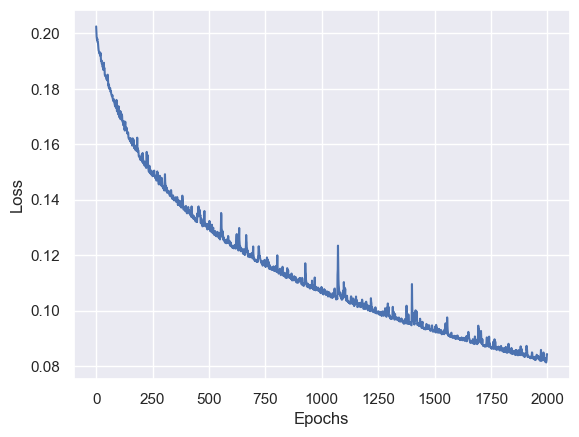

In [23]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

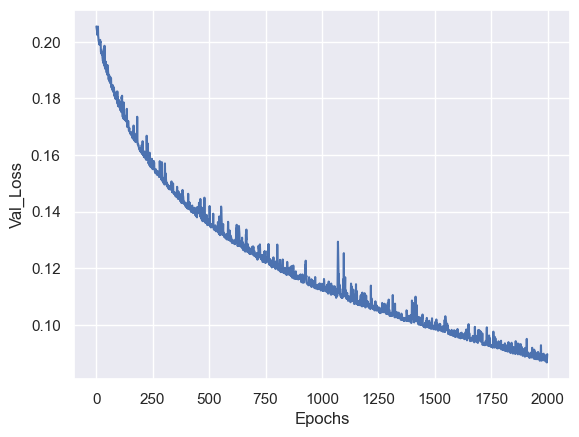

In [24]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [25]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\TEFF-Giants.h5


In [26]:
predTeff = modelTEFF.predict(X_test)

 1/50 [..............................] - ETA: 4s

50/50 [==============================] - 0s 2ms/step


In [27]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   4968.9575  3.499836 -0.13930  0.063180   
iDR4_3_MC0039_0059996         5036.2837  0.958078 -0.33067 -0.090185   
iDR4_3_MC0088_0081306         4241.4050  0.842196 -0.45220 -0.020276   
iDR4_3_STRIPE82-0027_0016524  4898.5264  3.292324 -0.49592  0.234975   
iDR4_3_MC0033_0099212         4021.8293  0.732756 -0.52629  0.047483   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-n01s01_0018751   4933.5410  3.121230 -0.47415  0.304295   
iDR4_3_MC0060_0023070         4163.1875  1.666220 -0.29829  0.248745   
iDR4_3_MC0093_0130092         4045.4524  0.811104 -0.94225  0.069376   
iDR4_3_MC0111_0763000         4080.7253  0.721721 -1.15760 -0.004355   
iDR4_3_SPLUS-n02n44_0028094   4771.5550  2.992883 -0.34244  0.216185   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   0.019801  0.037530 -0.040810  0.082693   
iDR4_3_MC0039_0059996        -0.061500 -0.016914  0.106409 -0.136178   
iDR4_3_MC0088_0081306        -0.224530  0.019515  0.428760 -0.134018   
iDR4_3_STRIPE82-0027_0016524  0.060370  0.125245 -0.049681  0.087313   
iDR4_3_MC0033_0099212        -0.256440  0.071557  0.388420 -0.063528   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s01_0018751   0.022824  0.234555  0.053336  0.156983   
iDR4_3_MC0060_0023070         0.175840  0.104425  0.216290  0.092123   
iDR4_3_MC0093_0130092        -0.428490  0.103165  0.043789 -0.093957   
iDR4_3_MC0111_0763000        -0.667200  0.021940  0.088490 -0.127807   
iDR4_3_SPLUS-n02n44_0028094   0.042474  0.099665  0.152820  0.117993   

                                 MG_FE     SI_FE  teffEncoded  
ID                                                             
iDR4_3_SPLUS-n03s27_0032475   0.070469  0.071169     0.189031  
iDR4_3_MC0039_0059996        -0.247647 -0.135539     0.271651  
iDR4_3_MC0088_0081306        -0.060797 -0.041232    -0.703786  
iDR4_3_STRIPE82-0027_0016524  0.341903  0.219341     0.102602  
iDR4_3_MC0033_0099212         0.066256 -0.040461    -0.973239  
...                                ...       ...          ...  
iDR4_3_SPLUS-n01s01_0018751   0.385843  0.270301     0.145570  
iDR4_3_MC0060_0023070         0.320533  0.192921    -0.799771  
iDR4_3_MC0093_0130092         0.064115  0.031475    -0.944250  
iDR4_3_MC0111_0763000        -0.153357  0.001681    -0.900964  
iDR4_3_SPLUS-n02n44_0028094   0.311713  0.200001    -0.053212  

[1588 rows x 11 columns]

In [28]:
predaux = encoder.decode_DataFrame(predTeff, 'teffApogee')
Y_test['TEFF_PredictDecoded'] = predaux

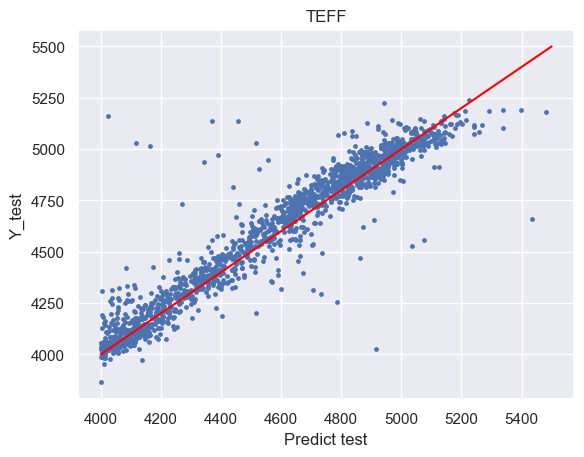

In [34]:
plt.scatter(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 5500], [4000, 5500], c='red')

In [35]:
score = r2_score(Y_test['TEFF'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 91.0%


In [31]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   4968.9575  3.499836 -0.13930  0.063180   
iDR4_3_MC0039_0059996         5036.2837  0.958078 -0.33067 -0.090185   
iDR4_3_MC0088_0081306         4241.4050  0.842196 -0.45220 -0.020276   
iDR4_3_STRIPE82-0027_0016524  4898.5264  3.292324 -0.49592  0.234975   
iDR4_3_MC0033_0099212         4021.8293  0.732756 -0.52629  0.047483   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-n01s01_0018751   4933.5410  3.121230 -0.47415  0.304295   
iDR4_3_MC0060_0023070         4163.1875  1.666220 -0.29829  0.248745   
iDR4_3_MC0093_0130092         4045.4524  0.811104 -0.94225  0.069376   
iDR4_3_MC0111_0763000         4080.7253  0.721721 -1.15760 -0.004355   
iDR4_3_SPLUS-n02n44_0028094   4771.5550  2.992883 -0.34244  0.216185   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   0.019801  0.037530 -0.040810  0.082693   
iDR4_3_MC0039_0059996        -0.061500 -0.016914  0.106409 -0.136178   
iDR4_3_MC0088_0081306        -0.224530  0.019515  0.428760 -0.134018   
iDR4_3_STRIPE82-0027_0016524  0.060370  0.125245 -0.049681  0.087313   
iDR4_3_MC0033_0099212        -0.256440  0.071557  0.388420 -0.063528   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s01_0018751   0.022824  0.234555  0.053336  0.156983   
iDR4_3_MC0060_0023070         0.175840  0.104425  0.216290  0.092123   
iDR4_3_MC0093_0130092        -0.428490  0.103165  0.043789 -0.093957   
iDR4_3_MC0111_0763000        -0.667200  0.021940  0.088490 -0.127807   
iDR4_3_SPLUS-n02n44_0028094   0.042474  0.099665  0.152820  0.117993   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n03s27_0032475   0.070469  0.071169     0.189031   
iDR4_3_MC0039_0059996        -0.247647 -0.135539     0.271651   
iDR4_3_MC0088_0081306        -0.060797 -0.041232    -0.703786   
iDR4_3_STRIPE82-0027_0016524  0.341903  0.219341     0.102602   
iDR4_3_MC0033_0099212         0.066256 -0.040461    -0.973239   
...                                ...       ...          ...   
iDR4_3_SPLUS-n01s01_0018751   0.385843  0.270301     0.145570   
iDR4_3_MC0060_0023070         0.320533  0.192921    -0.799771   
iDR4_3_MC0093_0130092         0.064115  0.031475    -0.944250   
iDR4_3_MC0111_0763000        -0.153357  0.001681    -0.900964   
iDR4_3_SPLUS-n02n44_0028094   0.311713  0.200001    -0.053212   

                              TEFF_PredictDecoded  
ID                                                 
iDR4_3_SPLUS-n03s27_0032475           5003.213379  
iDR4_3_MC0039_0059996                 4528.732910  
iDR4_3_MC0088_0081306                 4137.070801  
iDR4_3_STRIPE82-0027_0016524          5005.658691  
iDR4_3_MC0033_0099212                 4028.702393  
...                                           ...  
iDR4_3_SPLUS-n01s01_0018751           4960.408203  
iDR4_3_MC0060_0023070                 5017.309082  
iDR4_3_MC0093_0130092                 4084.765625  
iDR4_3_MC0111_0763000                 4194.911133  
iDR4_3_SPLUS-n02n44_0028094           4954.582520  

[1588 rows x 12 columns]

In [32]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [36]:
Parametro = "LOGG"
columnTrain = 'LOGG'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [37]:
modelLOGG = training_model()

In [38]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 3.4317 - val_loss: 1.5404 - 603ms/epoch - 301ms/step
Epoch 2/2000
2/2 - 0s - loss: 1.3413 - val_loss: 1.0467 - 70ms/epoch - 35ms/step
Epoch 3/2000
2/2 - 0s - loss: 1.0334 - val_loss: 1.2829 - 68ms/epoch - 34ms/step
Epoch 4/2000
2/2 - 0s - loss: 1.2183 - val_loss: 1.3211 - 74ms/epoch - 37ms/step
Epoch 5/2000
2/2 - 0s - loss: 1.1889 - val_loss: 1.1447 - 57ms/epoch - 29ms/step
Epoch 6/2000
2/2 - 0s - loss: 1.0276 - val_loss: 0.9931 - 56ms/epoch - 28ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.9324 - val_loss: 0.9748 - 52ms/epoch - 26ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.9642 - val_loss: 1.0111 - 50ms/epoch - 25ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.9997 - val_loss: 0.9896 - 55ms/epoch - 28ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.9620 - val_loss: 0.9401 - 55ms/epoch - 28ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.9062 - val_loss: 0.9267 - 53ms/epoch - 27ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.8878 - val_loss: 0.9543 - 54ms/epoch - 27ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.905

Text(0, 0.5, 'Loss')

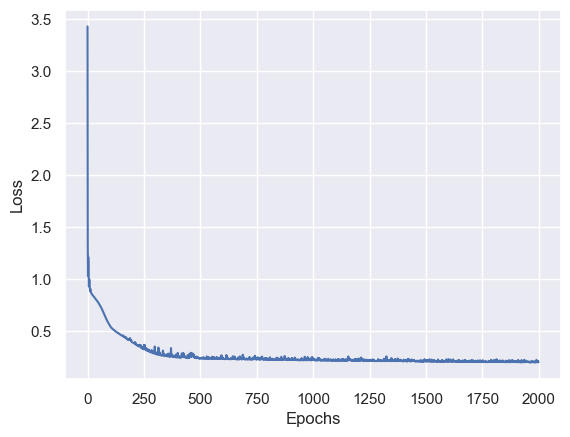

In [39]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

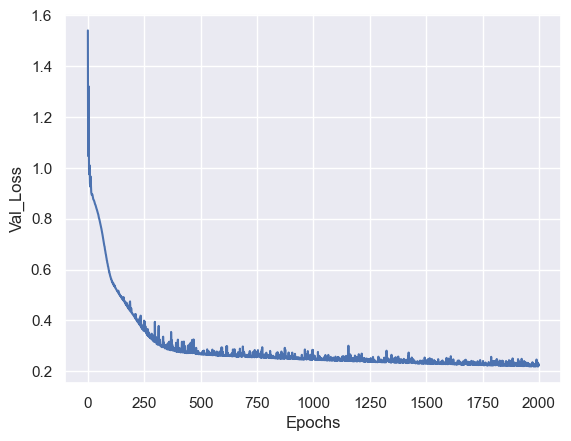

In [40]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [41]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\LOGG-Giants.h5


In [42]:
predlogg = modelLOGG.predict(X_test)

19/50 [==========>...................] - ETA: 0s

50/50 [==============================] - 0s 2ms/step


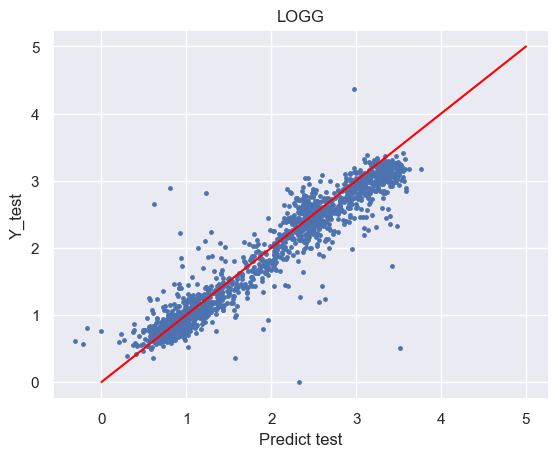

In [43]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

In [44]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [45]:
Y_test['LOGG_Predict'] = predlogg

In [46]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   4968.9575  3.499836 -0.13930  0.063180   
iDR4_3_MC0039_0059996         5036.2837  0.958078 -0.33067 -0.090185   
iDR4_3_MC0088_0081306         4241.4050  0.842196 -0.45220 -0.020276   
iDR4_3_STRIPE82-0027_0016524  4898.5264  3.292324 -0.49592  0.234975   
iDR4_3_MC0033_0099212         4021.8293  0.732756 -0.52629  0.047483   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-n01s01_0018751   4933.5410  3.121230 -0.47415  0.304295   
iDR4_3_MC0060_0023070         4163.1875  1.666220 -0.29829  0.248745   
iDR4_3_MC0093_0130092         4045.4524  0.811104 -0.94225  0.069376   
iDR4_3_MC0111_0763000         4080.7253  0.721721 -1.15760 -0.004355   
iDR4_3_SPLUS-n02n44_0028094   4771.5550  2.992883 -0.34244  0.216185   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   0.019801  0.037530 -0.040810  0.082693   
iDR4_3_MC0039_0059996        -0.061500 -0.016914  0.106409 -0.136178   
iDR4_3_MC0088_0081306        -0.224530  0.019515  0.428760 -0.134018   
iDR4_3_STRIPE82-0027_0016524  0.060370  0.125245 -0.049681  0.087313   
iDR4_3_MC0033_0099212        -0.256440  0.071557  0.388420 -0.063528   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s01_0018751   0.022824  0.234555  0.053336  0.156983   
iDR4_3_MC0060_0023070         0.175840  0.104425  0.216290  0.092123   
iDR4_3_MC0093_0130092        -0.428490  0.103165  0.043789 -0.093957   
iDR4_3_MC0111_0763000        -0.667200  0.021940  0.088490 -0.127807   
iDR4_3_SPLUS-n02n44_0028094   0.042474  0.099665  0.152820  0.117993   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n03s27_0032475   0.070469  0.071169     0.189031   
iDR4_3_MC0039_0059996        -0.247647 -0.135539     0.271651   
iDR4_3_MC0088_0081306        -0.060797 -0.041232    -0.703786   
iDR4_3_STRIPE82-0027_0016524  0.341903  0.219341     0.102602   
iDR4_3_MC0033_0099212         0.066256 -0.040461    -0.973239   
...                                ...       ...          ...   
iDR4_3_SPLUS-n01s01_0018751   0.385843  0.270301     0.145570   
iDR4_3_MC0060_0023070         0.320533  0.192921    -0.799771   
iDR4_3_MC0093_0130092         0.064115  0.031475    -0.944250   
iDR4_3_MC0111_0763000        -0.153357  0.001681    -0.900964   
iDR4_3_SPLUS-n02n44_0028094   0.311713  0.200001    -0.053212   

                              TEFF_PredictDecoded  LOGG_Predict  
ID                                                               
iDR4_3_SPLUS-n03s27_0032475           5003.213379      3.159288  
iDR4_3_MC0039_0059996                 4528.732910      0.921509  
iDR4_3_MC0088_0081306                 4137.070801      0.784163  
iDR4_3_STRIPE82-0027_0016524          5005.658691      3.018464  
iDR4_3_MC0033_0099212                 4028.702393      0.646658  
...                                           ...           ...  
iDR4_3_SPLUS-n01s01_0018751           4960.408203      2.964861  
iDR4_3_MC0060_0023070                 5017.309082      1.868831  
iDR4_3_MC0093_0130092                 4084.765625      0.839305  
iDR4_3_MC0111_0763000                 4194.911133      1.116265  
iDR4_3_SPLUS-n02n44_0028094           4954.582520      3.117557  

[1588 rows x 13 columns]

In [47]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [63]:
Parametro = "FEH"
columnTrain = 'FE_H'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [64]:
modelFEH = training_model()

In [65]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000


2/2 - 1s - loss: 0.5934 - val_loss: 0.4942 - 593ms/epoch - 296ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.4957 - val_loss: 0.4226 - 57ms/epoch - 29ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.4237 - val_loss: 0.4150 - 49ms/epoch - 25ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.4347 - val_loss: 0.4174 - 44ms/epoch - 22ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.4202 - val_loss: 0.3801 - 45ms/epoch - 23ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.3956 - val_loss: 0.3970 - 47ms/epoch - 23ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.4119 - val_loss: 0.3977 - 46ms/epoch - 23ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.4043 - val_loss: 0.3799 - 46ms/epoch - 23ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.3927 - val_loss: 0.3856 - 44ms/epoch - 22ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.3987 - val_loss: 0.3833 - 47ms/epoch - 24ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.3936 - val_loss: 0.3761 - 47ms/epoch - 23ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.3894 - val_loss: 0.3806 - 64ms/epoch - 32ms/step
Epoch 13/3000
2/2 - 0s - loss: 0.392

Text(0, 0.5, 'Loss')

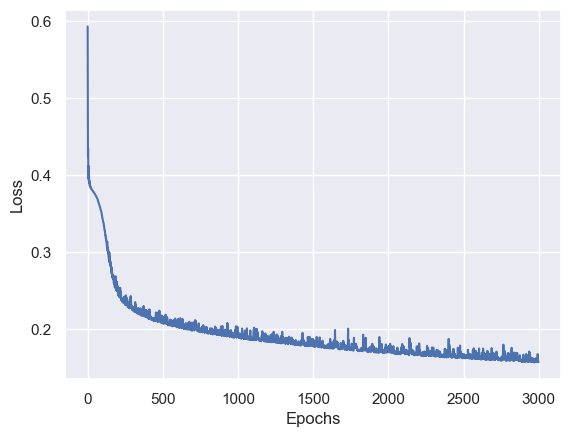

In [66]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

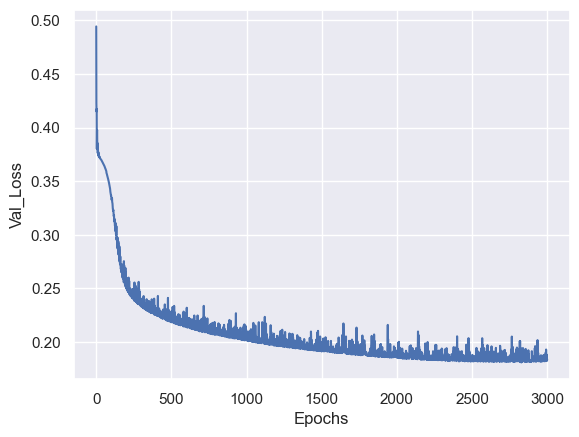

In [67]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [53]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\FEH-Giants.h5


In [68]:
predfeh = modelFEH.predict(X_test)

50/50 [==============================] - 0s 5ms/step


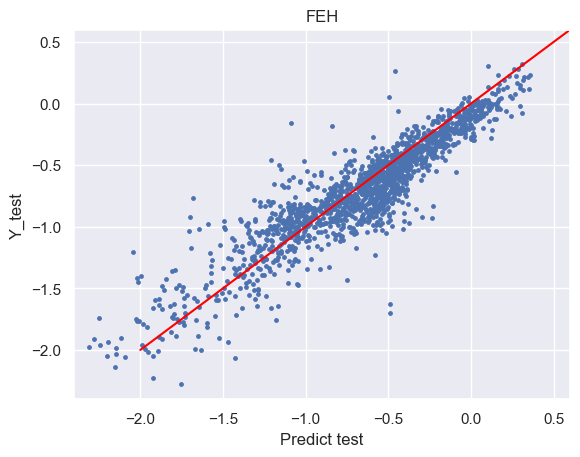

In [69]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-2.4, 0.6)
plt.ylim(-2.4, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [70]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 65.0%


In [57]:
Y_test['FEH_Predict'] = predfeh

In [58]:
Y_test

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   4968.9575  3.499836 -0.13930  0.063180   
iDR4_3_MC0039_0059996         5036.2837  0.958078 -0.33067 -0.090185   
iDR4_3_MC0088_0081306         4241.4050  0.842196 -0.45220 -0.020276   
iDR4_3_STRIPE82-0027_0016524  4898.5264  3.292324 -0.49592  0.234975   
iDR4_3_MC0033_0099212         4021.8293  0.732756 -0.52629  0.047483   
...                                 ...       ...      ...       ...   
iDR4_3_SPLUS-n01s01_0018751   4933.5410  3.121230 -0.47415  0.304295   
iDR4_3_MC0060_0023070         4163.1875  1.666220 -0.29829  0.248745   
iDR4_3_MC0093_0130092         4045.4524  0.811104 -0.94225  0.069376   
iDR4_3_MC0111_0763000         4080.7253  0.721721 -1.15760 -0.004355   
iDR4_3_SPLUS-n02n44_0028094   4771.5550  2.992883 -0.34244  0.216185   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_SPLUS-n03s27_0032475   0.019801  0.037530 -0.040810  0.082693   
iDR4_3_MC0039_0059996        -0.061500 -0.016914  0.106409 -0.136178   
iDR4_3_MC0088_0081306        -0.224530  0.019515  0.428760 -0.134018   
iDR4_3_STRIPE82-0027_0016524  0.060370  0.125245 -0.049681  0.087313   
iDR4_3_MC0033_0099212        -0.256440  0.071557  0.388420 -0.063528   
...                                ...       ...       ...       ...   
iDR4_3_SPLUS-n01s01_0018751   0.022824  0.234555  0.053336  0.156983   
iDR4_3_MC0060_0023070         0.175840  0.104425  0.216290  0.092123   
iDR4_3_MC0093_0130092        -0.428490  0.103165  0.043789 -0.093957   
iDR4_3_MC0111_0763000        -0.667200  0.021940  0.088490 -0.127807   
iDR4_3_SPLUS-n02n44_0028094   0.042474  0.099665  0.152820  0.117993   

                                 MG_FE     SI_FE  teffEncoded  \
ID                                                              
iDR4_3_SPLUS-n03s27_0032475   0.070469  0.071169     0.189031   
iDR4_3_MC0039_0059996        -0.247647 -0.135539     0.271651   
iDR4_3_MC0088_0081306        -0.060797 -0.041232    -0.703786   
iDR4_3_STRIPE82-0027_0016524  0.341903  0.219341     0.102602   
iDR4_3_MC0033_0099212         0.066256 -0.040461    -0.973239   
...                                ...       ...          ...   
iDR4_3_SPLUS-n01s01_0018751   0.385843  0.270301     0.145570   
iDR4_3_MC0060_0023070         0.320533  0.192921    -0.799771   
iDR4_3_MC0093_0130092         0.064115  0.031475    -0.944250   
iDR4_3_MC0111_0763000        -0.153357  0.001681    -0.900964   
iDR4_3_SPLUS-n02n44_0028094   0.311713  0.200001    -0.053212   

                              TEFF_PredictDecoded  LOGG_Predict  FEH_Predict  
ID                                                                            
iDR4_3_SPLUS-n03s27_0032475           5003.213379      3.159288    -0.274027  
iDR4_3_MC0039_0059996                 4528.732910      0.921509    -0.790958  
iDR4_3_MC0088_0081306                 4137.070801      0.784163    -0.715311  
iDR4_3_STRIPE82-0027_0016524          5005.658691      3.018464    -0.494252  
iDR4_3_MC0033_0099212                 4028.702393      0.646658    -0.836858  
...                                           ...           ...          ...  
iDR4_3_SPLUS-n01s01_0018751           4960.408203      2.964861    -0.459424  
iDR4_3_MC0060_0023070                 5017.309082      1.868831    -0.926725  
iDR4_3_MC0093_0130092                 4084.765625      0.839305    -0.910849  
iDR4_3_MC0111_0763000                 4194.911133      1.116265    -0.777436  
iDR4_3_SPLUS-n02n44_0028094           4954.582520      3.117557    -0.216434  

[1588 rows x 14 columns]

In [59]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros Parametros

In [4]:
GigCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [5]:
GigCores

u-J378   u-J395   u-J410   u-J430      u-g  \
ID                                                                       
iDR4_3_HYDRA-0049_0000596   0.3074   0.5498   1.1796   1.3742   1.8582   
iDR4_3_HYDRA-0049_0001461   0.3615   0.6254   1.4971   1.7942   2.4759   
iDR4_3_HYDRA-0049_0002887   0.3148   0.6724   1.5170   1.8351   2.4687   
iDR4_3_HYDRA-0049_0006001   0.3616   0.4980   1.2526   1.3976   1.8802   
iDR4_3_HYDRA-0049_0008584   0.2696   0.5493   1.2815   1.4698   1.9949   
...                            ...      ...      ...      ...      ...   
iDR4_3_MC0017_0187268       0.4798   0.4150   1.0088   1.0813   1.5206   
iDR4_3_MC0017_0200426       0.2841   0.5814   1.3231   1.5356   2.1056   
iDR4_3_MC0017_0263197       0.2840   0.5359   1.2381   1.4148   1.9726   
iDR4_3_MC0017_0265033     -14.7788 -14.4817 -13.7642 -13.5903 -13.0533   
iDR4_3_MC0017_0308393       0.0000   0.0000 -18.6954 -18.1728 -16.9877   

                            u-J515      u-r   u-J660      u-i   u-J861  ...  \
ID                                                                      ...   
iDR4_3_HYDRA-0049_0000596   2.0785   2.5476   2.5906   2.7361   2.8224  ...   
iDR4_3_HYDRA-0049_0001461   2.7429   3.3249   3.4138   3.6471   3.7707  ...   
iDR4_3_HYDRA-0049_0002887   2.7243   2.8747   3.0627   3.0795   3.5387  ...   
iDR4_3_HYDRA-0049_0006001   2.1089   2.5600   2.6364   2.7966   2.8818  ...   
iDR4_3_HYDRA-0049_0008584   2.2025   2.6581   2.7179   2.8463   2.9369  ...   
...                            ...      ...      ...      ...      ...  ...   
iDR4_3_MC0017_0187268       1.7033   2.1157   2.1589   2.3561   2.4120  ...   
iDR4_3_MC0017_0200426       2.3035   2.7982   2.8545   3.0315   3.0778  ...   
iDR4_3_MC0017_0263197       2.1656   2.6692   2.7254   2.9046   2.9658  ...   
iDR4_3_MC0017_0265033     -12.9039 -12.3645 -12.2941 -12.1378 -12.0722  ...   
iDR4_3_MC0017_0308393     -16.7200 -15.7949 -15.6278 -15.2594 -15.0870  ...   

                                TEFF      LOGG      FE_H   ALPHA_M      C_FE  \
ID                                                                             
iDR4_3_HYDRA-0049_0000596  4925.5347  3.227409 -0.043532  0.062435  0.014311   
iDR4_3_HYDRA-0049_0001461  4564.2080  1.942220 -0.483310  0.120426 -0.071637   
iDR4_3_HYDRA-0049_0002887  4713.7964  2.410644 -0.033595  0.033650 -0.058968   
iDR4_3_HYDRA-0049_0006001  4872.2485  3.212270 -0.516610  0.281585  0.015661   
iDR4_3_HYDRA-0049_0008584  4976.2046  3.379036 -0.073373  0.072283  0.074867   
...                              ...       ...       ...       ...       ...   
iDR4_3_MC0017_0187268      5002.5303  2.536209 -1.047500  0.262615 -0.182260   
iDR4_3_MC0017_0200426      4870.7485  3.039681 -0.165740  0.039751  0.003725   
iDR4_3_MC0017_0263197      4931.1860  3.321047 -0.163280  0.067895 -0.011979   
iDR4_3_MC0017_0265033      4819.9860  3.344231 -0.105790  0.208435  0.088405   
iDR4_3_MC0017_0308393      4023.3350  0.754406 -0.619210  0.068386 -0.400450   

                              CA_FE      N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                           
iDR4_3_HYDRA-0049_0000596  0.086964  0.104909  0.071667  0.105918  0.062324  
iDR4_3_HYDRA-0049_0001461  0.016022  0.169820  0.006463  0.202743  0.111271  
iDR4_3_HYDRA-0049_0002887  0.014698  0.229277  0.031642  0.067856  0.033970  
iDR4_3_HYDRA-0049_0006001  0.205025  0.041898  0.077583  0.320593  0.189011  
iDR4_3_HYDRA-0049_0008584  0.028343  0.083484  0.105160  0.098650  0.058443  
...                             ...       ...       ...       ...       ...  
iDR4_3_MC0017_0187268      0.075705 -0.062140 -0.079708  0.294043  0.291061  
iDR4_3_MC0017_0200426      0.049061  0.215540  0.087813  0.081824  0.045469  
iDR4_3_MC0017_0263197      0.034997  0.013747 -0.014568  0.126582  0.035904  
iDR4_3_MC0017_0265033      0.173675 -0.041852  0.117115  0.311423  0.179911  
iDR4_3_MC0017_0308393      0.086185  0.242330 -0.068228  0.0

In [6]:
print('TEFF =', GigCores['TEFF'].min())
print('LOGG = ', GigCores['LOGG'].min())
print('Feh = ', GigCores['FE_H'].min())
print('Alpha = ', GigCores['ALPHA_M'].min())

print('cfe =', GigCores['C_FE'].min())
print('cafe = ', GigCores['CA_FE'].min())
print('nfe = ', GigCores['N_FE'].min())
print('mgfe = ', GigCores['MG_FE'].min())
print('sife = ', GigCores['SI_FE'].min())
print('nife = ', GigCores['NI_FE'].min())

TEFF = 4000.0217
LOGG =  -0.31097874
Feh =  -999.0
Alpha =  -999.0
cfe = -999.0
cafe =  -999.0
nfe =  -999.0
mgfe =  -999.0
sife =  -999.0
nife =  -999.0


In [7]:
GigCoresParams = GigCores.loc[(GigCores['ALPHA_M'] != -999) & (GigCores['C_FE'] != -999) &
                                (GigCores['CA_FE'] != -999) & (GigCores['N_FE'] != -999) &
                                (GigCores['SI_FE'] != -999) & (GigCores['NI_FE'] != -999) & (GigCores['MG_FE'] != -999)]

In [8]:
GigCoresParams

u-J378   u-J395   u-J410   u-J430      u-g  \
ID                                                                       
iDR4_3_HYDRA-0049_0000596   0.3074   0.5498   1.1796   1.3742   1.8582   
iDR4_3_HYDRA-0049_0001461   0.3615   0.6254   1.4971   1.7942   2.4759   
iDR4_3_HYDRA-0049_0002887   0.3148   0.6724   1.5170   1.8351   2.4687   
iDR4_3_HYDRA-0049_0006001   0.3616   0.4980   1.2526   1.3976   1.8802   
iDR4_3_HYDRA-0049_0008584   0.2696   0.5493   1.2815   1.4698   1.9949   
...                            ...      ...      ...      ...      ...   
iDR4_3_MC0017_0187268       0.4798   0.4150   1.0088   1.0813   1.5206   
iDR4_3_MC0017_0200426       0.2841   0.5814   1.3231   1.5356   2.1056   
iDR4_3_MC0017_0263197       0.2840   0.5359   1.2381   1.4148   1.9726   
iDR4_3_MC0017_0265033     -14.7788 -14.4817 -13.7642 -13.5903 -13.0533   
iDR4_3_MC0017_0308393       0.0000   0.0000 -18.6954 -18.1728 -16.9877   

                            u-J515      u-r   u-J660      u-i   u-J861  ...  \
ID                                                                      ...   
iDR4_3_HYDRA-0049_0000596   2.0785   2.5476   2.5906   2.7361   2.8224  ...   
iDR4_3_HYDRA-0049_0001461   2.7429   3.3249   3.4138   3.6471   3.7707  ...   
iDR4_3_HYDRA-0049_0002887   2.7243   2.8747   3.0627   3.0795   3.5387  ...   
iDR4_3_HYDRA-0049_0006001   2.1089   2.5600   2.6364   2.7966   2.8818  ...   
iDR4_3_HYDRA-0049_0008584   2.2025   2.6581   2.7179   2.8463   2.9369  ...   
...                            ...      ...      ...      ...      ...  ...   
iDR4_3_MC0017_0187268       1.7033   2.1157   2.1589   2.3561   2.4120  ...   
iDR4_3_MC0017_0200426       2.3035   2.7982   2.8545   3.0315   3.0778  ...   
iDR4_3_MC0017_0263197       2.1656   2.6692   2.7254   2.9046   2.9658  ...   
iDR4_3_MC0017_0265033     -12.9039 -12.3645 -12.2941 -12.1378 -12.0722  ...   
iDR4_3_MC0017_0308393     -16.7200 -15.7949 -15.6278 -15.2594 -15.0870  ...   

                                TEFF      LOGG      FE_H   ALPHA_M      C_FE  \
ID                                                                             
iDR4_3_HYDRA-0049_0000596  4925.5347  3.227409 -0.043532  0.062435  0.014311   
iDR4_3_HYDRA-0049_0001461  4564.2080  1.942220 -0.483310  0.120426 -0.071637   
iDR4_3_HYDRA-0049_0002887  4713.7964  2.410644 -0.033595  0.033650 -0.058968   
iDR4_3_HYDRA-0049_0006001  4872.2485  3.212270 -0.516610  0.281585  0.015661   
iDR4_3_HYDRA-0049_0008584  4976.2046  3.379036 -0.073373  0.072283  0.074867   
...                              ...       ...       ...       ...       ...   
iDR4_3_MC0017_0187268      5002.5303  2.536209 -1.047500  0.262615 -0.182260   
iDR4_3_MC0017_0200426      4870.7485  3.039681 -0.165740  0.039751  0.003725   
iDR4_3_MC0017_0263197      4931.1860  3.321047 -0.163280  0.067895 -0.011979   
iDR4_3_MC0017_0265033      4819.9860  3.344231 -0.105790  0.208435  0.088405   
iDR4_3_MC0017_0308393      4023.3350  0.754406 -0.619210  0.068386 -0.400450   

                              CA_FE      N_FE     NI_FE     MG_FE     SI_FE  
ID                                                                           
iDR4_3_HYDRA-0049_0000596  0.086964  0.104909  0.071667  0.105918  0.062324  
iDR4_3_HYDRA-0049_0001461  0.016022  0.169820  0.006463  0.202743  0.111271  
iDR4_3_HYDRA-0049_0002887  0.014698  0.229277  0.031642  0.067856  0.033970  
iDR4_3_HYDRA-0049_0006001  0.205025  0.041898  0.077583  0.320593  0.189011  
iDR4_3_HYDRA-0049_0008584  0.028343  0.083484  0.105160  0.098650  0.058443  
...                             ...       ...       ...       ...       ...  
iDR4_3_MC0017_0187268      0.075705 -0.062140 -0.079708  0.294043  0.291061  
iDR4_3_MC0017_0200426      0.049061  0.215540  0.087813  0.081824  0.045469  
iDR4_3_MC0017_0263197      0.034997  0.013747 -0.014568  0.126582  0.035904  
iDR4_3_MC0017_0265033      0.173675 -0.041852  0.117115  0.311423  0.179911  
iDR4_3_MC0017_0308393      0.086185  0.242330 -0.068228  0.0

In [9]:
print('TEFF =', GigCoresParams['TEFF'].min())
print('LOGG = ', GigCoresParams['LOGG'].min())
print('Feh = ', GigCoresParams['FE_H'].min())
print('Alpha = ', GigCoresParams['ALPHA_M'].min())

print('cfe =', GigCoresParams['C_FE'].min())
print('cafe = ', GigCoresParams['CA_FE'].min())
print('nfe = ', GigCoresParams['N_FE'].min())
print('mgfe = ', GigCoresParams['MG_FE'].min())
print('sife = ', GigCoresParams['SI_FE'].min())
print('nife = ', GigCoresParams['NI_FE'].min())

TEFF = 4000.0217
LOGG =  -0.21539986
Feh =  -2.4356
Alpha =  -0.48023504
cfe = -1.4734998
cafe =  -0.8577949
nfe =  -0.57474995
mgfe =  -0.66619706
sife =  -0.7668494
nife =  -1.0026077


In [10]:
xtrain = GigCoresParams.iloc[:, :66]

In [11]:
columnYtrain =  ['TEFF', 'LOGG', 'FE_H', 'ALPHA_M', 
                 'C_FE', 'CA_FE', 'N_FE', 
                 'NI_FE', 'MG_FE', 'SI_FE']

In [12]:
ytrain = GigCoresParams[columnYtrain]

In [13]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [14]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [15]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [16]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0032_0004448         4202.3440  0.858002 -0.49416  0.000764   
iDR4_3_MC0030_0015715         4009.8042  0.616374 -0.45636  0.004866   
iDR4_3_STRIPE82-0113_0027582  4934.6710  2.540745 -0.56147  0.244835   
iDR4_3_MC0028_0038972         4149.8115  0.579854 -1.72440  0.069962   
iDR4_3_SPLUS-n05n53_0023711   4844.7010  2.245942 -0.61307  0.276105   
...                                 ...       ...      ...       ...   
iDR4_3_MC0094_0295237         4024.6511  0.699362 -0.98230  0.044358   
iDR4_3_MC0029_0116275         4683.8720  2.478323 -0.59773  0.290535   
iDR4_3_MC0111_0034158         4068.8994  0.912623 -0.51736  0.059888   
iDR4_3_MC0023_0012692         4782.7860  1.451852 -0.49264  0.011864   
iDR4_3_MC0040_0069713         4213.5303  0.869180 -0.40565 -0.021772   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0032_0004448        -0.257860  0.058285  0.312360 -0.105908   
iDR4_3_MC0030_0015715        -0.219980  0.036665  0.347730 -0.104758   
iDR4_3_STRIPE82-0113_0027582  0.088700  0.109975  0.102057  0.034702   
iDR4_3_MC0028_0038972        -0.745440  0.119325  0.439650 -0.021507   
iDR4_3_SPLUS-n05n53_0023711   0.098834  0.170295  0.155890  0.098482   
...                                ...       ...       ...       ...   
iDR4_3_MC0094_0295237        -0.463780  0.068395  0.167940 -0.063107   
iDR4_3_MC0029_0116275         0.048376  0.212645 -0.014927  0.104812   
iDR4_3_MC0111_0034158        -0.252870  0.049504  0.159790 -0.087378   
iDR4_3_MC0023_0012692        -0.011099  0.119685  0.127748 -0.114368   
iDR4_3_MC0040_0069713        -0.214050  0.036884  0.346050 -0.134848   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0032_0004448        -0.007082 -0.063469  
iDR4_3_MC0030_0015715         0.020392 -0.008509  
iDR4_3_STRIPE82-0113_0027582  0.291873  0.175241  
iDR4_3_MC0028_0038972        -0.001911  0.064221  
iDR4_3_SPLUS-n05n53_0023711   0.339933  0.265781  
...                                ...       ...  
iDR4_3_MC0094_0295237        -0.024579  0.036137  
iDR4_3_MC0029_0116275         0.345753  0.275181  
iDR4_3_MC0111_0034158         0.070421  0.056802  
iDR4_3_MC0023_0012692        -0.035687  0.000441  
iDR4_3_MC0040_0069713        -0.034597 -0.010885  

[5599 rows x 10 columns]

### Alpha

In [59]:
Parametro = "Alpha"
columnTrain = 'ALPHA_M'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [60]:
modelAlpha = training_model()

In [61]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 0.3383 - val_loss: 0.2779 - 660ms/epoch - 330ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.2669 - val_loss: 0.2156 - 79ms/epoch - 40ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.2198 - val_loss: 0.2358 - 80ms/epoch - 40ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.2280 - val_loss: 0.1903 - 67ms/epoch - 34ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1864 - val_loss: 0.1902 - 76ms/epoch - 38ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1984 - val_loss: 0.2024 - 54ms/epoch - 27ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.2008 - val_loss: 0.1863 - 55ms/epoch - 27ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1874 - val_loss: 0.1873 - 55ms/epoch - 27ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1866 - val_loss: 0.1812 - 55ms/epoch - 28ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1814 - val_loss: 0.1846 - 54ms/epoch - 27ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1863 - val_loss: 0.1865 - 55ms/epoch - 28ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1846 - val_loss: 0.1790 - 58ms/epoch - 29ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.179

Text(0, 0.5, 'Loss')

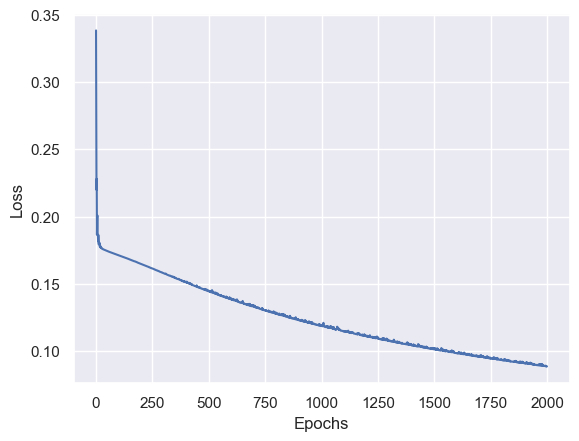

In [62]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

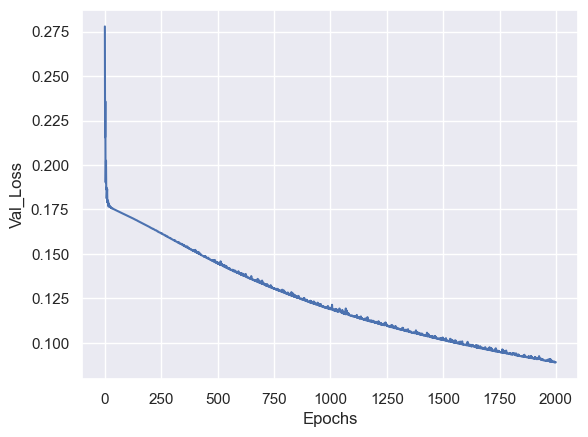

In [63]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [ ]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\Alpha-Giants.h5


In [64]:
predalpha = modelAlpha.predict(X_test)

49/49 [==============================] - 0s 2ms/step


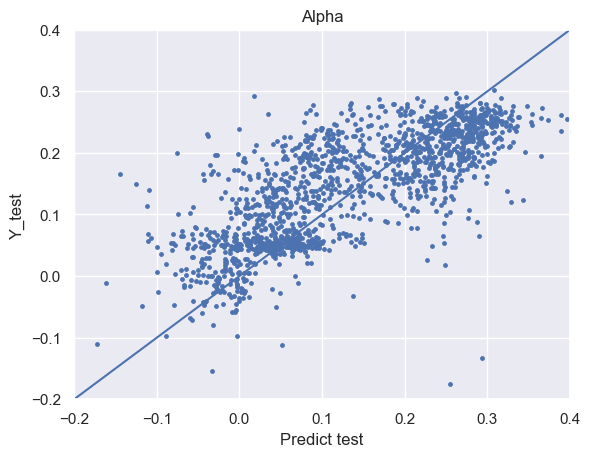

In [65]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.4)
plt.ylim(-0.2, 0.4)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [66]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 55.00000000000001%


In [93]:
Y_test['alpha_predict'] = predalpha

In [94]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0094_0171878         4288.4650  0.816329 -0.874430 -0.050598   
iDR4_3_SPLUS-n05n53_0020097   4745.7180  2.855237 -0.035345  0.108599   
iDR4_3_SPLUS-s46s29_0017550   4973.4100  3.349861 -0.147130  0.042937   
iDR4_3_SPLUS-n09s39_0050569   4645.5024  2.786350  0.004276  0.109922   
iDR4_3_STRIPE82-0037_0009920  5039.8860  2.483387 -0.644730  0.262665   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550  4881.4550  3.045865 -0.250150  0.107608   
iDR4_3_SPLUS-n03s23_0031712   4836.8403  3.495177  0.099263  0.143395   
iDR4_3_SPLUS-n10s38_0052372   4940.1743  2.486235 -0.501270  0.247435   
iDR4_3_MC0071_0097241         4102.3350  0.765844 -1.130600  0.013343   
iDR4_3_SPLUS-n01s20_0029469   4989.2437  2.493237 -0.424550  0.246175   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0094_0171878        -0.373150  0.082272  0.225710 -0.106878   
iDR4_3_SPLUS-n05n53_0020097   0.116970  0.080165  0.071023  0.019432   
iDR4_3_SPLUS-s46s29_0017550   0.053945 -0.011186  0.016485  0.056142   
iDR4_3_SPLUS-n09s39_0050569   0.039711  0.065837  0.144636  0.064343   
iDR4_3_STRIPE82-0037_0009920  0.147950  0.152045  0.086803  0.095962   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550 -0.015479  0.087145  0.039734  0.036633   
iDR4_3_SPLUS-n03s23_0031712   0.065450  0.069100  0.028691  0.117060   
iDR4_3_SPLUS-n10s38_0052372   0.100964  0.130405  0.102806  0.109592   
iDR4_3_MC0071_0097241        -0.533170  0.111935  0.174520 -0.100507   
iDR4_3_SPLUS-n01s20_0029469   0.195830  0.165685  0.112399  0.105543   

                                 MG_FE     SI_FE  alpha_predict  
ID                                                               
iDR4_3_MC0094_0171878        -0.108357 -0.049973      -0.005373  
iDR4_3_SPLUS-n05n53_0020097   0.144740  0.062378       0.111583  
iDR4_3_SPLUS-s46s29_0017550   0.088306  0.016733       0.136314  
iDR4_3_SPLUS-n09s39_0050569   0.163329  0.064845       0.132540  
iDR4_3_STRIPE82-0037_0009920  0.328323  0.262481       0.223046  
...                                ...       ...            ...  
iDR4_3_STRIPE82-0075_0005550  0.156158  0.060104       0.193341  
iDR4_3_SPLUS-n03s23_0031712   0.203312  0.083162       0.116405  
iDR4_3_SPLUS-n10s38_0052372   0.300813  0.242221       0.233386  
iDR4_3_MC0071_0097241        -0.014610 -0.022778       0.039200  
iDR4_3_SPLUS-n01s20_0029469   0.302853  0.220991       0.194410  

[1556 rows x 11 columns]

In [95]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [101]:
Parametro = "CFE"
columnTrain = 'C_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [104]:
modelCFE = training_model()

In [143]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/100


2/2 - 0s - loss: 0.1262 - val_loss: 0.1267 - 81ms/epoch - 41ms/step
Epoch 2/100
2/2 - 0s - loss: 0.1275 - val_loss: 0.1233 - 52ms/epoch - 26ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1268 - val_loss: 0.1220 - 49ms/epoch - 25ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1258 - val_loss: 0.1259 - 45ms/epoch - 23ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1274 - val_loss: 0.1243 - 46ms/epoch - 23ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1275 - val_loss: 0.1220 - 48ms/epoch - 24ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1255 - val_loss: 0.1223 - 46ms/epoch - 23ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1251 - val_loss: 0.1237 - 47ms/epoch - 24ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1281 - val_loss: 0.1239 - 46ms/epoch - 23ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1258 - val_loss: 0.1227 - 44ms/epoch - 22ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1256 - val_loss: 0.1216 - 44ms/epoch - 22ms/step
Epoch 12/100
2/2 - 0s - loss: 0.1248 - val_loss: 0.1219 - 50ms/epoch - 25ms/step
Epoch 13/100
2/2 - 0s - loss: 0.1246 - val_loss: 

Text(0, 0.5, 'Loss')

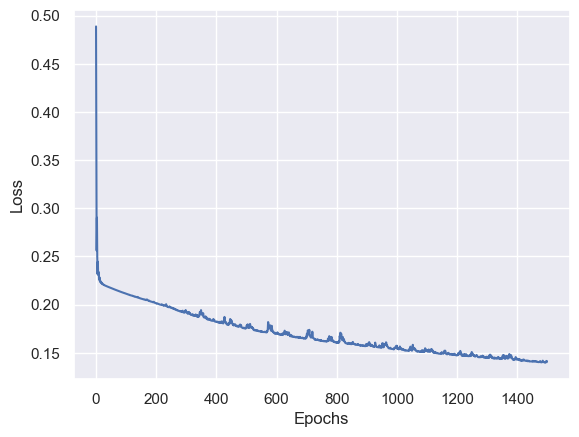

In [106]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

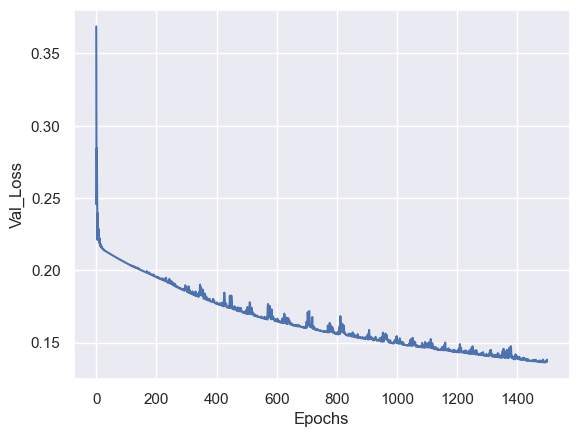

In [107]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [127]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CFE-Giants.h5


In [144]:
predCFE = modelCFE.predict(X_test)

 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 5ms/step


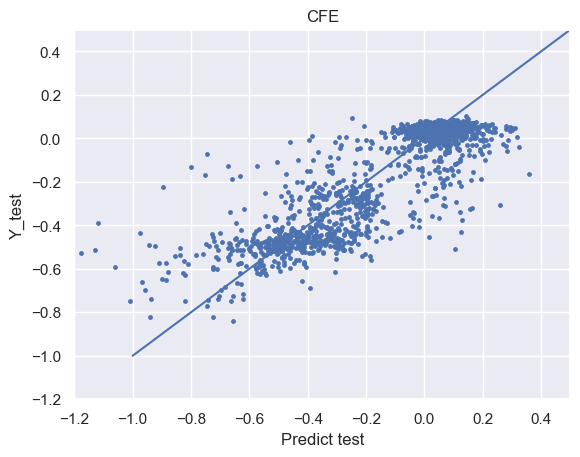

In [145]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.5)
plt.ylim(-1.2, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [146]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 69.0%


In [128]:
Y_test['CFE_predict'] = predCFE

In [129]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0094_0171878         4288.4650  0.816329 -0.874430 -0.050598   
iDR4_3_SPLUS-n05n53_0020097   4745.7180  2.855237 -0.035345  0.108599   
iDR4_3_SPLUS-s46s29_0017550   4973.4100  3.349861 -0.147130  0.042937   
iDR4_3_SPLUS-n09s39_0050569   4645.5024  2.786350  0.004276  0.109922   
iDR4_3_STRIPE82-0037_0009920  5039.8860  2.483387 -0.644730  0.262665   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550  4881.4550  3.045865 -0.250150  0.107608   
iDR4_3_SPLUS-n03s23_0031712   4836.8403  3.495177  0.099263  0.143395   
iDR4_3_SPLUS-n10s38_0052372   4940.1743  2.486235 -0.501270  0.247435   
iDR4_3_MC0071_0097241         4102.3350  0.765844 -1.130600  0.013343   
iDR4_3_SPLUS-n01s20_0029469   4989.2437  2.493237 -0.424550  0.246175   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0094_0171878        -0.373150  0.082272  0.225710 -0.106878   
iDR4_3_SPLUS-n05n53_0020097   0.116970  0.080165  0.071023  0.019432   
iDR4_3_SPLUS-s46s29_0017550   0.053945 -0.011186  0.016485  0.056142   
iDR4_3_SPLUS-n09s39_0050569   0.039711  0.065837  0.144636  0.064343   
iDR4_3_STRIPE82-0037_0009920  0.147950  0.152045  0.086803  0.095962   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550 -0.015479  0.087145  0.039734  0.036633   
iDR4_3_SPLUS-n03s23_0031712   0.065450  0.069100  0.028691  0.117060   
iDR4_3_SPLUS-n10s38_0052372   0.100964  0.130405  0.102806  0.109592   
iDR4_3_MC0071_0097241        -0.533170  0.111935  0.174520 -0.100507   
iDR4_3_SPLUS-n01s20_0029469   0.195830  0.165685  0.112399  0.105543   

                                 MG_FE     SI_FE  CFE_predict  
ID                                                             
iDR4_3_MC0094_0171878        -0.108357 -0.049973    -0.349959  
iDR4_3_SPLUS-n05n53_0020097   0.144740  0.062378     0.052589  
iDR4_3_SPLUS-s46s29_0017550   0.088306  0.016733     0.055715  
iDR4_3_SPLUS-n09s39_0050569   0.163329  0.064845     0.079301  
iDR4_3_STRIPE82-0037_0009920  0.328323  0.262481     0.041360  
...                                ...       ...          ...  
iDR4_3_STRIPE82-0075_0005550  0.156158  0.060104     0.104846  
iDR4_3_SPLUS-n03s23_0031712   0.203312  0.083162     0.066723  
iDR4_3_SPLUS-n10s38_0052372   0.300813  0.242221     0.068623  
iDR4_3_MC0071_0097241        -0.014610 -0.022778    -0.446005  
iDR4_3_SPLUS-n01s20_0029469   0.302853  0.220991     0.027609  

[1556 rows x 11 columns]

In [130]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [156]:
Parametro = "CAFE"
columnTrain = 'CA_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [157]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0032_0004448         4202.3440  0.858002 -0.49416  0.000764   
iDR4_3_MC0030_0015715         4009.8042  0.616374 -0.45636  0.004866   
iDR4_3_STRIPE82-0113_0027582  4934.6710  2.540745 -0.56147  0.244835   
iDR4_3_MC0028_0038972         4149.8115  0.579854 -1.72440  0.069962   
iDR4_3_SPLUS-n05n53_0023711   4844.7010  2.245942 -0.61307  0.276105   
...                                 ...       ...      ...       ...   
iDR4_3_MC0094_0295237         4024.6511  0.699362 -0.98230  0.044358   
iDR4_3_MC0029_0116275         4683.8720  2.478323 -0.59773  0.290535   
iDR4_3_MC0111_0034158         4068.8994  0.912623 -0.51736  0.059888   
iDR4_3_MC0023_0012692         4782.7860  1.451852 -0.49264  0.011864   
iDR4_3_MC0040_0069713         4213.5303  0.869180 -0.40565 -0.021772   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0032_0004448        -0.257860  0.058285  0.312360 -0.105908   
iDR4_3_MC0030_0015715        -0.219980  0.036665  0.347730 -0.104758   
iDR4_3_STRIPE82-0113_0027582  0.088700  0.109975  0.102057  0.034702   
iDR4_3_MC0028_0038972        -0.745440  0.119325  0.439650 -0.021507   
iDR4_3_SPLUS-n05n53_0023711   0.098834  0.170295  0.155890  0.098482   
...                                ...       ...       ...       ...   
iDR4_3_MC0094_0295237        -0.463780  0.068395  0.167940 -0.063107   
iDR4_3_MC0029_0116275         0.048376  0.212645 -0.014927  0.104812   
iDR4_3_MC0111_0034158        -0.252870  0.049504  0.159790 -0.087378   
iDR4_3_MC0023_0012692        -0.011099  0.119685  0.127748 -0.114368   
iDR4_3_MC0040_0069713        -0.214050  0.036884  0.346050 -0.134848   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0032_0004448        -0.007082 -0.063469  
iDR4_3_MC0030_0015715         0.020392 -0.008509  
iDR4_3_STRIPE82-0113_0027582  0.291873  0.175241  
iDR4_3_MC0028_0038972        -0.001911  0.064221  
iDR4_3_SPLUS-n05n53_0023711   0.339933  0.265781  
...                                ...       ...  
iDR4_3_MC0094_0295237        -0.024579  0.036137  
iDR4_3_MC0029_0116275         0.345753  0.275181  
iDR4_3_MC0111_0034158         0.070421  0.056802  
iDR4_3_MC0023_0012692        -0.035687  0.000441  
iDR4_3_MC0040_0069713        -0.034597 -0.010885  

[5599 rows x 10 columns]

In [179]:
modelCAFE = training_model()

In [180]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 4000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000


3/3 - 1s - loss: 0.2352 - val_loss: 0.2135 - 562ms/epoch - 187ms/step
Epoch 2/4000
3/3 - 0s - loss: 0.1966 - val_loss: 0.1943 - 53ms/epoch - 18ms/step
Epoch 3/4000
3/3 - 0s - loss: 0.1981 - val_loss: 0.1824 - 54ms/epoch - 18ms/step
Epoch 4/4000
3/3 - 0s - loss: 0.1837 - val_loss: 0.1903 - 51ms/epoch - 17ms/step
Epoch 5/4000
3/3 - 0s - loss: 0.1882 - val_loss: 0.1779 - 52ms/epoch - 17ms/step
Epoch 6/4000
3/3 - 0s - loss: 0.1821 - val_loss: 0.1844 - 51ms/epoch - 17ms/step
Epoch 7/4000
3/3 - 0s - loss: 0.1832 - val_loss: 0.1776 - 48ms/epoch - 16ms/step
Epoch 8/4000
3/3 - 0s - loss: 0.1805 - val_loss: 0.1805 - 52ms/epoch - 17ms/step
Epoch 9/4000
3/3 - 0s - loss: 0.1808 - val_loss: 0.1777 - 50ms/epoch - 17ms/step
Epoch 10/4000
3/3 - 0s - loss: 0.1797 - val_loss: 0.1786 - 51ms/epoch - 17ms/step
Epoch 11/4000
3/3 - 0s - loss: 0.1794 - val_loss: 0.1772 - 72ms/epoch - 24ms/step
Epoch 12/4000
3/3 - 0s - loss: 0.1791 - val_loss: 0.1773 - 53ms/epoch - 18ms/step
Epoch 13/4000
3/3 - 0s - loss: 0.178

Text(0, 0.5, 'Loss')

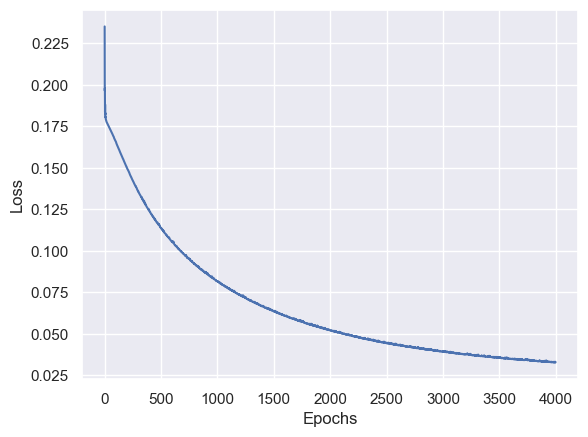

In [181]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

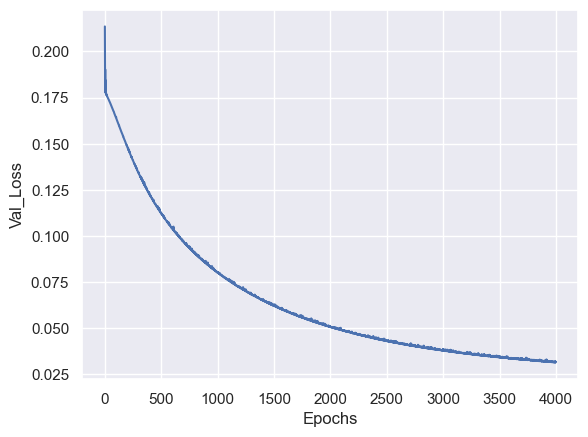

In [182]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [186]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\CAFE-Giants.h5


In [183]:
predCAFE = modelCAFE.predict(X_test)

49/49 [==============================] - 0s 2ms/step


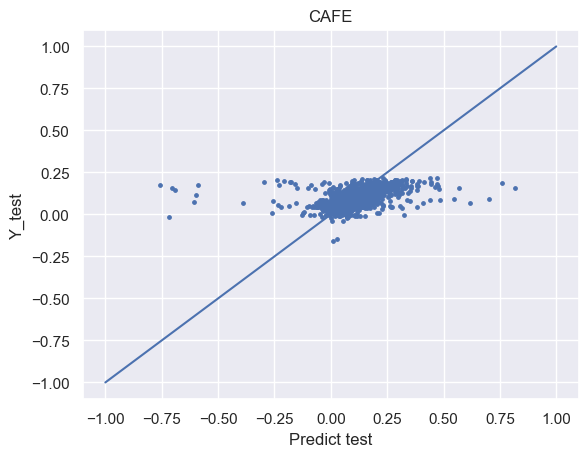

In [184]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
#plt.xlim(-0.12, 0.35)
#plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [185]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 20.0%


In [118]:
Y_test['CAFE_predict'] = predCAFE

In [119]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0094_0171878         4288.4650  0.816329 -0.874430 -0.050598   
iDR4_3_SPLUS-n05n53_0020097   4745.7180  2.855237 -0.035345  0.108599   
iDR4_3_SPLUS-s46s29_0017550   4973.4100  3.349861 -0.147130  0.042937   
iDR4_3_SPLUS-n09s39_0050569   4645.5024  2.786350  0.004276  0.109922   
iDR4_3_STRIPE82-0037_0009920  5039.8860  2.483387 -0.644730  0.262665   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550  4881.4550  3.045865 -0.250150  0.107608   
iDR4_3_SPLUS-n03s23_0031712   4836.8403  3.495177  0.099263  0.143395   
iDR4_3_SPLUS-n10s38_0052372   4940.1743  2.486235 -0.501270  0.247435   
iDR4_3_MC0071_0097241         4102.3350  0.765844 -1.130600  0.013343   
iDR4_3_SPLUS-n01s20_0029469   4989.2437  2.493237 -0.424550  0.246175   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0094_0171878        -0.373150  0.082272  0.225710 -0.106878   
iDR4_3_SPLUS-n05n53_0020097   0.116970  0.080165  0.071023  0.019432   
iDR4_3_SPLUS-s46s29_0017550   0.053945 -0.011186  0.016485  0.056142   
iDR4_3_SPLUS-n09s39_0050569   0.039711  0.065837  0.144636  0.064343   
iDR4_3_STRIPE82-0037_0009920  0.147950  0.152045  0.086803  0.095962   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550 -0.015479  0.087145  0.039734  0.036633   
iDR4_3_SPLUS-n03s23_0031712   0.065450  0.069100  0.028691  0.117060   
iDR4_3_SPLUS-n10s38_0052372   0.100964  0.130405  0.102806  0.109592   
iDR4_3_MC0071_0097241        -0.533170  0.111935  0.174520 -0.100507   
iDR4_3_SPLUS-n01s20_0029469   0.195830  0.165685  0.112399  0.105543   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_MC0094_0171878        -0.108357 -0.049973      -0.005373    -0.407699   
iDR4_3_SPLUS-n05n53_0020097   0.144740  0.062378       0.111583    -0.008889   
iDR4_3_SPLUS-s46s29_0017550   0.088306  0.016733       0.136314     0.021184   
iDR4_3_SPLUS-n09s39_0050569   0.163329  0.064845       0.132540     0.031210   
iDR4_3_STRIPE82-0037_0009920  0.328323  0.262481       0.223046     0.017846   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0075_0005550  0.156158  0.060104       0.193341     0.074667   
iDR4_3_SPLUS-n03s23_0031712   0.203312  0.083162       0.116405     0.034035   
iDR4_3_SPLUS-n10s38_0052372   0.300813  0.242221       0.233386     0.030863   
iDR4_3_MC0071_0097241        -0.014610 -0.022778       0.039200    -0.468395   
iDR4_3_SPLUS-n01s20_0029469   0.302853  0.220991       0.194410    -0.002142   

                              CAFE_predict  
ID                                          
iDR4_3_MC0094_0171878             0.059288  
iDR4_3_SPLUS-n05n53_0020097       0.086104  
iDR4_3_SPLUS-s46s29_0017550       0.125131  
iDR4_3_SPLUS-n09s39_0050569       0.091301  
iDR4_3_STRIPE82-0037_0009920      0.188725  
...                                    ...  
iDR4_3_STRIPE82-0075_0005550      0.139646  
iDR4_3_SPLUS-n03s23_0031712       0.098515  
iDR4_3_SPLUS-n10s38_0052372       0.183126  
iDR4_3_MC0071_0097241             0.070572  
iDR4_3_SPLUS-n01s20_0029469       0.162742  

[1556 rows x 13 columns]

In [120]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [187]:
Parametro = "NFE"
columnTrain = 'N_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [188]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0032_0004448         4202.3440  0.858002 -0.49416  0.000764   
iDR4_3_MC0030_0015715         4009.8042  0.616374 -0.45636  0.004866   
iDR4_3_STRIPE82-0113_0027582  4934.6710  2.540745 -0.56147  0.244835   
iDR4_3_MC0028_0038972         4149.8115  0.579854 -1.72440  0.069962   
iDR4_3_SPLUS-n05n53_0023711   4844.7010  2.245942 -0.61307  0.276105   
...                                 ...       ...      ...       ...   
iDR4_3_MC0094_0295237         4024.6511  0.699362 -0.98230  0.044358   
iDR4_3_MC0029_0116275         4683.8720  2.478323 -0.59773  0.290535   
iDR4_3_MC0111_0034158         4068.8994  0.912623 -0.51736  0.059888   
iDR4_3_MC0023_0012692         4782.7860  1.451852 -0.49264  0.011864   
iDR4_3_MC0040_0069713         4213.5303  0.869180 -0.40565 -0.021772   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0032_0004448        -0.257860  0.058285  0.312360 -0.105908   
iDR4_3_MC0030_0015715        -0.219980  0.036665  0.347730 -0.104758   
iDR4_3_STRIPE82-0113_0027582  0.088700  0.109975  0.102057  0.034702   
iDR4_3_MC0028_0038972        -0.745440  0.119325  0.439650 -0.021507   
iDR4_3_SPLUS-n05n53_0023711   0.098834  0.170295  0.155890  0.098482   
...                                ...       ...       ...       ...   
iDR4_3_MC0094_0295237        -0.463780  0.068395  0.167940 -0.063107   
iDR4_3_MC0029_0116275         0.048376  0.212645 -0.014927  0.104812   
iDR4_3_MC0111_0034158        -0.252870  0.049504  0.159790 -0.087378   
iDR4_3_MC0023_0012692        -0.011099  0.119685  0.127748 -0.114368   
iDR4_3_MC0040_0069713        -0.214050  0.036884  0.346050 -0.134848   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0032_0004448        -0.007082 -0.063469  
iDR4_3_MC0030_0015715         0.020392 -0.008509  
iDR4_3_STRIPE82-0113_0027582  0.291873  0.175241  
iDR4_3_MC0028_0038972        -0.001911  0.064221  
iDR4_3_SPLUS-n05n53_0023711   0.339933  0.265781  
...                                ...       ...  
iDR4_3_MC0094_0295237        -0.024579  0.036137  
iDR4_3_MC0029_0116275         0.345753  0.275181  
iDR4_3_MC0111_0034158         0.070421  0.056802  
iDR4_3_MC0023_0012692        -0.035687  0.000441  
iDR4_3_MC0040_0069713        -0.034597 -0.010885  

[5599 rows x 10 columns]

In [212]:
modelNFE = training_model()

In [213]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 4000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000


3/3 - 1s - loss: 0.2840 - val_loss: 0.2129 - 590ms/epoch - 197ms/step
Epoch 2/4000
3/3 - 0s - loss: 0.2297 - val_loss: 0.2197 - 63ms/epoch - 21ms/step
Epoch 3/4000
3/3 - 0s - loss: 0.2153 - val_loss: 0.2115 - 64ms/epoch - 21ms/step
Epoch 4/4000
3/3 - 0s - loss: 0.2149 - val_loss: 0.2065 - 57ms/epoch - 19ms/step
Epoch 5/4000
3/3 - 0s - loss: 0.2111 - val_loss: 0.2078 - 58ms/epoch - 19ms/step
Epoch 6/4000
3/3 - 0s - loss: 0.2099 - val_loss: 0.2039 - 57ms/epoch - 19ms/step
Epoch 7/4000
3/3 - 0s - loss: 0.2082 - val_loss: 0.2044 - 56ms/epoch - 19ms/step
Epoch 8/4000
3/3 - 0s - loss: 0.2073 - val_loss: 0.2020 - 55ms/epoch - 18ms/step
Epoch 9/4000
3/3 - 0s - loss: 0.2063 - val_loss: 0.2012 - 58ms/epoch - 19ms/step
Epoch 10/4000
3/3 - 0s - loss: 0.2059 - val_loss: 0.2013 - 60ms/epoch - 20ms/step
Epoch 11/4000
3/3 - 0s - loss: 0.2053 - val_loss: 0.2007 - 60ms/epoch - 20ms/step
Epoch 12/4000
3/3 - 0s - loss: 0.2053 - val_loss: 0.2007 - 67ms/epoch - 22ms/step
Epoch 13/4000
3/3 - 0s - loss: 0.204

Text(0, 0.5, 'Loss')

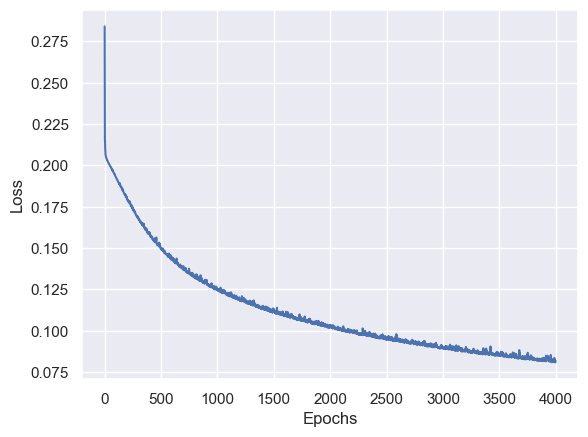

In [214]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

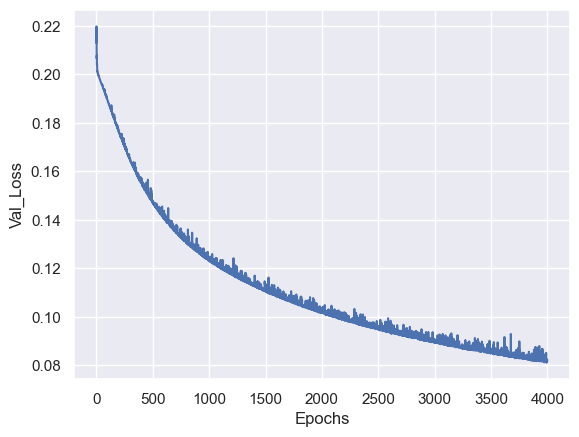

In [215]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [219]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NFE-Giants.h5


In [216]:
predNFE = modelNFE.predict(X_test)

49/49 [==============================] - 0s 2ms/step


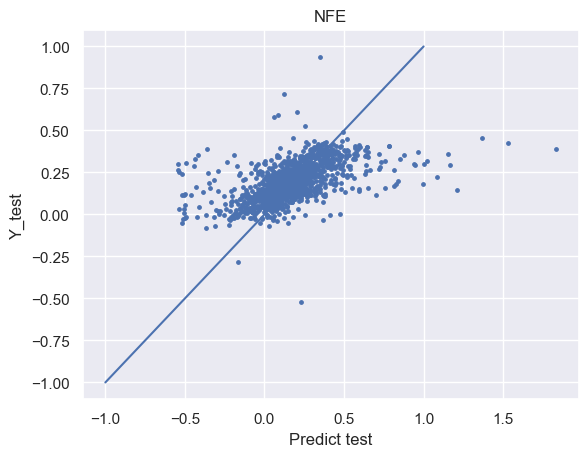

In [217]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
#plt.xlim(0, 0.7)
#plt.ylim(0, 0.7)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [218]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 28.000000000000004%


In [131]:
Y_test['NFE_predict'] = predNFE

In [132]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0094_0171878         4288.4650  0.816329 -0.874430 -0.050598   
iDR4_3_SPLUS-n05n53_0020097   4745.7180  2.855237 -0.035345  0.108599   
iDR4_3_SPLUS-s46s29_0017550   4973.4100  3.349861 -0.147130  0.042937   
iDR4_3_SPLUS-n09s39_0050569   4645.5024  2.786350  0.004276  0.109922   
iDR4_3_STRIPE82-0037_0009920  5039.8860  2.483387 -0.644730  0.262665   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550  4881.4550  3.045865 -0.250150  0.107608   
iDR4_3_SPLUS-n03s23_0031712   4836.8403  3.495177  0.099263  0.143395   
iDR4_3_SPLUS-n10s38_0052372   4940.1743  2.486235 -0.501270  0.247435   
iDR4_3_MC0071_0097241         4102.3350  0.765844 -1.130600  0.013343   
iDR4_3_SPLUS-n01s20_0029469   4989.2437  2.493237 -0.424550  0.246175   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0094_0171878        -0.373150  0.082272  0.225710 -0.106878   
iDR4_3_SPLUS-n05n53_0020097   0.116970  0.080165  0.071023  0.019432   
iDR4_3_SPLUS-s46s29_0017550   0.053945 -0.011186  0.016485  0.056142   
iDR4_3_SPLUS-n09s39_0050569   0.039711  0.065837  0.144636  0.064343   
iDR4_3_STRIPE82-0037_0009920  0.147950  0.152045  0.086803  0.095962   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550 -0.015479  0.087145  0.039734  0.036633   
iDR4_3_SPLUS-n03s23_0031712   0.065450  0.069100  0.028691  0.117060   
iDR4_3_SPLUS-n10s38_0052372   0.100964  0.130405  0.102806  0.109592   
iDR4_3_MC0071_0097241        -0.533170  0.111935  0.174520 -0.100507   
iDR4_3_SPLUS-n01s20_0029469   0.195830  0.165685  0.112399  0.105543   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_MC0094_0171878        -0.108357 -0.049973      -0.005373    -0.407699   
iDR4_3_SPLUS-n05n53_0020097   0.144740  0.062378       0.111583    -0.008889   
iDR4_3_SPLUS-s46s29_0017550   0.088306  0.016733       0.136314     0.021184   
iDR4_3_SPLUS-n09s39_0050569   0.163329  0.064845       0.132540     0.031210   
iDR4_3_STRIPE82-0037_0009920  0.328323  0.262481       0.223046     0.017846   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0075_0005550  0.156158  0.060104       0.193341     0.074667   
iDR4_3_SPLUS-n03s23_0031712   0.203312  0.083162       0.116405     0.034035   
iDR4_3_SPLUS-n10s38_0052372   0.300813  0.242221       0.233386     0.030863   
iDR4_3_MC0071_0097241        -0.014610 -0.022778       0.039200    -0.468395   
iDR4_3_SPLUS-n01s20_0029469   0.302853  0.220991       0.194410    -0.002142   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_MC0094_0171878             0.059288     0.402380  
iDR4_3_SPLUS-n05n53_0020097       0.086104     0.240073  
iDR4_3_SPLUS-s46s29_0017550       0.125131     0.159111  
iDR4_3_SPLUS-n09s39_0050569       0.091301     0.211089  
iDR4_3_STRIPE82-0037_0009920      0.188725     0.118504  
...                                    ...          ...  
iDR4_3_STRIPE82-0075_0005550      0.139646     0.114408  
iDR4_3_SPLUS-n03s23_0031712       0.098515     0.186733  
iDR4_3_SPLUS-n10s38_0052372       0.183126     0.120030  
iDR4_3_MC0071_0097241             0.070572     0.140138  
iDR4_3_SPLUS-n01s20_0029469       0.162742     0.169806  

[1556 rows x 14 columns]

In [133]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [220]:
Parametro = "MGFE"
columnTrain = 'MG_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [221]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0032_0004448         4202.3440  0.858002 -0.49416  0.000764   
iDR4_3_MC0030_0015715         4009.8042  0.616374 -0.45636  0.004866   
iDR4_3_STRIPE82-0113_0027582  4934.6710  2.540745 -0.56147  0.244835   
iDR4_3_MC0028_0038972         4149.8115  0.579854 -1.72440  0.069962   
iDR4_3_SPLUS-n05n53_0023711   4844.7010  2.245942 -0.61307  0.276105   
...                                 ...       ...      ...       ...   
iDR4_3_MC0094_0295237         4024.6511  0.699362 -0.98230  0.044358   
iDR4_3_MC0029_0116275         4683.8720  2.478323 -0.59773  0.290535   
iDR4_3_MC0111_0034158         4068.8994  0.912623 -0.51736  0.059888   
iDR4_3_MC0023_0012692         4782.7860  1.451852 -0.49264  0.011864   
iDR4_3_MC0040_0069713         4213.5303  0.869180 -0.40565 -0.021772   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0032_0004448        -0.257860  0.058285  0.312360 -0.105908   
iDR4_3_MC0030_0015715        -0.219980  0.036665  0.347730 -0.104758   
iDR4_3_STRIPE82-0113_0027582  0.088700  0.109975  0.102057  0.034702   
iDR4_3_MC0028_0038972        -0.745440  0.119325  0.439650 -0.021507   
iDR4_3_SPLUS-n05n53_0023711   0.098834  0.170295  0.155890  0.098482   
...                                ...       ...       ...       ...   
iDR4_3_MC0094_0295237        -0.463780  0.068395  0.167940 -0.063107   
iDR4_3_MC0029_0116275         0.048376  0.212645 -0.014927  0.104812   
iDR4_3_MC0111_0034158        -0.252870  0.049504  0.159790 -0.087378   
iDR4_3_MC0023_0012692        -0.011099  0.119685  0.127748 -0.114368   
iDR4_3_MC0040_0069713        -0.214050  0.036884  0.346050 -0.134848   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0032_0004448        -0.007082 -0.063469  
iDR4_3_MC0030_0015715         0.020392 -0.008509  
iDR4_3_STRIPE82-0113_0027582  0.291873  0.175241  
iDR4_3_MC0028_0038972        -0.001911  0.064221  
iDR4_3_SPLUS-n05n53_0023711   0.339933  0.265781  
...                                ...       ...  
iDR4_3_MC0094_0295237        -0.024579  0.036137  
iDR4_3_MC0029_0116275         0.345753  0.275181  
iDR4_3_MC0111_0034158         0.070421  0.056802  
iDR4_3_MC0023_0012692        -0.035687  0.000441  
iDR4_3_MC0040_0069713        -0.034597 -0.010885  

[5599 rows x 10 columns]

In [229]:
modelMGFE = training_model()

In [230]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 4000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000


3/3 - 1s - loss: 0.3028 - val_loss: 0.2021 - 714ms/epoch - 238ms/step
Epoch 2/4000
3/3 - 0s - loss: 0.2227 - val_loss: 0.2167 - 94ms/epoch - 31ms/step
Epoch 3/4000
3/3 - 0s - loss: 0.2022 - val_loss: 0.2111 - 85ms/epoch - 28ms/step
Epoch 4/4000
3/3 - 0s - loss: 0.2048 - val_loss: 0.1914 - 84ms/epoch - 28ms/step
Epoch 5/4000
3/3 - 0s - loss: 0.1982 - val_loss: 0.1952 - 69ms/epoch - 23ms/step
Epoch 6/4000
3/3 - 0s - loss: 0.1901 - val_loss: 0.1933 - 63ms/epoch - 21ms/step
Epoch 7/4000
3/3 - 0s - loss: 0.1923 - val_loss: 0.1874 - 62ms/epoch - 21ms/step
Epoch 8/4000
3/3 - 0s - loss: 0.1887 - val_loss: 0.1899 - 60ms/epoch - 20ms/step
Epoch 9/4000
3/3 - 0s - loss: 0.1870 - val_loss: 0.1873 - 58ms/epoch - 19ms/step
Epoch 10/4000
3/3 - 0s - loss: 0.1870 - val_loss: 0.1851 - 68ms/epoch - 23ms/step
Epoch 11/4000
3/3 - 0s - loss: 0.1858 - val_loss: 0.1855 - 61ms/epoch - 20ms/step
Epoch 12/4000
3/3 - 0s - loss: 0.1845 - val_loss: 0.1854 - 69ms/epoch - 23ms/step
Epoch 13/4000
3/3 - 0s - loss: 0.184

Text(0, 0.5, 'Loss')

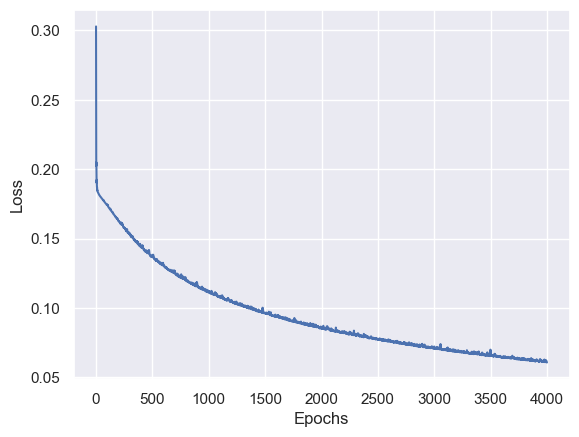

In [231]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

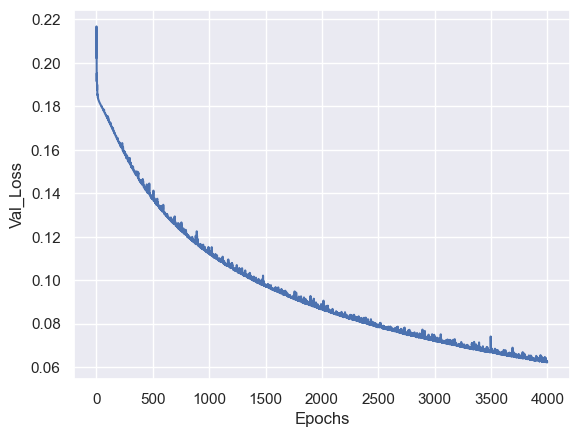

In [232]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [239]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\MGFE-Giants.h5


In [233]:
predMGFE = modelMGFE.predict(X_test)

 1/49 [..............................] - ETA: 3s

49/49 [==============================] - 0s 5ms/step


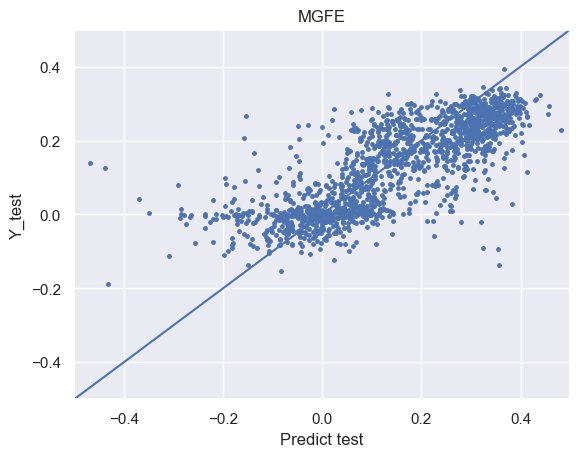

In [234]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [235]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 60.0%


In [236]:
Y_test['MGFE_predict'] = predMGFE

In [237]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0094_0171878         4288.4650  0.816329 -0.874430 -0.050598   
iDR4_3_SPLUS-n05n53_0020097   4745.7180  2.855237 -0.035345  0.108599   
iDR4_3_SPLUS-s46s29_0017550   4973.4100  3.349861 -0.147130  0.042937   
iDR4_3_SPLUS-n09s39_0050569   4645.5024  2.786350  0.004276  0.109922   
iDR4_3_STRIPE82-0037_0009920  5039.8860  2.483387 -0.644730  0.262665   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550  4881.4550  3.045865 -0.250150  0.107608   
iDR4_3_SPLUS-n03s23_0031712   4836.8403  3.495177  0.099263  0.143395   
iDR4_3_SPLUS-n10s38_0052372   4940.1743  2.486235 -0.501270  0.247435   
iDR4_3_MC0071_0097241         4102.3350  0.765844 -1.130600  0.013343   
iDR4_3_SPLUS-n01s20_0029469   4989.2437  2.493237 -0.424550  0.246175   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0094_0171878        -0.373150  0.082272  0.225710 -0.106878   
iDR4_3_SPLUS-n05n53_0020097   0.116970  0.080165  0.071023  0.019432   
iDR4_3_SPLUS-s46s29_0017550   0.053945 -0.011186  0.016485  0.056142   
iDR4_3_SPLUS-n09s39_0050569   0.039711  0.065837  0.144636  0.064343   
iDR4_3_STRIPE82-0037_0009920  0.147950  0.152045  0.086803  0.095962   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550 -0.015479  0.087145  0.039734  0.036633   
iDR4_3_SPLUS-n03s23_0031712   0.065450  0.069100  0.028691  0.117060   
iDR4_3_SPLUS-n10s38_0052372   0.100964  0.130405  0.102806  0.109592   
iDR4_3_MC0071_0097241        -0.533170  0.111935  0.174520 -0.100507   
iDR4_3_SPLUS-n01s20_0029469   0.195830  0.165685  0.112399  0.105543   

                                 MG_FE     SI_FE  CFE_predict  MGFE_predict  
ID                                                                           
iDR4_3_MC0094_0171878        -0.108357 -0.049973    -0.349959     -0.067494  
iDR4_3_SPLUS-n05n53_0020097   0.144740  0.062378     0.052589      0.135460  
iDR4_3_SPLUS-s46s29_0017550   0.088306  0.016733     0.055715      0.150581  
iDR4_3_SPLUS-n09s39_0050569   0.163329  0.064845     0.079301      0.152058  
iDR4_3_STRIPE82-0037_0009920  0.328323  0.262481     0.041360      0.302198  
...                                ...       ...          ...           ...  
iDR4_3_STRIPE82-0075_0005550  0.156158  0.060104     0.104846      0.239414  
iDR4_3_SPLUS-n03s23_0031712   0.203312  0.083162     0.066723      0.143201  
iDR4_3_SPLUS-n10s38_0052372   0.300813  0.242221     0.068623      0.320527  
iDR4_3_MC0071_0097241        -0.014610 -0.022778    -0.446005      0.017086  
iDR4_3_SPLUS-n01s20_0029469   0.302853  0.220991     0.027609      0.262123  

[1556 rows x 12 columns]

In [238]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [240]:
Parametro = "SIFE"
columnTrain = 'SI_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [241]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0032_0004448         4202.3440  0.858002 -0.49416  0.000764   
iDR4_3_MC0030_0015715         4009.8042  0.616374 -0.45636  0.004866   
iDR4_3_STRIPE82-0113_0027582  4934.6710  2.540745 -0.56147  0.244835   
iDR4_3_MC0028_0038972         4149.8115  0.579854 -1.72440  0.069962   
iDR4_3_SPLUS-n05n53_0023711   4844.7010  2.245942 -0.61307  0.276105   
...                                 ...       ...      ...       ...   
iDR4_3_MC0094_0295237         4024.6511  0.699362 -0.98230  0.044358   
iDR4_3_MC0029_0116275         4683.8720  2.478323 -0.59773  0.290535   
iDR4_3_MC0111_0034158         4068.8994  0.912623 -0.51736  0.059888   
iDR4_3_MC0023_0012692         4782.7860  1.451852 -0.49264  0.011864   
iDR4_3_MC0040_0069713         4213.5303  0.869180 -0.40565 -0.021772   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0032_0004448        -0.257860  0.058285  0.312360 -0.105908   
iDR4_3_MC0030_0015715        -0.219980  0.036665  0.347730 -0.104758   
iDR4_3_STRIPE82-0113_0027582  0.088700  0.109975  0.102057  0.034702   
iDR4_3_MC0028_0038972        -0.745440  0.119325  0.439650 -0.021507   
iDR4_3_SPLUS-n05n53_0023711   0.098834  0.170295  0.155890  0.098482   
...                                ...       ...       ...       ...   
iDR4_3_MC0094_0295237        -0.463780  0.068395  0.167940 -0.063107   
iDR4_3_MC0029_0116275         0.048376  0.212645 -0.014927  0.104812   
iDR4_3_MC0111_0034158        -0.252870  0.049504  0.159790 -0.087378   
iDR4_3_MC0023_0012692        -0.011099  0.119685  0.127748 -0.114368   
iDR4_3_MC0040_0069713        -0.214050  0.036884  0.346050 -0.134848   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0032_0004448        -0.007082 -0.063469  
iDR4_3_MC0030_0015715         0.020392 -0.008509  
iDR4_3_STRIPE82-0113_0027582  0.291873  0.175241  
iDR4_3_MC0028_0038972        -0.001911  0.064221  
iDR4_3_SPLUS-n05n53_0023711   0.339933  0.265781  
...                                ...       ...  
iDR4_3_MC0094_0295237        -0.024579  0.036137  
iDR4_3_MC0029_0116275         0.345753  0.275181  
iDR4_3_MC0111_0034158         0.070421  0.056802  
iDR4_3_MC0023_0012692        -0.035687  0.000441  
iDR4_3_MC0040_0069713        -0.034597 -0.010885  

[5599 rows x 10 columns]

In [256]:
modelSIFE = training_model()

In [257]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 0.3861 - val_loss: 0.2357 - 640ms/epoch - 213ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.2789 - val_loss: 0.2105 - 55ms/epoch - 18ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.2186 - val_loss: 0.2414 - 56ms/epoch - 19ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.2171 - val_loss: 0.1888 - 55ms/epoch - 18ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.2070 - val_loss: 0.2041 - 69ms/epoch - 23ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.1943 - val_loss: 0.1947 - 66ms/epoch - 22ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1962 - val_loss: 0.1802 - 58ms/epoch - 19ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1829 - val_loss: 0.1923 - 59ms/epoch - 20ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.1890 - val_loss: 0.1804 - 58ms/epoch - 19ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.1827 - val_loss: 0.1834 - 57ms/epoch - 19ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.1821 - val_loss: 0.1799 - 61ms/epoch - 20ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.1817 - val_loss: 0.1801 - 51ms/epoch - 17ms/step
Epoch 13/2000
3/3 - 0s - loss: 0.179

Text(0, 0.5, 'Loss')

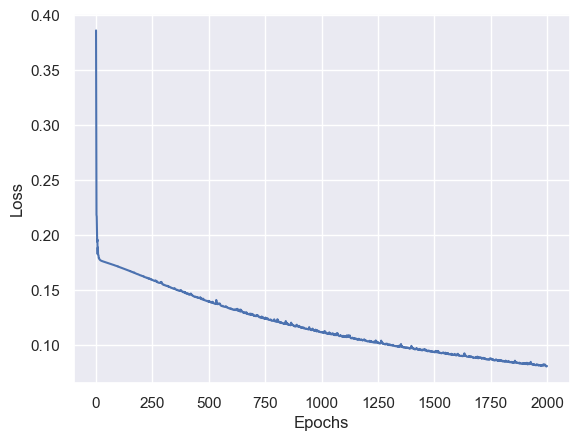

In [258]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

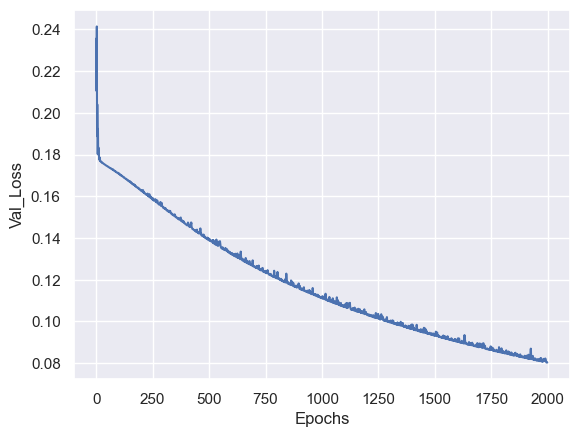

In [259]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [192]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\SIFE-Giants.h5


In [260]:
predSIFE = modelSIFE.predict(X_test)

 1/49 [..............................] - ETA: 3s

49/49 [==============================] - 0s 2ms/step


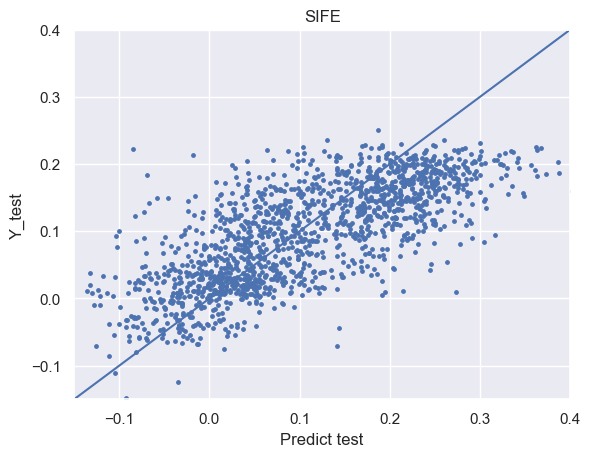

In [261]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.4)
plt.ylim(-0.15, 0.4)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [262]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 50.0%


In [196]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [197]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0094_0171878         4288.4650  0.816329 -0.874430 -0.050598   
iDR4_3_SPLUS-n05n53_0020097   4745.7180  2.855237 -0.035345  0.108599   
iDR4_3_SPLUS-s46s29_0017550   4973.4100  3.349861 -0.147130  0.042937   
iDR4_3_SPLUS-n09s39_0050569   4645.5024  2.786350  0.004276  0.109922   
iDR4_3_STRIPE82-0037_0009920  5039.8860  2.483387 -0.644730  0.262665   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550  4881.4550  3.045865 -0.250150  0.107608   
iDR4_3_SPLUS-n03s23_0031712   4836.8403  3.495177  0.099263  0.143395   
iDR4_3_SPLUS-n10s38_0052372   4940.1743  2.486235 -0.501270  0.247435   
iDR4_3_MC0071_0097241         4102.3350  0.765844 -1.130600  0.013343   
iDR4_3_SPLUS-n01s20_0029469   4989.2437  2.493237 -0.424550  0.246175   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0094_0171878        -0.373150  0.082272  0.225710 -0.106878   
iDR4_3_SPLUS-n05n53_0020097   0.116970  0.080165  0.071023  0.019432   
iDR4_3_SPLUS-s46s29_0017550   0.053945 -0.011186  0.016485  0.056142   
iDR4_3_SPLUS-n09s39_0050569   0.039711  0.065837  0.144636  0.064343   
iDR4_3_STRIPE82-0037_0009920  0.147950  0.152045  0.086803  0.095962   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550 -0.015479  0.087145  0.039734  0.036633   
iDR4_3_SPLUS-n03s23_0031712   0.065450  0.069100  0.028691  0.117060   
iDR4_3_SPLUS-n10s38_0052372   0.100964  0.130405  0.102806  0.109592   
iDR4_3_MC0071_0097241        -0.533170  0.111935  0.174520 -0.100507   
iDR4_3_SPLUS-n01s20_0029469   0.195830  0.165685  0.112399  0.105543   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_MC0094_0171878        -0.108357 -0.049973      -0.005373    -0.407699   
iDR4_3_SPLUS-n05n53_0020097   0.144740  0.062378       0.111583    -0.008889   
iDR4_3_SPLUS-s46s29_0017550   0.088306  0.016733       0.136314     0.021184   
iDR4_3_SPLUS-n09s39_0050569   0.163329  0.064845       0.132540     0.031210   
iDR4_3_STRIPE82-0037_0009920  0.328323  0.262481       0.223046     0.017846   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0075_0005550  0.156158  0.060104       0.193341     0.074667   
iDR4_3_SPLUS-n03s23_0031712   0.203312  0.083162       0.116405     0.034035   
iDR4_3_SPLUS-n10s38_0052372   0.300813  0.242221       0.233386     0.030863   
iDR4_3_MC0071_0097241        -0.014610 -0.022778       0.039200    -0.468395   
iDR4_3_SPLUS-n01s20_0029469   0.302853  0.220991       0.194410    -0.002142   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_MC0094_0171878             0.059288     0.402380     -0.037364   
iDR4_3_SPLUS-n05n53_0020097       0.086104     0.240073      0.196826   
iDR4_3_SPLUS-s46s29_0017550       0.125131     0.159111      0.233484   
iDR4_3_SPLUS-n09s39_0050569       0.091301     0.211089      0.223563   
iDR4_3_STRIPE82-0037_0009920      0.188725     0.118504      0.325714   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0075_0005550      0.139646     0.114408      0.296210   
iDR4_3_SPLUS-n03s23_0031712       0.098515     0.186733      0.225943   
iDR4_3_SPLUS-n10s38_0052372       0.183126     0.120030      0.348263   
iDR4_3_MC0071_0097241             0.070572     0.140138      0.041261   
iDR4_3_SPLUS-n01s20_0029469       0.162742     0.169806      0.292348   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_MC0094_0171878            -0.021

In [198]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [160]:
Parametro = "NIFE"
columnTrain = 'NI_FE'

AouG = "Giants"
NomeBase = "Apogee"
BaseSaveModel = "Apogee"

In [161]:
Y_train

TEFF      LOGG     FE_H   ALPHA_M  \
ID                                                                     
iDR4_3_MC0032_0004448         4202.3440  0.858002 -0.49416  0.000764   
iDR4_3_MC0030_0015715         4009.8042  0.616374 -0.45636  0.004866   
iDR4_3_STRIPE82-0113_0027582  4934.6710  2.540745 -0.56147  0.244835   
iDR4_3_MC0028_0038972         4149.8115  0.579854 -1.72440  0.069962   
iDR4_3_SPLUS-n05n53_0023711   4844.7010  2.245942 -0.61307  0.276105   
...                                 ...       ...      ...       ...   
iDR4_3_MC0094_0295237         4024.6511  0.699362 -0.98230  0.044358   
iDR4_3_MC0029_0116275         4683.8720  2.478323 -0.59773  0.290535   
iDR4_3_MC0111_0034158         4068.8994  0.912623 -0.51736  0.059888   
iDR4_3_MC0023_0012692         4782.7860  1.451852 -0.49264  0.011864   
iDR4_3_MC0040_0069713         4213.5303  0.869180 -0.40565 -0.021772   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0032_0004448        -0.257860  0.058285  0.312360 -0.105908   
iDR4_3_MC0030_0015715        -0.219980  0.036665  0.347730 -0.104758   
iDR4_3_STRIPE82-0113_0027582  0.088700  0.109975  0.102057  0.034702   
iDR4_3_MC0028_0038972        -0.745440  0.119325  0.439650 -0.021507   
iDR4_3_SPLUS-n05n53_0023711   0.098834  0.170295  0.155890  0.098482   
...                                ...       ...       ...       ...   
iDR4_3_MC0094_0295237        -0.463780  0.068395  0.167940 -0.063107   
iDR4_3_MC0029_0116275         0.048376  0.212645 -0.014927  0.104812   
iDR4_3_MC0111_0034158        -0.252870  0.049504  0.159790 -0.087378   
iDR4_3_MC0023_0012692        -0.011099  0.119685  0.127748 -0.114368   
iDR4_3_MC0040_0069713        -0.214050  0.036884  0.346050 -0.134848   

                                 MG_FE     SI_FE  
ID                                                
iDR4_3_MC0032_0004448        -0.007082 -0.063469  
iDR4_3_MC0030_0015715         0.020392 -0.008509  
iDR4_3_STRIPE82-0113_0027582  0.291873  0.175241  
iDR4_3_MC0028_0038972        -0.001911  0.064221  
iDR4_3_SPLUS-n05n53_0023711   0.339933  0.265781  
...                                ...       ...  
iDR4_3_MC0094_0295237        -0.024579  0.036137  
iDR4_3_MC0029_0116275         0.345753  0.275181  
iDR4_3_MC0111_0034158         0.070421  0.056802  
iDR4_3_MC0023_0012692        -0.035687  0.000441  
iDR4_3_MC0040_0069713        -0.034597 -0.010885  

[5599 rows x 10 columns]

In [162]:
modelNIFE = training_model()

In [163]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


3/3 - 1s - loss: 0.2694 - val_loss: 0.1903 - 640ms/epoch - 213ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.1983 - val_loss: 0.2100 - 82ms/epoch - 27ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.1920 - val_loss: 0.1873 - 78ms/epoch - 26ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.1894 - val_loss: 0.1752 - 74ms/epoch - 25ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.1803 - val_loss: 0.1829 - 68ms/epoch - 23ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.1800 - val_loss: 0.1772 - 71ms/epoch - 24ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1805 - val_loss: 0.1749 - 74ms/epoch - 25ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1770 - val_loss: 0.1783 - 70ms/epoch - 23ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.1778 - val_loss: 0.1745 - 65ms/epoch - 22ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.1771 - val_loss: 0.1742 - 62ms/epoch - 21ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.1760 - val_loss: 0.1751 - 114ms/epoch - 38ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.1760 - val_loss: 0.1740 - 78ms/epoch - 26ms/step
Epoch 13/2000
3/3 - 0s - loss: 0.17

Text(0, 0.5, 'Loss')

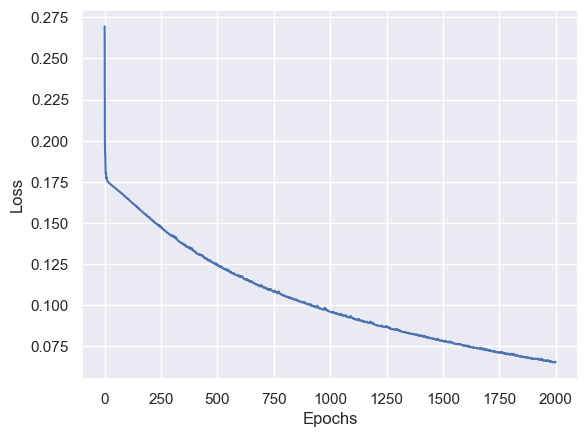

In [164]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

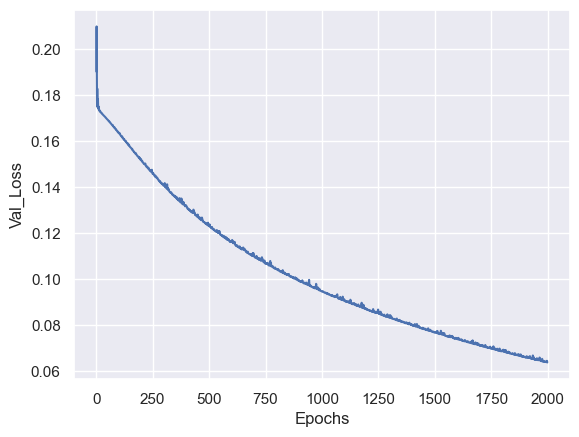

In [165]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [166]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Apogee\NIFE-Giants.h5


In [167]:
predNIFE = modelNIFE.predict(X_test)

 1/49 [..............................] - ETA: 3s

49/49 [==============================] - 0s 2ms/step


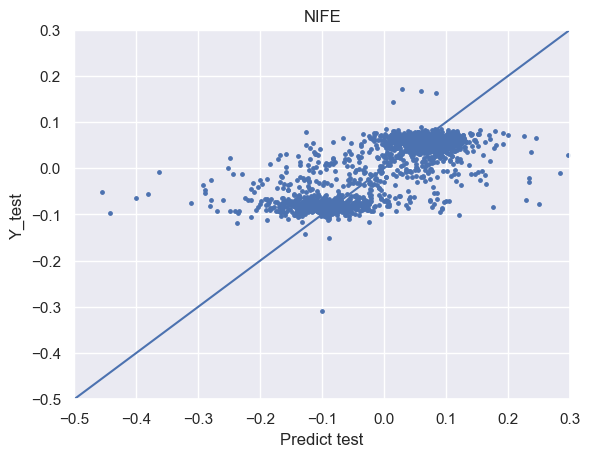

In [173]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.5, 0.3)
plt.ylim(-0.5, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [169]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 51.0%


In [170]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [171]:
Y_test

TEFF      LOGG      FE_H   ALPHA_M  \
ID                                                                      
iDR4_3_MC0094_0171878         4288.4650  0.816329 -0.874430 -0.050598   
iDR4_3_SPLUS-n05n53_0020097   4745.7180  2.855237 -0.035345  0.108599   
iDR4_3_SPLUS-s46s29_0017550   4973.4100  3.349861 -0.147130  0.042937   
iDR4_3_SPLUS-n09s39_0050569   4645.5024  2.786350  0.004276  0.109922   
iDR4_3_STRIPE82-0037_0009920  5039.8860  2.483387 -0.644730  0.262665   
...                                 ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550  4881.4550  3.045865 -0.250150  0.107608   
iDR4_3_SPLUS-n03s23_0031712   4836.8403  3.495177  0.099263  0.143395   
iDR4_3_SPLUS-n10s38_0052372   4940.1743  2.486235 -0.501270  0.247435   
iDR4_3_MC0071_0097241         4102.3350  0.765844 -1.130600  0.013343   
iDR4_3_SPLUS-n01s20_0029469   4989.2437  2.493237 -0.424550  0.246175   

                                  C_FE     CA_FE      N_FE     NI_FE  \
ID                                                                     
iDR4_3_MC0094_0171878        -0.373150  0.082272  0.225710 -0.106878   
iDR4_3_SPLUS-n05n53_0020097   0.116970  0.080165  0.071023  0.019432   
iDR4_3_SPLUS-s46s29_0017550   0.053945 -0.011186  0.016485  0.056142   
iDR4_3_SPLUS-n09s39_0050569   0.039711  0.065837  0.144636  0.064343   
iDR4_3_STRIPE82-0037_0009920  0.147950  0.152045  0.086803  0.095962   
...                                ...       ...       ...       ...   
iDR4_3_STRIPE82-0075_0005550 -0.015479  0.087145  0.039734  0.036633   
iDR4_3_SPLUS-n03s23_0031712   0.065450  0.069100  0.028691  0.117060   
iDR4_3_SPLUS-n10s38_0052372   0.100964  0.130405  0.102806  0.109592   
iDR4_3_MC0071_0097241        -0.533170  0.111935  0.174520 -0.100507   
iDR4_3_SPLUS-n01s20_0029469   0.195830  0.165685  0.112399  0.105543   

                                 MG_FE     SI_FE  alpha_predict  CFE_predict  \
ID                                                                             
iDR4_3_MC0094_0171878        -0.108357 -0.049973      -0.005373    -0.407699   
iDR4_3_SPLUS-n05n53_0020097   0.144740  0.062378       0.111583    -0.008889   
iDR4_3_SPLUS-s46s29_0017550   0.088306  0.016733       0.136314     0.021184   
iDR4_3_SPLUS-n09s39_0050569   0.163329  0.064845       0.132540     0.031210   
iDR4_3_STRIPE82-0037_0009920  0.328323  0.262481       0.223046     0.017846   
...                                ...       ...            ...          ...   
iDR4_3_STRIPE82-0075_0005550  0.156158  0.060104       0.193341     0.074667   
iDR4_3_SPLUS-n03s23_0031712   0.203312  0.083162       0.116405     0.034035   
iDR4_3_SPLUS-n10s38_0052372   0.300813  0.242221       0.233386     0.030863   
iDR4_3_MC0071_0097241        -0.014610 -0.022778       0.039200    -0.468395   
iDR4_3_SPLUS-n01s20_0029469   0.302853  0.220991       0.194410    -0.002142   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_MC0094_0171878             0.059288     0.402380     -0.037364   
iDR4_3_SPLUS-n05n53_0020097       0.086104     0.240073      0.196826   
iDR4_3_SPLUS-s46s29_0017550       0.125131     0.159111      0.233484   
iDR4_3_SPLUS-n09s39_0050569       0.091301     0.211089      0.223563   
iDR4_3_STRIPE82-0037_0009920      0.188725     0.118504      0.325714   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0075_0005550      0.139646     0.114408      0.296210   
iDR4_3_SPLUS-n03s23_0031712       0.098515     0.186733      0.225943   
iDR4_3_SPLUS-n10s38_0052372       0.183126     0.120030      0.348263   
iDR4_3_MC0071_0097241             0.070572     0.140138      0.041261   
iDR4_3_SPLUS-n01s20_0029469       0.162742     0.169806      0.292348   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_MC0094_0171878            -0.013

In [172]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")